<a href="https://colab.research.google.com/github/Ananya2003Gupta/Heart-Failure-Prediction/blob/main/IV_Top_6_%26_Top_5_Features%2C_Balanced_Data_using_ROS%2C_SMOTE%2C_ADASYN_(HeartFailurePrediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b><h1 align= "center">     MAJOR PROJECT: HEART FAILURE PREDICTION DATASET

<p align="center" > <img src="https://i.pinimg.com/236x/c8/75/0e/c8750ecdc3d2a16e3ac0b4b8f72738cc.jpg" width="400px" height="300px" > </p>

<b> <h1 align="center"> INDEX


---



---





1. [Introduction](#scrollTo=oZ5MYi6oSdlN&line=10&uniqifier=1)
2. [Data Analysis](#scrollTo=NNiESp8zLUm9&line=1&uniqifier=1)
3. [Information about Dataset](#scrollTo=mtmIYE-XdlAd&line=1&uniqifier=1)
4. [Machine Learning Models](#scrollTo=3gMfMUrbFHDG&line=1&uniqifier=1)
4. [Top 6 Features](#scrollTo=yzBzuuuFFwIs)
5. [Top 5 Features](#scrollTo=yR-HlXO9GvDp&line=1&uniqifier=1)
6. [References](#scrollTo=Qwv91_pNG2EE)




---
<br>
<br>
<br>


<b><h1 align="center"> INTRODUCTION 


---



---



<p align="justify">

*   Cardiovascular disease commonly called heart failure happens when the heart cannot pump enough blood and oxygen to support other organs in your body. Heart failure is a serious condition.
*   Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
*   Heart failure (HF) affects more than 64 million individuals worldwide. In developed countries, the prevalence of known heart failure is generally estimated at 1% to 2% of the general adult population. 
*   A recent meta-analysis including over 1.5 million all-type heart failure patients, estimated the 1, 2, 5 and 10-year survival to be 87%, 73%, 57% and 35%, respectively </p>




---



<p align="justify">


*   Machine learning (ML) proves to be effective in assisting in making decisions and predictions from the large quantity of data produced by the healthcare industry.
*   The dataset we are using for the above analysis contains 12 features that can be used to predict mortality by heart failure.


</p>





---

<br>
<br>
<br>

# <b><h1 align="center"> DATA ANALYSIS


---



---



In [ ]:
#Importing python libraries

#Data Preprocessing
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler as ss 

#Data Visualization 
import plotly.express as px 
from plotly.subplots import make_subplots 
from matplotlib import pyplot as plt 
import seaborn as sns 
import plotly.graph_objects as go

#Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

#Model Training and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix , precision_score, recall_score
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error,auc,roc_curve,roc_auc_score
from sklearn import model_selection


%matplotlib inline

In [ ]:
#Enabling GPU support for more computationally demanding tasks.

import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
#Uploading dataset from local computer

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv
User uploaded file "heart_failure_clinical_records_dataset.csv" with length 12239 bytes


In [ ]:
#Loading the dataset

df= pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [ ]:
#Rendering the dataset into an interactive table that can be filtered, sorted, and explored dynamically.

%load_ext google.colab.data_table

In [ ]:
#Printing the dataframe

df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [ ]:
#Display all the column/attribute names

df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
# It gives the order of the dataframe (rows/records, columns/attributes)

df.shape

(299, 13)

# <b><h1 align="center"> INFORMATION ABOUT DATASET


---



---



In [ ]:
#Summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
#Display the first ten rows of the dataframe

df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [ ]:
#Display the last ten rows of the dataframe

df.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,90.0,1,337,0,38,0,390000.0,0.9,144,0,0,256,0
290,45.0,0,615,1,55,0,222000.0,0.8,141,0,0,257,0
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [ ]:
#Display the datatypes of all the columns/attributes of dataframe

df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [ ]:
#Dispaly the sum of the null values in each column/attribute

df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

<b> In this dataset, there are no null values </b>

In [ ]:
#Check for duplicate rows/records and return its count

df.duplicated().sum()

0

<b> There is no duplicate record in the dataset.
All the records are unique. </b>

In [ ]:
#Display the statistical data for each column/attribute

df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000




---

<br>
<br>
<br>

# <b><h1 align="center"> MACHINE LEARNING MODELS </h1> </b>


---



---



<b> <h5> We are training the above models with Features selected after Feature Selection on the balanced data obtained after ROS(1), SMOTE(2), ADASYN(3).

<h3> <b> The classification models used in this problem are as follows: </b></h3>
<h4>
<ul>
<li> Logistic Regression </li>
<li> Random Forest Classifier </li>
<li> K-Nearest Neighbour (KNN) Classifier </li>
<li> Decision Tree Classifier </li>
<li> Naive Bayes Classifier </li>
<li> SVC (SVM Classifier) </li>
<li> LightGBM Classifier </li>
<li> XGBoost Classifier </li>
</h4>



---

<br>
<br>

# Top 6 features

In [ ]:
x=df[['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','time']]
y=df['DEATH_EVENT']

In [ ]:
#Training Testing Data Split

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
#ROS

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=0)

x_train1, y_train1 = ros.fit_resample(X_train, Y_train)
x_test1, y_test1 = ros.fit_resample(X_test, Y_test)

print('Original train dataset shape', Counter(Y_train))
print('Resample train dataset shape', Counter(y_train1))
print('Original test dataset shape', Counter(Y_test))
print('Resample test dataset shape', Counter(y_test1))

Original train dataset shape Counter({0: 166, 1: 73})
Resample train dataset shape Counter({0: 166, 1: 166})
Original test dataset shape Counter({0: 37, 1: 23})
Resample test dataset shape Counter({0: 37, 1: 37})


In [ ]:
#SMOTE

from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=0)

x_train2, y_train2 = smote.fit_resample(X_train, Y_train)
x_test2, y_test2 = smote.fit_resample(X_test, Y_test)

print('Original train dataset shape', Counter(Y_train))
print('Resample train dataset shape', Counter(y_train2))
print('Original test dataset shape', Counter(Y_test))
print('Resample test dataset shape', Counter(y_test2))

Original train dataset shape Counter({0: 166, 1: 73})
Resample train dataset shape Counter({0: 166, 1: 166})
Original test dataset shape Counter({0: 37, 1: 23})
Resample test dataset shape Counter({0: 37, 1: 37})


In [ ]:
#ADASYN

from imblearn.over_sampling import ADASYN 
from collections import Counter

ada = ADASYN(random_state=0)

x_train3, y_train3 = ada.fit_resample(X_train, Y_train)
x_test3, y_test3 = ada.fit_resample(X_test, Y_test)

print('Original train dataset shape', Counter(Y_train))
print('Resample train dataset shape', Counter(y_train3))
print('Original test dataset shape', Counter(Y_test))
print('Resample test dataset shape', Counter(y_test3))

Original train dataset shape Counter({0: 166, 1: 73})
Resample train dataset shape Counter({0: 166, 1: 159})
Original test dataset shape Counter({0: 37, 1: 23})
Resample test dataset shape Counter({1: 43, 0: 37})


In [ ]:
from sklearn.preprocessing import StandardScaler
scs = StandardScaler()
#ROS
x_train1 = scs.fit_transform(x_train1)
x_test1 = scs.transform(x_test1)

#SMOTE
x_train2 = scs.fit_transform(x_train2)
x_test2 = scs.transform(x_test2)

#ADASYN
x_train3 = scs.fit_transform(x_train3)
x_test3 = scs.transform(x_test3)

In [ ]:
#ROS
model_test1={}

#SMOTE
model_test2={}

#ADASYN
model_test3={}

# <h1 align="center"> Logistic Regression </h1>

---



---



In [ ]:
lr=LogisticRegression()
#ROS
lr.fit(x_train1,y_train1)

#SMOTE
lr.fit(x_train2,y_train2)

#ADASYN
lr.fit(x_train3,y_train3)

LogisticRegression()

In [ ]:
#ROS
y_pred_test1= lr.predict(x_test1)

#SMOTE
y_pred_test2= lr.predict(x_test2)

#ADASYN
y_pred_test3= lr.predict(x_test3)


In [ ]:
#ROS
y_pred_train1 = lr.predict(x_train1)

#SMOTE
y_pred_train2 = lr.predict(x_train2)

#ADASYN
y_pred_train3 = lr.predict(x_train3)


In [ ]:
#ROS
print("Testing accuracy of ROS Data:")
print(accuracy_score(y_test1, y_pred_test1)*100)
print()

#SMOTE
print("Testing accuracy of SMOTE Data:")
print(accuracy_score(y_test2, y_pred_test2)*100)
print()

#ADASYN
print("Testing accuracy of ADASYN Data:")
print(accuracy_score(y_test3, y_pred_test3)*100)
print()

Testing accuracy of ROS Data:
70.27027027027027

Testing accuracy of SMOTE Data:
79.72972972972973

Testing accuracy of ADASYN Data:
75.0



In [ ]:
#ROS
print("Training accuracy of ROS Data:")
print(accuracy_score(y_train1, y_pred_train1)*100)
print()

#SMOTE
print("Training accuracy of SMOTE Data:")
print(accuracy_score(y_train2, y_pred_train2)*100)
print()

#ADASYN
print("Training accuracy of ADASYN Data:")
print(accuracy_score(y_train3, y_pred_train3)*100)
print()

Training accuracy of ROS Data:
80.72289156626506

Training accuracy of SMOTE Data:
82.83132530120481

Training accuracy of ADASYN Data:
84.3076923076923



## <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
#ROS
y_pred1 = y_pred_test1
cm1 = confusion_matrix(y_test1, y_pred1)

#SMOTE
y_pred2 = y_pred_test2
cm2 = confusion_matrix(y_test2, y_pred2)

#ADASYN
y_pred3 = y_pred_test3
cm3 = confusion_matrix(y_test3, y_pred3)

### ROS

In [ ]:
print('Confusion matrix\n', cm1)

print('\nTrue Positives(TP) = ', cm1[0,0])

print('\nTrue Negatives(TN) = ', cm1[1,1])

print('\nFalse Positives(FP) = ', cm1[0,1])

print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix
 [[32  5]
 [17 20]]

True Positives(TP) =  32

True Negatives(TN) =  20

False Positives(FP) =  5

False Negatives(FN) =  17


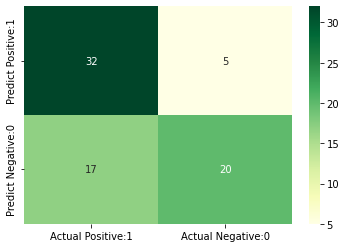

In [ ]:
cm1_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.65      0.86      0.74        37
           1       0.80      0.54      0.65        37

    accuracy                           0.70        74
   macro avg       0.73      0.70      0.69        74
weighted avg       0.73      0.70      0.69        74



In [ ]:
TP = cm1[0,0]
TN = cm1[1,1]
FP = cm1[0,1]
FN = cm1[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2973


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_test1['Logistic Regression']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.6451612903225806
Accuracy: 0.7027027027027027
Recall : 0.5405405405405406
Precision : 0.8
ROC_AUC : 0.7027027027027029


### SMOTE

In [ ]:
print('Confusion matrix\n', cm2)

print('\nTrue Positives(TP) = ', cm2[0,0])

print('\nTrue Negatives(TN) = ', cm2[1,1])

print('\nFalse Positives(FP) = ', cm2[0,1])

print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix
 [[32  5]
 [10 27]]

True Positives(TP) =  32

True Negatives(TN) =  27

False Positives(FP) =  5

False Negatives(FN) =  10


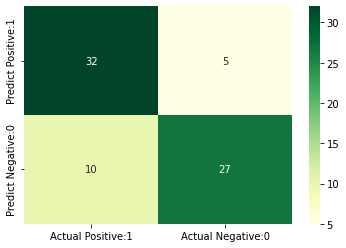

In [ ]:
cm2_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        37
           1       0.84      0.73      0.78        37

    accuracy                           0.80        74
   macro avg       0.80      0.80      0.80        74
weighted avg       0.80      0.80      0.80        74



In [ ]:
TP = cm2[0,0]
TN = cm2[1,1]
FP = cm2[0,1]
FN = cm2[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2027


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_test2['Logistic Regression']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7826086956521738
Accuracy: 0.7972972972972973
Recall : 0.7297297297297297
Precision : 0.84375
ROC_AUC : 0.7972972972972974


### ADASYN

In [ ]:
print('Confusion matrix\n', cm3)

print('\nTrue Positives(TP) = ', cm3[0,0])

print('\nTrue Negatives(TN) = ', cm3[1,1])

print('\nFalse Positives(FP) = ', cm3[0,1])

print('\nFalse Negatives(FN) = ', cm3[1,0])

Confusion matrix
 [[32  5]
 [15 28]]

True Positives(TP) =  32

True Negatives(TN) =  28

False Positives(FP) =  5

False Negatives(FN) =  15


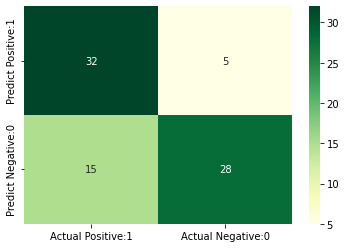

In [ ]:
cm3_matrix = pd.DataFrame(data=cm3, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm3_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.68      0.86      0.76        37
           1       0.85      0.65      0.74        43

    accuracy                           0.75        80
   macro avg       0.76      0.76      0.75        80
weighted avg       0.77      0.75      0.75        80



In [ ]:
TP = cm3[0,0]
TN = cm3[1,1]
FP = cm3[0,1]
FN = cm3[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2500


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_test3['Logistic Regression']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.736842105263158
Accuracy: 0.75
Recall : 0.6511627906976745
Precision : 0.8484848484848485
ROC_AUC : 0.7580138277812697


# <h1 align="center"> Random Forest </h1>

---



---



In [ ]:
clf = RandomForestClassifier()
#ROS
clf.fit(x_train1,y_train1)

#SMOTE
clf.fit(x_train2,y_train2)

#ADASYN
clf.fit(x_train3,y_train3)

RandomForestClassifier()

In [ ]:
#ROS
y_pred_test1= clf.predict(x_test1)

#SMOTE
y_pred_test2= clf.predict(x_test2)

#ADASYN
y_pred_test3= clf.predict(x_test3)

In [ ]:
#ROS
y_pred_train1 = clf.predict(x_train1)

#SMOTE
y_pred_train2 = clf.predict(x_train2)

#ADASYN
y_pred_train3 = clf.predict(x_train3)


In [ ]:
#ROS
print("Testing accuracy of ROS Data:")
print( accuracy_score(y_test1, y_pred_test1)*100)
print()

#SMOTE
print("Testing accuracy of SMOTE Data:")
print( accuracy_score(y_test2, y_pred_test2)*100)
print()

#ADASYN
print("Testing accuracy of ADASYN Data:")
print( accuracy_score(y_test3, y_pred_test3)*100)
print()

Testing accuracy of ROS Data:
79.72972972972973

Testing accuracy of SMOTE Data:
81.08108108108108

Testing accuracy of ADASYN Data:
78.75



In [ ]:
#ROS
print("Training accuracy of ROS Data:")
print( accuracy_score(y_train1, y_pred_train1)*100)
print()

#SMOTE
print("Training accuracy of SMOTE Data:")
print( accuracy_score(y_train2, y_pred_train2)*100)
print()

#ADASYN
print("Training accuracy of ADASYN Data:")
print( accuracy_score(y_train3, y_pred_train3)*100)
print()

Training accuracy of ROS Data:
96.6867469879518

Training accuracy of SMOTE Data:
96.6867469879518

Training accuracy of ADASYN Data:
100.0



## <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
#ROS
y_pred1 = y_pred_test1
cm1 = confusion_matrix(y_test1, y_pred1)

#SMOTE
y_pred2 = y_pred_test2
cm2 = confusion_matrix(y_test2, y_pred2)

#ADASYN
y_pred3 = y_pred_test3
cm3 = confusion_matrix(y_test3, y_pred3)

### ROS

In [ ]:
print('Confusion matrix\n', cm1)

print('\nTrue Positives(TP) = ', cm1[0,0])

print('\nTrue Negatives(TN) = ', cm1[1,1])

print('\nFalse Positives(FP) = ', cm1[0,1])

print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix
 [[32  5]
 [10 27]]

True Positives(TP) =  32

True Negatives(TN) =  27

False Positives(FP) =  5

False Negatives(FN) =  10


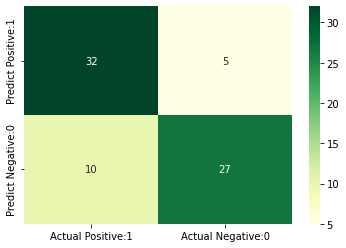

In [ ]:
cm1_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        37
           1       0.84      0.73      0.78        37

    accuracy                           0.80        74
   macro avg       0.80      0.80      0.80        74
weighted avg       0.80      0.80      0.80        74



In [ ]:
TP = cm1[0,0]
TN = cm1[1,1]
FP = cm1[0,1]
FN = cm1[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2027


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_test1['Random Forest']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7826086956521738
Accuracy: 0.7972972972972973
Recall : 0.7297297297297297
Precision : 0.84375
ROC_AUC : 0.7972972972972974


### SMOTE

In [ ]:
print('Confusion matrix\n', cm2)

print('\nTrue Positives(TP) = ', cm2[0,0])

print('\nTrue Negatives(TN) = ', cm2[1,1])

print('\nFalse Positives(FP) = ', cm2[0,1])

print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix
 [[32  5]
 [ 9 28]]

True Positives(TP) =  32

True Negatives(TN) =  28

False Positives(FP) =  5

False Negatives(FN) =  9


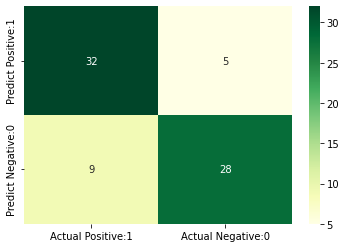

In [ ]:
cm2_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        37
           1       0.85      0.76      0.80        37

    accuracy                           0.81        74
   macro avg       0.81      0.81      0.81        74
weighted avg       0.81      0.81      0.81        74



In [ ]:
TP = cm2[0,0]
TN = cm2[1,1]
FP = cm2[0,1]
FN = cm2[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1892


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_test2['Random Forest']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.8000000000000002
Accuracy: 0.8108108108108109
Recall : 0.7567567567567568
Precision : 0.8484848484848485
ROC_AUC : 0.8108108108108109


### ADASYN

In [ ]:
print('Confusion matrix\n', cm3)

print('\nTrue Positives(TP) = ', cm3[0,0])

print('\nTrue Negatives(TN) = ', cm3[1,1])

print('\nFalse Positives(FP) = ', cm3[0,1])

print('\nFalse Negatives(FN) = ', cm3[1,0])

Confusion matrix
 [[32  5]
 [12 31]]

True Positives(TP) =  32

True Negatives(TN) =  31

False Positives(FP) =  5

False Negatives(FN) =  12


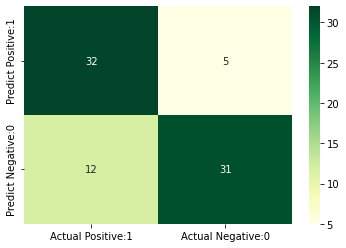

In [ ]:
cm3_matrix = pd.DataFrame(data=cm3, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm3_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        37
           1       0.86      0.72      0.78        43

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.80      0.79      0.79        80



In [ ]:
TP = cm3[0,0]
TN = cm3[1,1]
FP = cm3[0,1]
FN = cm3[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2125


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_test3['Random Forest']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7848101265822784
Accuracy: 0.7875
Recall : 0.7209302325581395
Precision : 0.8611111111111112
ROC_AUC : 0.7928975487115022


# <h1 align="center">K Nearest Neighbour (KNN) Classifier </h1>

---



---



In [ ]:
knn = KNeighborsClassifier()
#ROS
knn.fit(x_train1,y_train1)

#SMOTE
knn.fit(x_train2,y_train2)

#ADASYN
knn.fit(x_train3,y_train3)

KNeighborsClassifier()

In [ ]:
#ROS
y_pred_test1= knn.predict(x_test1)

#SMOTE
y_pred_test2= knn.predict(x_test2)

#ADASYN
y_pred_test3= knn.predict(x_test3)

In [ ]:
#ROS
y_pred_train1 = knn.predict(x_train1)

#SMOTE
y_pred_train2 = knn.predict(x_train2)

#ADASYN
y_pred_train3 = knn.predict(x_train3)

In [ ]:
#ROS
print("Testing accuracy of ROS Data:")
print( accuracy_score(y_test1, y_pred_test1)*100)
print()

#SMOTE
print("Testing accuracy of SMOTE Data:")
print( accuracy_score(y_test2, y_pred_test2)*100)
print()

#ADASYN
print("Testing accuracy of ADASYN Data:")
print( accuracy_score(y_test3, y_pred_test3)*100)
print()

Testing accuracy of ROS Data:
79.72972972972973

Testing accuracy of SMOTE Data:
83.78378378378379

Testing accuracy of ADASYN Data:
78.75



In [ ]:
#ROS
print("Training accuracy of ROS Data:")
print( accuracy_score(y_train1, y_pred_train1)*100)
print()

#SMOTE
print("Training accuracy of SMOTE Data:")
print( accuracy_score(y_train2, y_pred_train2)*100)
print()

#ADASYN
print("Training accuracy of ADASYN Data:")
print( accuracy_score(y_train3, y_pred_train3)*100)
print()

Training accuracy of ROS Data:
84.93975903614458

Training accuracy of SMOTE Data:
86.74698795180723

Training accuracy of ADASYN Data:
87.38461538461539



## <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
#ROS
y_pred1 = y_pred_test1
cm1 = confusion_matrix(y_test1, y_pred1)

#SMOTE
y_pred2 = y_pred_test2
cm2 = confusion_matrix(y_test2, y_pred2)

#ADASYN
y_pred3 = y_pred_test3
cm3 = confusion_matrix(y_test3, y_pred3)

### ROS

In [ ]:
print('Confusion matrix\n', cm1)

print('\nTrue Positives(TP) = ', cm1[0,0])

print('\nTrue Negatives(TN) = ', cm1[1,1])

print('\nFalse Positives(FP) = ', cm1[0,1])

print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix
 [[31  6]
 [ 9 28]]

True Positives(TP) =  31

True Negatives(TN) =  28

False Positives(FP) =  6

False Negatives(FN) =  9


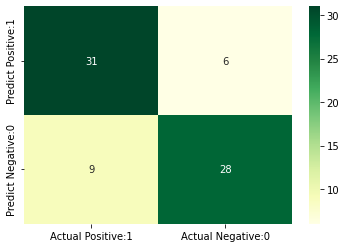

In [ ]:
cm1_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        37
           1       0.82      0.76      0.79        37

    accuracy                           0.80        74
   macro avg       0.80      0.80      0.80        74
weighted avg       0.80      0.80      0.80        74



In [ ]:
TP = cm1[0,0]
TN = cm1[1,1]
FP = cm1[0,1]
FN = cm1[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2027


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_test1['KNN']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7887323943661971
Accuracy: 0.7972972972972973
Recall : 0.7567567567567568
Precision : 0.8235294117647058
ROC_AUC : 0.7972972972972973


### SMOTE

In [ ]:
print('Confusion matrix\n', cm2)

print('\nTrue Positives(TP) = ', cm2[0,0])

print('\nTrue Negatives(TN) = ', cm2[1,1])

print('\nFalse Positives(FP) = ', cm2[0,1])

print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix
 [[30  7]
 [ 5 32]]

True Positives(TP) =  30

True Negatives(TN) =  32

False Positives(FP) =  7

False Negatives(FN) =  5


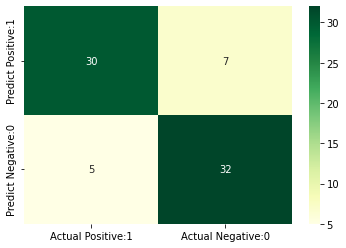

In [ ]:
cm2_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        37
           1       0.82      0.86      0.84        37

    accuracy                           0.84        74
   macro avg       0.84      0.84      0.84        74
weighted avg       0.84      0.84      0.84        74



In [ ]:
TP = cm2[0,0]
TN = cm2[1,1]
FP = cm2[0,1]
FN = cm2[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1622


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_test2['KNN']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.8421052631578947
Accuracy: 0.8378378378378378
Recall : 0.8648648648648649
Precision : 0.8205128205128205
ROC_AUC : 0.8378378378378378


### ADASYN

In [ ]:
print('Confusion matrix\n', cm3)

print('\nTrue Positives(TP) = ', cm3[0,0])

print('\nTrue Negatives(TN) = ', cm3[1,1])

print('\nFalse Positives(FP) = ', cm3[0,1])

print('\nFalse Negatives(FN) = ', cm3[1,0])

Confusion matrix
 [[30  7]
 [10 33]]

True Positives(TP) =  30

True Negatives(TN) =  33

False Positives(FP) =  7

False Negatives(FN) =  10


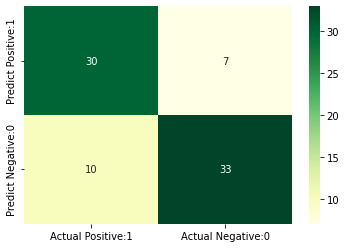

In [ ]:
cm3_matrix = pd.DataFrame(data=cm3, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm3_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78        37
           1       0.82      0.77      0.80        43

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



In [ ]:
TP = cm3[0,0]
TN = cm3[1,1]
FP = cm3[0,1]
FN = cm3[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2125


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_test3['KNN']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7951807228915662
Accuracy: 0.7875
Recall : 0.7674418604651163
Precision : 0.825
ROC_AUC : 0.7891263356379635


# <h1 align="center"> Decision Tree </h1>

---



---



In [ ]:
tree = DecisionTreeClassifier()
#ROS
tree.fit(x_train1,y_train1)

#SMOTE
tree.fit(x_train2,y_train2)

#ADASYN
tree.fit(x_train3,y_train3)

DecisionTreeClassifier()

In [ ]:
#ROS
y_pred_test1= tree.predict(x_test1)

#SMOTE
y_pred_test2= tree.predict(x_test2)

#ADASYN
y_pred_test3= tree.predict(x_test3)

In [ ]:
#ROS
y_pred_train1 = tree.predict(x_train1)

#SMOTE
y_pred_train2 = tree.predict(x_train2)

#ADASYN
y_pred_train3 = tree.predict(x_train3)

In [ ]:
#ROS
print("Testing accuracy of ROS Data:")
print( accuracy_score(y_test1, y_pred_test1)*100)
print()

#SMOTE
print("Testing accuracy of SMOTE Data:")
print( accuracy_score(y_test2, y_pred_test2)*100)
print()

#ADASYN
print("Testing accuracy of ADASYN Data:")
print( accuracy_score(y_test3, y_pred_test3)*100)
print()

Testing accuracy of ROS Data:
71.62162162162163

Testing accuracy of SMOTE Data:
79.72972972972973

Testing accuracy of ADASYN Data:
76.25



In [ ]:
#ROS
print("Training accuracy of ROS Data:")
print( accuracy_score(y_train1, y_pred_train1)*100)
print()

#SMOTE
print("Training accuracy of SMOTE Data:")
print( accuracy_score(y_train2, y_pred_train2)*100)
print()

#ADASYN
print("Training accuracy of ADASYN Data:")
print( accuracy_score(y_train3, y_pred_train3)*100)
print()

Training accuracy of ROS Data:
92.46987951807229

Training accuracy of SMOTE Data:
94.27710843373494

Training accuracy of ADASYN Data:
100.0



## <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
#ROS
y_pred1 = y_pred_test1
cm1 = confusion_matrix(y_test1, y_pred1)

#SMOTE
y_pred2 = y_pred_test2
cm2 = confusion_matrix(y_test2, y_pred2)

#ADASYN
y_pred3 = y_pred_test3
cm3 = confusion_matrix(y_test3, y_pred3)

### ROS

In [ ]:
print('Confusion matrix\n', cm1)

print('\nTrue Positives(TP) = ', cm1[0,0])

print('\nTrue Negatives(TN) = ', cm1[1,1])

print('\nFalse Positives(FP) = ', cm1[0,1])

print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix
 [[30  7]
 [14 23]]

True Positives(TP) =  30

True Negatives(TN) =  23

False Positives(FP) =  7

False Negatives(FN) =  14


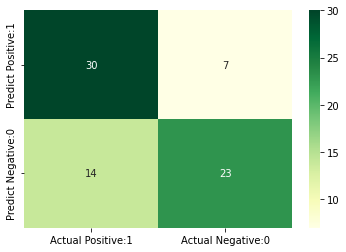

In [ ]:
cm1_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74        37
           1       0.77      0.62      0.69        37

    accuracy                           0.72        74
   macro avg       0.72      0.72      0.71        74
weighted avg       0.72      0.72      0.71        74



In [ ]:
TP = cm1[0,0]
TN = cm1[1,1]
FP = cm1[0,1]
FN = cm1[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2838


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_test1['Decision Tree']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.6865671641791045
Accuracy: 0.7162162162162162
Recall : 0.6216216216216216
Precision : 0.7666666666666667
ROC_AUC : 0.716216216216216


### SMOTE

In [ ]:
print('Confusion matrix\n', cm2)

print('\nTrue Positives(TP) = ', cm2[0,0])

print('\nTrue Negatives(TN) = ', cm2[1,1])

print('\nFalse Positives(FP) = ', cm2[0,1])

print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix
 [[31  6]
 [ 9 28]]

True Positives(TP) =  31

True Negatives(TN) =  28

False Positives(FP) =  6

False Negatives(FN) =  9


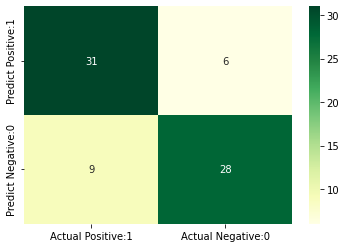

In [ ]:
cm2_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        37
           1       0.82      0.76      0.79        37

    accuracy                           0.80        74
   macro avg       0.80      0.80      0.80        74
weighted avg       0.80      0.80      0.80        74



In [ ]:
TP = cm2[0,0]
TN = cm2[1,1]
FP = cm2[0,1]
FN = cm2[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2027


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_test2['Decision Tree']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7887323943661971
Accuracy: 0.7972972972972973
Recall : 0.7567567567567568
Precision : 0.8235294117647058
ROC_AUC : 0.7972972972972973


### ADASYN

In [ ]:
print('Confusion matrix\n', cm3)

print('\nTrue Positives(TP) = ', cm3[0,0])

print('\nTrue Negatives(TN) = ', cm3[1,1])

print('\nFalse Positives(FP) = ', cm3[0,1])

print('\nFalse Negatives(FN) = ', cm3[1,0])

Confusion matrix
 [[31  6]
 [13 30]]

True Positives(TP) =  31

True Negatives(TN) =  30

False Positives(FP) =  6

False Negatives(FN) =  13


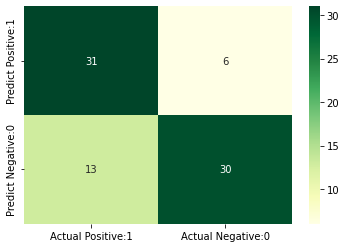

In [ ]:
cm3_matrix = pd.DataFrame(data=cm3, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm3_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.70      0.84      0.77        37
           1       0.83      0.70      0.76        43

    accuracy                           0.76        80
   macro avg       0.77      0.77      0.76        80
weighted avg       0.77      0.76      0.76        80



In [ ]:
TP = cm3[0,0]
TN = cm3[1,1]
FP = cm3[0,1]
FN = cm3[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2375


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_test3['Decision Tree']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.759493670886076
Accuracy: 0.7625
Recall : 0.6976744186046512
Precision : 0.8333333333333334
ROC_AUC : 0.7677561282212445


# <h1 align="center"> Naive Bayes Classifier </h1>

---



---



In [ ]:
gnb = GaussianNB()
#ROS
gnb.fit(x_train1,y_train1)

#SMOTE
gnb.fit(x_train2,y_train2)

#ADASYN
gnb.fit(x_train3,y_train3)

GaussianNB()

In [ ]:
#ROS
y_pred_test1= gnb.predict(x_test1)

#SMOTE
y_pred_test2= gnb.predict(x_test2)

#ADASYN
y_pred_test3= gnb.predict(x_test3)

In [ ]:
#ROS
y_pred_train1 = gnb.predict(x_train1)

#SMOTE
y_pred_train2 = gnb.predict(x_train2)

#ADASYN
y_pred_train3 = gnb.predict(x_train3)

In [ ]:
#ROS
print("Testing accuracy of ROS Data:")
print( accuracy_score(y_test1, y_pred_test1)*100)
print()

#SMOTE
print("Testing accuracy of SMOTE Data:")
print( accuracy_score(y_test2, y_pred_test2)*100)
print()

#ADASYN
print("Testing accuracy of ADASYN Data:")
print( accuracy_score(y_test3, y_pred_test3)*100)
print()

Testing accuracy of ROS Data:
72.97297297297297

Testing accuracy of SMOTE Data:
75.67567567567568

Testing accuracy of ADASYN Data:
68.75



In [ ]:
#ROS
print("Training accuracy of ROS Data:")
print( accuracy_score(y_train1, y_pred_train1)*100)
print()

#SMOTE
print("Training accuracy of SMOTE Data:")
print( accuracy_score(y_train2, y_pred_train2)*100)
print()

#ADASYN
print("Training accuracy of ADASYN Data:")
print( accuracy_score(y_train3, y_pred_train3)*100)
print()

Training accuracy of ROS Data:
79.21686746987952

Training accuracy of SMOTE Data:
82.2289156626506

Training accuracy of ADASYN Data:
83.07692307692308



## <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
#ROS
y_pred1 = y_pred_test1
cm1 = confusion_matrix(y_test1, y_pred1)

#SMOTE
y_pred2 = y_pred_test2
cm2 = confusion_matrix(y_test2, y_pred2)

#ADASYN
y_pred3 = y_pred_test3
cm3 = confusion_matrix(y_test3, y_pred3)

### ROS

In [ ]:
print('Confusion matrix\n', cm1)

print('\nTrue Positives(TP) = ', cm1[0,0])

print('\nTrue Negatives(TN) = ', cm1[1,1])

print('\nFalse Positives(FP) = ', cm1[0,1])

print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix
 [[33  4]
 [16 21]]

True Positives(TP) =  33

True Negatives(TN) =  21

False Positives(FP) =  4

False Negatives(FN) =  16


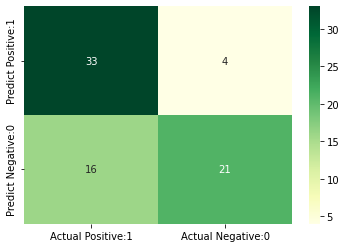

In [ ]:
cm1_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.67      0.89      0.77        37
           1       0.84      0.57      0.68        37

    accuracy                           0.73        74
   macro avg       0.76      0.73      0.72        74
weighted avg       0.76      0.73      0.72        74



In [ ]:
TP = cm1[0,0]
TN = cm1[1,1]
FP = cm1[0,1]
FN = cm1[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2703


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_test1['Naive Bayes']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.6774193548387097
Accuracy: 0.7297297297297297
Recall : 0.5675675675675675
Precision : 0.84
ROC_AUC : 0.7297297297297297


### SMOTE

In [ ]:
print('Confusion matrix\n', cm2)

print('\nTrue Positives(TP) = ', cm2[0,0])

print('\nTrue Negatives(TN) = ', cm2[1,1])

print('\nFalse Positives(FP) = ', cm2[0,1])

print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix
 [[33  4]
 [14 23]]

True Positives(TP) =  33

True Negatives(TN) =  23

False Positives(FP) =  4

False Negatives(FN) =  14


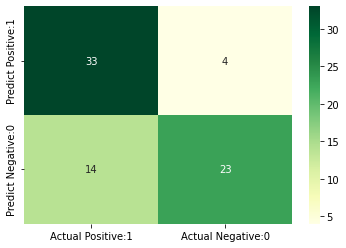

In [ ]:
cm2_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.70      0.89      0.79        37
           1       0.85      0.62      0.72        37

    accuracy                           0.76        74
   macro avg       0.78      0.76      0.75        74
weighted avg       0.78      0.76      0.75        74



In [ ]:
TP = cm2[0,0]
TN = cm2[1,1]
FP = cm2[0,1]
FN = cm2[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2432


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_test2['Naive Bayes']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7187499999999999
Accuracy: 0.7567567567567568
Recall : 0.6216216216216216
Precision : 0.8518518518518519
ROC_AUC : 0.7567567567567567


### ADASYN

In [ ]:
print('Confusion matrix\n', cm3)

print('\nTrue Positives(TP) = ', cm3[0,0])

print('\nTrue Negatives(TN) = ', cm3[1,1])

print('\nFalse Positives(FP) = ', cm3[0,1])

print('\nFalse Negatives(FN) = ', cm3[1,0])

Confusion matrix
 [[33  4]
 [21 22]]

True Positives(TP) =  33

True Negatives(TN) =  22

False Positives(FP) =  4

False Negatives(FN) =  21


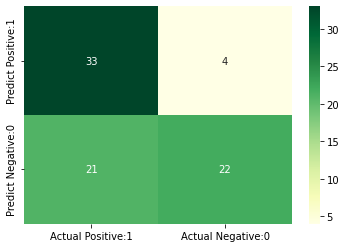

In [ ]:
cm3_matrix = pd.DataFrame(data=cm3, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm3_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.61      0.89      0.73        37
           1       0.85      0.51      0.64        43

    accuracy                           0.69        80
   macro avg       0.73      0.70      0.68        80
weighted avg       0.74      0.69      0.68        80



In [ ]:
TP = cm3[0,0]
TN = cm3[1,1]
FP = cm3[0,1]
FN = cm3[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.3125


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_test3['Naive Bayes']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.6376811594202898
Accuracy: 0.6875
Recall : 0.5116279069767442
Precision : 0.8461538461538461
ROC_AUC : 0.701759899434318


# <h1 align="center"> SVM </h1>

---



---

In [ ]:
svm = SVC()
#ROS
svm.fit(x_train1,y_train1)

#SMOTE
svm.fit(x_train2,y_train2)

#ADASYN
svm.fit(x_train3,y_train3)

SVC()

In [ ]:
#ROS
y_pred_test1= svm.predict(x_test1)

#SMOTE
y_pred_test2= svm.predict(x_test2)

#ADASYN
y_pred_test3= svm.predict(x_test3)

In [ ]:
#ROS
y_pred_train1 = svm.predict(x_train1)

#SMOTE
y_pred_train2 = svm.predict(x_train2)

#ADASYN
y_pred_train3 = svm.predict(x_train3)

In [ ]:
#ROS
print("Testing accuracy of ROS Data:")
print( accuracy_score(y_test1, y_pred_test1)*100)
print()

#SMOTE
print("Testing accuracy of SMOTE Data:")
print( accuracy_score(y_test2, y_pred_test2)*100)
print()

#ADASYN
print("Testing accuracy of ADASYN Data:")
print( accuracy_score(y_test3, y_pred_test3)*100)
print()

Testing accuracy of ROS Data:
79.72972972972973

Testing accuracy of SMOTE Data:
81.08108108108108

Testing accuracy of ADASYN Data:
78.75



In [ ]:
#ROS
print("Training accuracy of ROS Data:")
print( accuracy_score(y_train1, y_pred_train1)*100)
print()

#SMOTE
print("Training accuracy of SMOTE Data:")
print( accuracy_score(y_train2, y_pred_train2)*100)
print()

#ADASYN
print("Training accuracy of ADASYN Data:")
print( accuracy_score(y_train3, y_pred_train3)*100)
print()

Training accuracy of ROS Data:
86.14457831325302

Training accuracy of SMOTE Data:
86.44578313253012

Training accuracy of ADASYN Data:
88.92307692307693



## <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
#ROS
y_pred1 = y_pred_test1
cm1 = confusion_matrix(y_test1, y_pred1)

#SMOTE
y_pred2 = y_pred_test2
cm2 = confusion_matrix(y_test2, y_pred2)

#ADASYN
y_pred3 = y_pred_test3
cm3 = confusion_matrix(y_test3, y_pred3)

### ROS

In [ ]:
print('Confusion matrix\n', cm1)

print('\nTrue Positives(TP) = ', cm1[0,0])

print('\nTrue Negatives(TN) = ', cm1[1,1])

print('\nFalse Positives(FP) = ', cm1[0,1])

print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix
 [[33  4]
 [11 26]]

True Positives(TP) =  33

True Negatives(TN) =  26

False Positives(FP) =  4

False Negatives(FN) =  11


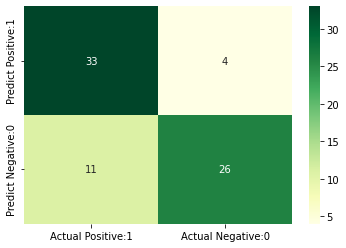

In [ ]:
cm1_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81        37
           1       0.87      0.70      0.78        37

    accuracy                           0.80        74
   macro avg       0.81      0.80      0.80        74
weighted avg       0.81      0.80      0.80        74



In [ ]:
TP = cm1[0,0]
TN = cm1[1,1]
FP = cm1[0,1]
FN = cm1[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2027


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_test1['SVM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7761194029850748
Accuracy: 0.7972972972972973
Recall : 0.7027027027027027
Precision : 0.8666666666666667
ROC_AUC : 0.7972972972972973


### SMOTE

In [ ]:
print('Confusion matrix\n', cm2)

print('\nTrue Positives(TP) = ', cm2[0,0])

print('\nTrue Negatives(TN) = ', cm2[1,1])

print('\nFalse Positives(FP) = ', cm2[0,1])

print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix
 [[33  4]
 [10 27]]

True Positives(TP) =  33

True Negatives(TN) =  27

False Positives(FP) =  4

False Negatives(FN) =  10


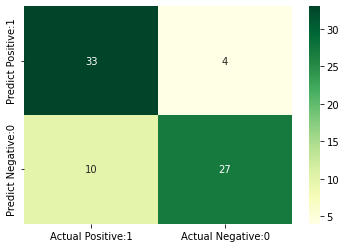

In [ ]:
cm2_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.77      0.89      0.82        37
           1       0.87      0.73      0.79        37

    accuracy                           0.81        74
   macro avg       0.82      0.81      0.81        74
weighted avg       0.82      0.81      0.81        74



In [ ]:
TP = cm2[0,0]
TN = cm2[1,1]
FP = cm2[0,1]
FN = cm2[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1892


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_test2['SVM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7941176470588235
Accuracy: 0.8108108108108109
Recall : 0.7297297297297297
Precision : 0.8709677419354839
ROC_AUC : 0.8108108108108109


### ADASYN

In [ ]:
print('Confusion matrix\n', cm3)

print('\nTrue Positives(TP) = ', cm3[0,0])

print('\nTrue Negatives(TN) = ', cm3[1,1])

print('\nFalse Positives(FP) = ', cm3[0,1])

print('\nFalse Negatives(FN) = ', cm3[1,0])

Confusion matrix
 [[33  4]
 [13 30]]

True Positives(TP) =  33

True Negatives(TN) =  30

False Positives(FP) =  4

False Negatives(FN) =  13


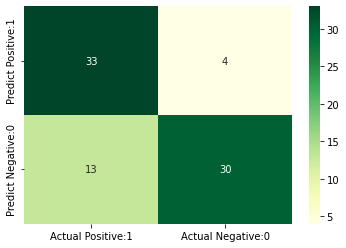

In [ ]:
cm3_matrix = pd.DataFrame(data=cm3, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm3_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80        37
           1       0.88      0.70      0.78        43

    accuracy                           0.79        80
   macro avg       0.80      0.79      0.79        80
weighted avg       0.81      0.79      0.79        80



In [ ]:
TP = cm3[0,0]
TN = cm3[1,1]
FP = cm3[0,1]
FN = cm3[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2125


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_test3['SVM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7792207792207793
Accuracy: 0.7875
Recall : 0.6976744186046512
Precision : 0.8823529411764706
ROC_AUC : 0.7947831552482715


# <h1 align="center">LightGBM </h1>

---



---

In [ ]:
lgbm = LGBMClassifier()
#ROS
lgbm.fit(x_train1,y_train1)

#SMOTE
lgbm.fit(x_train2,y_train2)

#ADASYN
lgbm.fit(x_train3,y_train3)

LGBMClassifier()

In [ ]:
#ROS
y_pred_test1= lgbm.predict(x_test1)

#SMOTE
y_pred_test2= lgbm.predict(x_test2)

#ADASYN
y_pred_test3= lgbm.predict(x_test3)

In [ ]:
#ROS
y_pred_train1 = lgbm.predict(x_train1)

#SMOTE
y_pred_train2 = lgbm.predict(x_train2)

#ADASYN
y_pred_train3 = lgbm.predict(x_train3)

In [ ]:
#ROS
print("Testing accuracy of ROS Data:")
print( accuracy_score(y_test1, y_pred_test1)*100)
print()

#SMOTE
print("Testing accuracy of SMOTE Data:")
print( accuracy_score(y_test2, y_pred_test2)*100)
print()

#ADASYN
print("Testing accuracy of ADASYN Data:")
print( accuracy_score(y_test3, y_pred_test3)*100)
print()

Testing accuracy of ROS Data:
77.02702702702703

Testing accuracy of SMOTE Data:
83.78378378378379

Testing accuracy of ADASYN Data:
78.75



In [ ]:
#ROS
print("Training accuracy of ROS Data:")
print( accuracy_score(y_train1, y_pred_train1)*100)
print()

#SMOTE
print("Training accuracy of SMOTE Data:")
print( accuracy_score(y_train2, y_pred_train2)*100)
print()

#ADASYN
print("Training accuracy of ADASYN Data:")
print( accuracy_score(y_train3, y_pred_train3)*100)
print()

Training accuracy of ROS Data:
95.18072289156626

Training accuracy of SMOTE Data:
97.89156626506023

Training accuracy of ADASYN Data:
100.0



## <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
#ROS
y_pred1 = y_pred_test1
cm1 = confusion_matrix(y_test1, y_pred1)

#SMOTE
y_pred2 = y_pred_test2
cm2 = confusion_matrix(y_test2, y_pred2)

#ADASYN
y_pred3 = y_pred_test3
cm3 = confusion_matrix(y_test3, y_pred3)

### ROS

In [ ]:
print('Confusion matrix\n', cm1)

print('\nTrue Positives(TP) = ', cm1[0,0])

print('\nTrue Negatives(TN) = ', cm1[1,1])

print('\nFalse Positives(FP) = ', cm1[0,1])

print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix
 [[31  6]
 [11 26]]

True Positives(TP) =  31

True Negatives(TN) =  26

False Positives(FP) =  6

False Negatives(FN) =  11


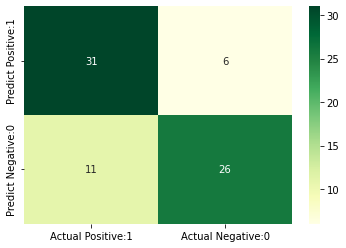

In [ ]:
cm1_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.74      0.84      0.78        37
           1       0.81      0.70      0.75        37

    accuracy                           0.77        74
   macro avg       0.78      0.77      0.77        74
weighted avg       0.78      0.77      0.77        74



In [ ]:
TP = cm1[0,0]
TN = cm1[1,1]
FP = cm1[0,1]
FN = cm1[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2297


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_test1['LightGBM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7536231884057971
Accuracy: 0.7702702702702703
Recall : 0.7027027027027027
Precision : 0.8125
ROC_AUC : 0.7702702702702703


### SMOTE

In [ ]:
print('Confusion matrix\n', cm2)

print('\nTrue Positives(TP) = ', cm2[0,0])

print('\nTrue Negatives(TN) = ', cm2[1,1])

print('\nFalse Positives(FP) = ', cm2[0,1])

print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix
 [[31  6]
 [ 6 31]]

True Positives(TP) =  31

True Negatives(TN) =  31

False Positives(FP) =  6

False Negatives(FN) =  6


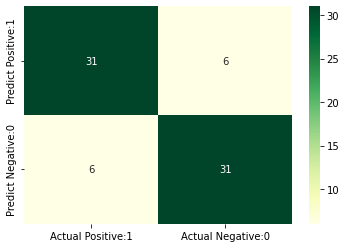

In [ ]:
cm2_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        37
           1       0.84      0.84      0.84        37

    accuracy                           0.84        74
   macro avg       0.84      0.84      0.84        74
weighted avg       0.84      0.84      0.84        74



In [ ]:
TP = cm2[0,0]
TN = cm2[1,1]
FP = cm2[0,1]
FN = cm2[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1622


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_test2['LightGBM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.8378378378378378
Accuracy: 0.8378378378378378
Recall : 0.8378378378378378
Precision : 0.8378378378378378
ROC_AUC : 0.8378378378378377


### ADASYN

In [ ]:
print('Confusion matrix\n', cm3)

print('\nTrue Positives(TP) = ', cm3[0,0])

print('\nTrue Negatives(TN) = ', cm3[1,1])

print('\nFalse Positives(FP) = ', cm3[0,1])

print('\nFalse Negatives(FN) = ', cm3[1,0])

Confusion matrix
 [[31  6]
 [11 32]]

True Positives(TP) =  31

True Negatives(TN) =  32

False Positives(FP) =  6

False Negatives(FN) =  11


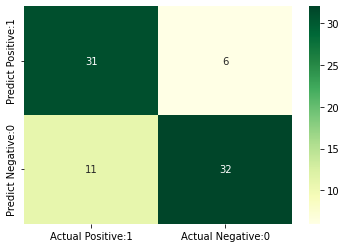

In [ ]:
cm3_matrix = pd.DataFrame(data=cm3, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm3_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.74      0.84      0.78        37
           1       0.84      0.74      0.79        43

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



In [ ]:
TP = cm3[0,0]
TN = cm3[1,1]
FP = cm3[0,1]
FN = cm3[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2125


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_test3['LightGBM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7901234567901234
Accuracy: 0.7875
Recall : 0.7441860465116279
Precision : 0.8421052631578947
ROC_AUC : 0.7910119421747329


# <h1 align="center"> XGBoost <h1>

---



---

In [ ]:
xg = XGBClassifier()
#ROS
xg.fit(x_train1,y_train1)

#SMOTE
xg.fit(x_train2,y_train2)

#ADASYN
xg.fit(x_train3,y_train3)

XGBClassifier()

In [ ]:
#ROS
y_pred_test1= xg.predict(x_test1)

#SMOTE
y_pred_test2= xg.predict(x_test2)

#ADASYN
y_pred_test3= xg.predict(x_test3)


In [ ]:
#ROS
y_pred_train1 = xg.predict(x_train1)

#SMOTE
y_pred_train2 = xg.predict(x_train2)

#ADASYN
y_pred_train3 = xg.predict(x_train3)


In [ ]:
#ROS
print("Testing accuracy of ROS Data:")
print( accuracy_score(y_test1, y_pred_test1)*100)
print()

#SMOTE
print("Testing accuracy of SMOTE Data:")
print( accuracy_score(y_test2, y_pred_test2)*100)
print()

#ADASYN
print("Testing accuracy of ADASYN Data:")
print( accuracy_score(y_test3, y_pred_test3)*100)
print()

Testing accuracy of ROS Data:
82.43243243243244

Testing accuracy of SMOTE Data:
85.13513513513513

Testing accuracy of ADASYN Data:
78.75



In [ ]:
#ROS
print("Training accuracy of ROS Data:")
print( accuracy_score(y_train1, y_pred_train1)*100)
print()

#SMOTE
print("Training accuracy of SMOTE Data:")
print( accuracy_score(y_train2, y_pred_train2)*100)
print()

#ADASYN
print("Training accuracy of ADASYN Data:")
print( accuracy_score(y_train3, y_pred_train3)*100)
print()

Training accuracy of ROS Data:
90.96385542168674

Training accuracy of SMOTE Data:
94.57831325301204

Training accuracy of ADASYN Data:
97.53846153846155



## <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
#ROS
y_pred1 = y_pred_test1
cm1 = confusion_matrix(y_test1, y_pred1)

#SMOTE
y_pred2 = y_pred_test2
cm2 = confusion_matrix(y_test2, y_pred2)

#ADASYN
y_pred3 = y_pred_test3
cm3 = confusion_matrix(y_test3, y_pred3)

### ROS

In [ ]:
print('Confusion matrix\n', cm1)

print('\nTrue Positives(TP) = ', cm1[0,0])

print('\nTrue Negatives(TN) = ', cm1[1,1])

print('\nFalse Positives(FP) = ', cm1[0,1])

print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix
 [[31  6]
 [ 7 30]]

True Positives(TP) =  31

True Negatives(TN) =  30

False Positives(FP) =  6

False Negatives(FN) =  7


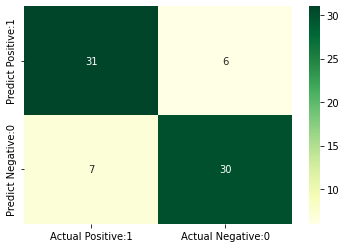

In [ ]:
cm1_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        37
           1       0.83      0.81      0.82        37

    accuracy                           0.82        74
   macro avg       0.82      0.82      0.82        74
weighted avg       0.82      0.82      0.82        74



In [ ]:
TP = cm1[0,0]
TN = cm1[1,1]
FP = cm1[0,1]
FN = cm1[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1757


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_test1['XGBoost']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.8219178082191781
Accuracy: 0.8243243243243243
Recall : 0.8108108108108109
Precision : 0.8333333333333334
ROC_AUC : 0.8243243243243245


### SMOTE

In [ ]:
print('Confusion matrix\n', cm2)

print('\nTrue Positives(TP) = ', cm2[0,0])

print('\nTrue Negatives(TN) = ', cm2[1,1])

print('\nFalse Positives(FP) = ', cm2[0,1])

print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix
 [[31  6]
 [ 5 32]]

True Positives(TP) =  31

True Negatives(TN) =  32

False Positives(FP) =  6

False Negatives(FN) =  5


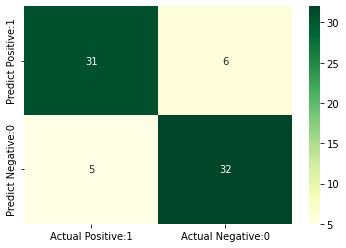

In [ ]:
cm2_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        37
           1       0.84      0.86      0.85        37

    accuracy                           0.85        74
   macro avg       0.85      0.85      0.85        74
weighted avg       0.85      0.85      0.85        74



In [ ]:
TP = cm2[0,0]
TN = cm2[1,1]
FP = cm2[0,1]
FN = cm2[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1486


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_test2['XGBoost']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.8533333333333334
Accuracy: 0.8513513513513513
Recall : 0.8648648648648649
Precision : 0.8421052631578947
ROC_AUC : 0.8513513513513513


### ADASYN

In [ ]:
print('Confusion matrix\n', cm3)

print('\nTrue Positives(TP) = ', cm3[0,0])

print('\nTrue Negatives(TN) = ', cm3[1,1])

print('\nFalse Positives(FP) = ', cm3[0,1])

print('\nFalse Negatives(FN) = ', cm3[1,0])

Confusion matrix
 [[31  6]
 [11 32]]

True Positives(TP) =  31

True Negatives(TN) =  32

False Positives(FP) =  6

False Negatives(FN) =  11


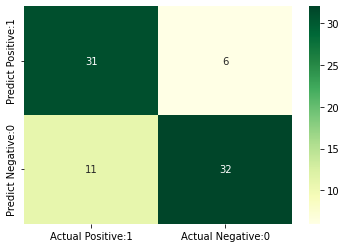

In [ ]:
cm3_matrix = pd.DataFrame(data=cm3, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm3_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.74      0.84      0.78        37
           1       0.84      0.74      0.79        43

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



In [ ]:
TP = cm3[0,0]
TN = cm3[1,1]
FP = cm3[0,1]
FN = cm3[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2125


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_test3['XGBoost']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7901234567901234
Accuracy: 0.7875
Recall : 0.7441860465116279
Precision : 0.8421052631578947
ROC_AUC : 0.7910119421747329


# <b> <h1 align="center"> MODEL COMPARISON </h1> </b>

---



---



## ROS

In [ ]:
#comparing all the model algorithms together for ROS Data
model_test1

{'Decision Tree': [0.6865671641791045,
  0.7162162162162162,
  0.7666666666666667,
  0.6216216216216216,
  0.28378378378378377,
  0.716216216216216],
 'KNN': [0.7887323943661971,
  0.7972972972972973,
  0.8235294117647058,
  0.7567567567567568,
  0.20270270270270271,
  0.7972972972972973],
 'LightGBM': [0.7536231884057971,
  0.7702702702702703,
  0.8125,
  0.7027027027027027,
  0.22972972972972974,
  0.7702702702702703],
 'Logistic Regression': [0.6451612903225806,
  0.7027027027027027,
  0.8,
  0.5405405405405406,
  0.2972972972972973,
  0.7027027027027029],
 'Naive Bayes': [0.6774193548387097,
  0.7297297297297297,
  0.84,
  0.5675675675675675,
  0.2702702702702703,
  0.7297297297297297],
 'Random Forest': [0.7826086956521738,
  0.7972972972972973,
  0.84375,
  0.7297297297297297,
  0.20270270270270271,
  0.7972972972972974],
 'SVM': [0.7761194029850748,
  0.7972972972972973,
  0.8666666666666667,
  0.7027027027027027,
  0.20270270270270271,
  0.7972972972972973],
 'XGBoost': [0.8219

In [ ]:
#Mapping the F1 score, accuracy, precision, recall and classification error of all the models
model_comp1_df = pd.DataFrame.from_dict(model_test1).T
model_comp1_df.columns = ['F1 Score','Accuracy','Precision','Recall','Classification Error','ROC AUC Score']
model_comp1_df = model_comp1_df.sort_values('ROC AUC Score', ascending=True)
model_comp1_df.style.background_gradient(cmap='magma')

,F1 Score,Accuracy,Precision,Recall,Classification Error,ROC AUC Score
Logistic Regression,0.645161,0.702703,0.800000,0.540541,0.297297,0.702703
Decision Tree,0.686567,0.716216,0.766667,0.621622,0.283784,0.716216
Naive Bayes,0.677419,0.729730,0.840000,0.567568,0.270270,0.729730
LightGBM,0.753623,0.770270,0.812500,0.702703,0.229730,0.770270
KNN,0.788732,0.797297,0.823529,0.756757,0.202703,0.797297
SVM,0.776119,0.797297,0.866667,0.702703,0.202703,0.797297
Random Forest,0.782609,0.797297,0.843750,0.729730,0.202703,0.797297
XGBoost,0.821918,0.824324,0.833333,0.810811,0.175676,0.824324


In [ ]:
#Plotting the above map

fig = go.Figure(data=[
    go.Bar(name='F1 Score', y=model_comp1_df.index, x=model_comp1_df['F1 Score'], orientation='h'),
    go.Bar(name='Accuracy', y=model_comp1_df.index, x=model_comp1_df['Accuracy'], orientation='h'),
    go.Bar(name='Precision', y=model_comp1_df.index, x=model_comp1_df['Precision'], orientation='h'),
    go.Bar(name='Recall', y=model_comp1_df.index, x=model_comp1_df['Recall'], orientation='h'),
    go.Bar(name='Classification Error', y=model_comp1_df.index, x=model_comp1_df['Classification Error'], orientation='h'),
    go.Bar(name='ROC AUC Score', y=model_comp1_df.index, x=model_comp1_df['ROC AUC Score'], orientation='h')
])
fig.update_layout(autosize=False, width=1100,
    height=600,barmode='group')
fig.show()

## SMOTE

In [ ]:
#comparing all the model algorithms together for SMOTE Data
model_test2

{'Decision Tree': [0.7887323943661971,
  0.7972972972972973,
  0.8235294117647058,
  0.7567567567567568,
  0.20270270270270271,
  0.7972972972972973],
 'KNN': [0.8421052631578947,
  0.8378378378378378,
  0.8205128205128205,
  0.8648648648648649,
  0.16216216216216217,
  0.8378378378378378],
 'LightGBM': [0.8378378378378378,
  0.8378378378378378,
  0.8378378378378378,
  0.8378378378378378,
  0.16216216216216217,
  0.8378378378378377],
 'Logistic Regression': [0.7826086956521738,
  0.7972972972972973,
  0.84375,
  0.7297297297297297,
  0.20270270270270271,
  0.7972972972972974],
 'Naive Bayes': [0.7187499999999999,
  0.7567567567567568,
  0.8518518518518519,
  0.6216216216216216,
  0.24324324324324326,
  0.7567567567567567],
 'Random Forest': [0.8000000000000002,
  0.8108108108108109,
  0.8484848484848485,
  0.7567567567567568,
  0.1891891891891892,
  0.8108108108108109],
 'SVM': [0.7941176470588235,
  0.8108108108108109,
  0.8709677419354839,
  0.7297297297297297,
  0.1891891891891892,


In [ ]:
#Mapping the F1 score, accuracy, precision, recall and classification error of all the models
model_comp2_df = pd.DataFrame.from_dict(model_test2).T
model_comp2_df.columns = ['F1 Score','Accuracy','Precision','Recall','Classification Error','ROC AUC Score']
model_comp2_df = model_comp2_df.sort_values('ROC AUC Score', ascending=True)
model_comp2_df.style.background_gradient(cmap='magma')

,F1 Score,Accuracy,Precision,Recall,Classification Error,ROC AUC Score
Naive Bayes,0.718750,0.756757,0.851852,0.621622,0.243243,0.756757
Decision Tree,0.788732,0.797297,0.823529,0.756757,0.202703,0.797297
Logistic Regression,0.782609,0.797297,0.843750,0.729730,0.202703,0.797297
Random Forest,0.800000,0.810811,0.848485,0.756757,0.189189,0.810811
SVM,0.794118,0.810811,0.870968,0.729730,0.189189,0.810811
LightGBM,0.837838,0.837838,0.837838,0.837838,0.162162,0.837838
KNN,0.842105,0.837838,0.820513,0.864865,0.162162,0.837838
XGBoost,0.853333,0.851351,0.842105,0.864865,0.148649,0.851351


In [ ]:
#Plotting the above map

fig = go.Figure(data=[
    go.Bar(name='F1 Score', y=model_comp2_df.index, x=model_comp2_df['F1 Score'], orientation='h'),
    go.Bar(name='Accuracy', y=model_comp2_df.index, x=model_comp2_df['Accuracy'], orientation='h'),
    go.Bar(name='Precision', y=model_comp2_df.index, x=model_comp2_df['Precision'], orientation='h'),
    go.Bar(name='Recall', y=model_comp2_df.index, x=model_comp2_df['Recall'], orientation='h'),
    go.Bar(name='Classification Error', y=model_comp2_df.index, x=model_comp2_df['Classification Error'], orientation='h'),
    go.Bar(name='ROC AUC Score', y=model_comp2_df.index, x=model_comp2_df['ROC AUC Score'], orientation='h')
])
fig.update_layout(autosize=False, width=1100,
    height=600,barmode='group')
fig.show()

## ADASYN

In [ ]:
#comparing all the model algorithms together
model_test3

{'Decision Tree': [0.759493670886076,
  0.7625,
  0.8333333333333334,
  0.6976744186046512,
  0.2375,
  0.7677561282212445],
 'KNN': [0.7951807228915662,
  0.7875,
  0.825,
  0.7674418604651163,
  0.2125,
  0.7891263356379635],
 'LightGBM': [0.7901234567901234,
  0.7875,
  0.8421052631578947,
  0.7441860465116279,
  0.2125,
  0.7910119421747329],
 'Logistic Regression': [0.736842105263158,
  0.75,
  0.8484848484848485,
  0.6511627906976745,
  0.25,
  0.7580138277812697],
 'Naive Bayes': [0.6376811594202898,
  0.6875,
  0.8461538461538461,
  0.5116279069767442,
  0.3125,
  0.701759899434318],
 'Random Forest': [0.7848101265822784,
  0.7875,
  0.8611111111111112,
  0.7209302325581395,
  0.2125,
  0.7928975487115022],
 'SVM': [0.7792207792207793,
  0.7875,
  0.8823529411764706,
  0.6976744186046512,
  0.2125,
  0.7947831552482715],
 'XGBoost': [0.7901234567901234,
  0.7875,
  0.8421052631578947,
  0.7441860465116279,
  0.2125,
  0.7910119421747329]}

In [ ]:
#Mapping the F1 score, accuracy, precision, recall and classification error of all the models
model_comp3_df = pd.DataFrame.from_dict(model_test3).T
model_comp3_df.columns = ['F1 Score','Accuracy','Precision','Recall','Classification Error','ROC AUC Score']
model_comp3_df = model_comp3_df.sort_values('ROC AUC Score', ascending=True)
model_comp3_df.style.background_gradient(cmap='magma')

,F1 Score,Accuracy,Precision,Recall,Classification Error,ROC AUC Score
Naive Bayes,0.637681,0.687500,0.846154,0.511628,0.312500,0.701760
Logistic Regression,0.736842,0.750000,0.848485,0.651163,0.250000,0.758014
Decision Tree,0.759494,0.762500,0.833333,0.697674,0.237500,0.767756
KNN,0.795181,0.787500,0.825000,0.767442,0.212500,0.789126
LightGBM,0.790123,0.787500,0.842105,0.744186,0.212500,0.791012
XGBoost,0.790123,0.787500,0.842105,0.744186,0.212500,0.791012
Random Forest,0.784810,0.787500,0.861111,0.720930,0.212500,0.792898
SVM,0.779221,0.787500,0.882353,0.697674,0.212500,0.794783


In [ ]:
#Plotting the above map

fig = go.Figure(data=[
    go.Bar(name='F1 Score', y=model_comp3_df.index, x=model_comp3_df['F1 Score'], orientation='h'),
    go.Bar(name='Accuracy', y=model_comp3_df.index, x=model_comp3_df['Accuracy'], orientation='h'),
    go.Bar(name='Precision', y=model_comp3_df.index, x=model_comp3_df['Precision'], orientation='h'),
    go.Bar(name='Recall', y=model_comp3_df.index, x=model_comp3_df['Recall'], orientation='h'),
    go.Bar(name='Classification Error', y=model_comp3_df.index, x=model_comp3_df['Classification Error'], orientation='h'),
    go.Bar(name='ROC AUC Score', y=model_comp3_df.index, x=model_comp3_df['ROC AUC Score'], orientation='h')
])
fig.update_layout(autosize=False, width=1100,
    height=600,barmode='group')
fig.show()

# <h1 align="center"> <b> TOP 5 MODELS


---



---



<b> 
<ol>
<li>LightGBM 
<li>Random Forest
<li>XGBoost
<li>KNN
<li>SVM
</b>
</ol>

<h3> <b> Hyper Paramater tuning </b></h3>
<ul>
<li>Cross-validation is the process of splitting the same dataset in K-partitions, and for each split, we search the whole grid of hyperparameters to an algorithm, in a brute force manner of trying every combination.
<li>Grid Search with Cross-Validation (GridSearchCV) is a brute force on finding the best hyperparameters for a specific dataset and model.
<li>We will use GridSearchCV to tune the parameters to get the best result from our top 3 models

# ROS

In [ ]:
model_comp={}

## <h1 align="center"> Random Forest </h1>

---



---



In Random Forest, we are going to use GridSearchCV to find the best paramteres to hypertune our model. This will increase the model's accuracy and roc auc score. 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 100, 300, 400, 500, 600, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train1, y_train1)
print(CV_rfc.best_params_)

{'max_features': 'sqrt', 'n_estimators': 400}


In [ ]:
clf = RandomForestClassifier(n_estimators = 400, max_features='sqrt', random_state =0)
clf.fit(x_train1,y_train1)

RandomForestClassifier(max_features='sqrt', n_estimators=400, random_state=0)

In [ ]:
y_pred_test1= clf.predict(x_test1)
y_pred_test1

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0])

In [ ]:
y_pred_train1= clf.predict(x_train1)
y_pred_train1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train1, y_pred_train1)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test1, y_pred_test1)*100)

Testing accuracy:
74.32432432432432


### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred1 = y_pred_test1
cm = confusion_matrix(y_test1, y_pred1)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[34  3]
 [16 21]]

True Positives(TP) =  34

True Negatives(TN) =  21

False Positives(FP) =  3

False Negatives(FN) =  16


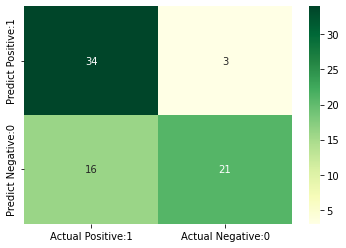

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.68      0.92      0.78        37
           1       0.88      0.57      0.69        37

    accuracy                           0.74        74
   macro avg       0.78      0.74      0.74        74
weighted avg       0.78      0.74      0.74        74



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2568


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_comp['Random Forest']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.6885245901639344
Accuracy: 0.7432432432432432
Recall : 0.5675675675675675
Precision : 0.875
ROC_AUC : 0.7432432432432432


## <h1 align="center"> KNN </h1>

---



---



In KNN, we are going to use GridSearchCV to find the best paramteres to hypertune our model. This will increase the model's accuracy and roc auc score. 

In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range, weights=['uniform','distance'], metric=['euclidean','manhattan'])
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(x_train1, y_train1)
print(grid_search.best_params_)

Fitting 10 folds for each of 116 candidates, totalling 1160 fits
{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}


In [ ]:
knn = KNeighborsClassifier(n_neighbors=8, metric='manhattan', weights='distance')
knn.fit(x_train1,y_train1)

KNeighborsClassifier(metric='manhattan', n_neighbors=8, weights='distance')

In [ ]:
y_pred_test1= knn.predict(x_test1)
y_pred_test1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0])

In [ ]:
y_pred_train1= knn.predict(x_train1)
y_pred_train1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train1, y_pred_train1)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test1, y_pred_test1)*100)

Testing accuracy:
78.37837837837837


### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred1 = y_pred_test1
cm = confusion_matrix(y_test1, y_pred1)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[34  3]
 [13 24]]

True Positives(TP) =  34

True Negatives(TN) =  24

False Positives(FP) =  3

False Negatives(FN) =  13


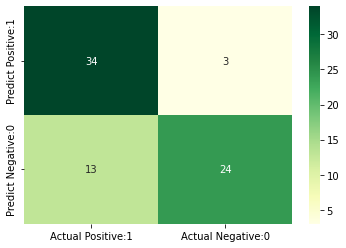

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81        37
           1       0.89      0.65      0.75        37

    accuracy                           0.78        74
   macro avg       0.81      0.78      0.78        74
weighted avg       0.81      0.78      0.78        74



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2162


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_comp['KNN']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.75
Accuracy: 0.7837837837837838
Recall : 0.6486486486486487
Precision : 0.8888888888888888
ROC_AUC : 0.7837837837837838


## <h1 align="center"> SVM </h1>

---



---



In SVC (SVM Classifier), we are going to use GridSearchCV to find the best paramteres to hypertune our model. This will increase the model's accuracy and roc auc score. 

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train1,y_train1)
print(grid.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

In [ ]:
svm = SVC(C=10, gamma=1)
svm.fit(x_train1,y_train1)

SVC(C=10, gamma=1)

In [ ]:
y_pred_test1= svm.predict(x_test1)
y_pred_test1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
y_pred_train1= svm.predict(x_train1)
y_pred_train1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train1, y_pred_train1)*100)

Training accuracy:
99.69879518072288


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test1, y_pred_test1)*100)

Testing accuracy:
67.56756756756756


### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred1 = y_pred_test1
cm = confusion_matrix(y_test1, y_pred1)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[33  4]
 [20 17]]

True Positives(TP) =  33

True Negatives(TN) =  17

False Positives(FP) =  4

False Negatives(FN) =  20


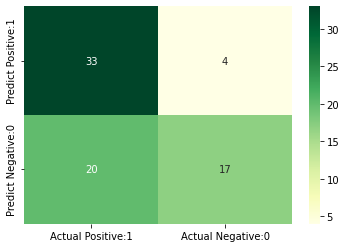

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.62      0.89      0.73        37
           1       0.81      0.46      0.59        37

    accuracy                           0.68        74
   macro avg       0.72      0.68      0.66        74
weighted avg       0.72      0.68      0.66        74



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.3243


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_comp['SVM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.5862068965517242
Accuracy: 0.6756756756756757
Recall : 0.4594594594594595
Precision : 0.8095238095238095
ROC_AUC : 0.6756756756756757


## <h1 align="center">LightGBM </h1>


---



---



In LightGBM, we are going to use Random Search CV to find the best paramteres to hypertune our model. This will increase the model's accuracy and other evaluation parameters.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
lgb=lgb.LGBMClassifier()
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}
clf=RandomizedSearchCV(lgb,parameters,scoring='accuracy',n_iter=100)
clf.fit(x_train1, y_train1)
print(clf.best_params_)
predicted=clf.predict(x_test1)
print('Classification accuracy of the result is:')
print(accuracy_score(y_test1, predicted))

{'reg_alpha': 0.01, 'num_leaves': 60, 'min_child_samples': 10, 'max_depth': 10, 'learning_rate': 0.05}
Classification accuracy of the result is:
0.8378378378378378


In [ ]:
clf= LGBMClassifier(reg_alpha=0.01, num_leaves=60, min_child_samples=10, max_depth=10, learning_rate=0.05)
clf.fit(x_train1,y_train1)

LGBMClassifier(learning_rate=0.05, max_depth=10, min_child_samples=10,
               num_leaves=60, reg_alpha=0.01)

In [ ]:
#Prediction
y_pred_test1 = clf.predict(x_test1)
y_pred_test1

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0])

In [ ]:
#Prediction
y_pred_train1 = clf.predict(x_train1)
y_pred_train1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train1, y_pred_train1)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test1, y_pred_test1)*100)

Testing accuracy:
83.78378378378379


We tried using GridSearchCV with our LightGBM model. However, it led to the lowering of results and overfitting of data. The problem arises due to the fact that LightGBM and GridSearchCV start too many threads i.e. more than available on the machine.If there are too many threads they clash and LightGBM stops execution.

### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred1 = y_pred_test1
cm = confusion_matrix(y_test1, y_pred1)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[33  4]
 [ 8 29]]

True Positives(TP) =  33

True Negatives(TN) =  29

False Positives(FP) =  4

False Negatives(FN) =  8


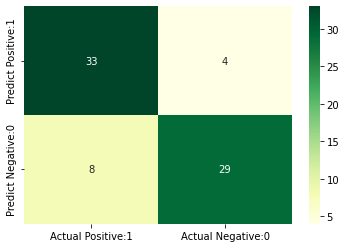

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85        37
           1       0.88      0.78      0.83        37

    accuracy                           0.84        74
   macro avg       0.84      0.84      0.84        74
weighted avg       0.84      0.84      0.84        74



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1622


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_comp['LightGBM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)


f1 Score : 0.8285714285714285
Accuracy: 0.8378378378378378
Recall : 0.7837837837837838
Precision : 0.8787878787878788
ROC_AUC : 0.8378378378378378


## <h1 align="center"> XGBoost <h1>

XGBoost is one of the most widely used gradient boosting algorithms in recent time.  XGBoost yields the best results if right parameters are served. Finding the best parameters is called hyper parameter tuning. We will use GridSearchCV to tune the parameters to get the best result from XGBoost.

In [ ]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [ ]:
from xgboost.sklearn import XGBClassifier
model = XGBClassifier()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

model, pred = algorithm_pipeline(x_train1, x_test1, y_train1, y_test1, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-model.best_score_))
print(model.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
0.29027661911321617
{'colsample_bytree': 0.7, 'max_depth': 15, 'n_estimators': 400, 'reg_alpha': 1.1, 'reg_lambda': 1.2, 'subsample': 0.9}


In [ ]:
xg = XGBClassifier(colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.2, subsample=0.9)
xg.fit(x_train1, y_train1)

XGBClassifier(colsample_bytree=0.7, max_depth=15, n_estimators=400,
              reg_alpha=1.1, reg_lambda=1.2, subsample=0.9)

In [ ]:
y_pred_test1 = xg.predict(x_test1)
y_pred_test1

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
y_pred_train1 = xg.predict(x_train1)
y_pred_train1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train1, y_pred_train1)*100)

Training accuracy:
99.69879518072288


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test1, y_pred_test1)*100)

Testing accuracy:
79.72972972972973


### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred1 = y_pred_test1
cm = confusion_matrix(y_test1, y_pred1)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[34  3]
 [12 25]]

True Positives(TP) =  34

True Negatives(TN) =  25

False Positives(FP) =  3

False Negatives(FN) =  12


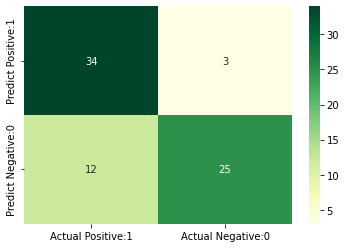

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        37
           1       0.89      0.68      0.77        37

    accuracy                           0.80        74
   macro avg       0.82      0.80      0.79        74
weighted avg       0.82      0.80      0.79        74



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2027


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_comp['XGBoost']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7692307692307693
Accuracy: 0.7972972972972973
Recall : 0.6756756756756757
Precision : 0.8928571428571429
ROC_AUC : 0.7972972972972973


## <b> <h1 align="center"> CONCLUSION </h1> </b>

---



---



In [ ]:
#Plotting the hypertunes prediction values of the top 3 models
model_comp

{'KNN': [0.75,
  0.7837837837837838,
  0.8888888888888888,
  0.6486486486486487,
  0.21621621621621623,
  0.7837837837837838],
 'LightGBM': [0.8285714285714285,
  0.8378378378378378,
  0.8787878787878788,
  0.7837837837837838,
  0.16216216216216217,
  0.8378378378378378],
 'Random Forest': [0.6885245901639344,
  0.7432432432432432,
  0.875,
  0.5675675675675675,
  0.25675675675675674,
  0.7432432432432432],
 'SVM': [0.5862068965517242,
  0.6756756756756757,
  0.8095238095238095,
  0.4594594594594595,
  0.32432432432432434,
  0.6756756756756757],
 'XGBoost': [0.7692307692307693,
  0.7972972972972973,
  0.8928571428571429,
  0.6756756756756757,
  0.20270270270270271,
  0.7972972972972973]}

In [ ]:
#Mapping the F! score, accuracy, precision, recall and classification error of the top 3 models

model_comp_df = pd.DataFrame.from_dict(model_comp).T
model_comp_df.columns = ['F1 Score','Accuracy','Precision','Recall','Classification Error','ROC AUC Score']
model_comp_df = model_comp_df.sort_values('ROC AUC Score', ascending=True)
model_comp_df.style.background_gradient(cmap='magma')

,F1 Score,Accuracy,Precision,Recall,Classification Error,ROC AUC Score
SVM,0.586207,0.675676,0.809524,0.459459,0.324324,0.675676
Random Forest,0.688525,0.743243,0.875000,0.567568,0.256757,0.743243
KNN,0.750000,0.783784,0.888889,0.648649,0.216216,0.783784
XGBoost,0.769231,0.797297,0.892857,0.675676,0.202703,0.797297
LightGBM,0.828571,0.837838,0.878788,0.783784,0.162162,0.837838


In [ ]:
#Plotting the above map
fig = go.Figure(data=[
    go.Bar(name='F1 Score', y=model_comp_df.index, x=model_comp_df['F1 Score'], orientation='h'),
    go.Bar(name='Accuracy', y=model_comp_df.index, x=model_comp_df['Accuracy'], orientation='h'),
    go.Bar(name='Precision', y=model_comp_df.index, x=model_comp_df['Precision'], orientation='h'),
    go.Bar(name='Recall', y=model_comp_df.index, x=model_comp_df['Recall'], orientation='h'),
    go.Bar(name='Classification Error', y=model_comp_df.index, x=model_comp_df['Classification Error'], orientation='h'),
    go.Bar(name='ROC AUC Score', y=model_comp_df.index, x=model_comp_df['ROC AUC Score'], orientation='h')
])
fig.update_layout(autosize=False, width=1100,
    height=600,barmode='group')
fig.show()

# SMOTE

In [ ]:
model_comp={}

## <h1 align="center"> Random Forest </h1>

---



---



In Random Forest, we are going to use GridSearchCV to find the best paramteres to hypertune our model. This will increase the model's accuracy and roc auc score. 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train2, y_train2)
print(CV_rfc.best_params_)

{'max_features': 'sqrt', 'n_estimators': 700}


In [ ]:
clf = RandomForestClassifier(n_estimators = 700, max_features='sqrt', random_state =0)
clf.fit(x_train2,y_train2)

RandomForestClassifier(max_features='sqrt', n_estimators=700, random_state=0)

In [ ]:
y_pred_test2= clf.predict(x_test2)
y_pred_test2

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
y_pred_train2= clf.predict(x_train2)
y_pred_train2

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train2, y_pred_train2)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test2, y_pred_test2)*100)

Testing accuracy:
82.43243243243244


### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred2 = y_pred_test2
cm = confusion_matrix(y_test2, y_pred2)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[31  6]
 [ 7 30]]

True Positives(TP) =  31

True Negatives(TN) =  30

False Positives(FP) =  6

False Negatives(FN) =  7


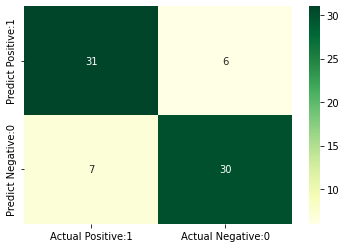

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        37
           1       0.83      0.81      0.82        37

    accuracy                           0.82        74
   macro avg       0.82      0.82      0.82        74
weighted avg       0.82      0.82      0.82        74



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1757


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_comp['Random Forest']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.8219178082191781
Accuracy: 0.8243243243243243
Recall : 0.8108108108108109
Precision : 0.8333333333333334
ROC_AUC : 0.8243243243243245


## <h1 align="center"> KNN </h1>

---



---



In KNN, we are going to use GridSearchCV to find the best paramteres to hypertune our model. This will increase the model's accuracy and roc auc score. 

In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range, weights=['uniform','distance'], metric=['euclidean','manhattan'])
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(x_train2, y_train2)
print(grid_search.best_params_)

Fitting 10 folds for each of 116 candidates, totalling 1160 fits
{'metric': 'manhattan', 'n_neighbors': 28, 'weights': 'distance'}


In [ ]:
knn = KNeighborsClassifier(n_neighbors=28, metric='manhattan', weights='distance')
knn.fit(x_train2,y_train2)

KNeighborsClassifier(metric='manhattan', n_neighbors=28, weights='distance')

In [ ]:
y_pred_test2= knn.predict(x_test2)
y_pred_test2

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
y_pred_train2= knn.predict(x_train2)
y_pred_train2

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train2, y_pred_train2)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test2, y_pred_test2)*100)

Testing accuracy:
77.02702702702703


### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred2 = y_pred_test2
cm = confusion_matrix(y_test2, y_pred2)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[32  5]
 [12 25]]

True Positives(TP) =  32

True Negatives(TN) =  25

False Positives(FP) =  5

False Negatives(FN) =  12


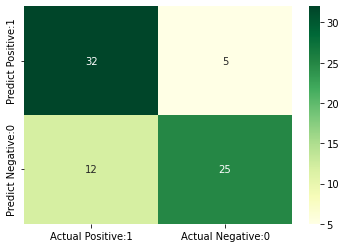

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79        37
           1       0.83      0.68      0.75        37

    accuracy                           0.77        74
   macro avg       0.78      0.77      0.77        74
weighted avg       0.78      0.77      0.77        74



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2297


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_comp['KNN']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.746268656716418
Accuracy: 0.7702702702702703
Recall : 0.6756756756756757
Precision : 0.8333333333333334
ROC_AUC : 0.7702702702702703


## <h1 align="center"> SVM </h1>

---



---



In SVC (SVM Classifier), we are going to use GridSearchCV to find the best paramteres to hypertune our model. This will increase the model's accuracy and roc auc score. 

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train2,y_train2)
print(grid.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

In [ ]:
svm = SVC(C=1, gamma=1)
svm.fit(x_train2,y_train2)

SVC(C=1, gamma=1)

In [ ]:
y_pred_test2= svm.predict(x_test2)
y_pred_test2

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
y_pred_train2= svm.predict(x_train2)
y_pred_train2

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train2, y_pred_train2)*100)

Training accuracy:
96.08433734939759


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test2, y_pred_test2)*100)

Testing accuracy:
75.67567567567568


### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred2 = y_pred_test2
cm = confusion_matrix(y_test2, y_pred2)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[33  4]
 [14 23]]

True Positives(TP) =  33

True Negatives(TN) =  23

False Positives(FP) =  4

False Negatives(FN) =  14


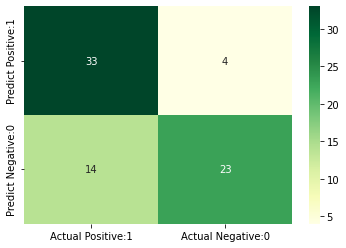

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.70      0.89      0.79        37
           1       0.85      0.62      0.72        37

    accuracy                           0.76        74
   macro avg       0.78      0.76      0.75        74
weighted avg       0.78      0.76      0.75        74



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2432


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_comp['SVM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7187499999999999
Accuracy: 0.7567567567567568
Recall : 0.6216216216216216
Precision : 0.8518518518518519
ROC_AUC : 0.7567567567567567


## <h1 align="center">LightGBM </h1>


---



---



In LightGBM, we are going to use Random Search CV to find the best paramteres to hypertune our model. This will increase the model's accuracy and other evaluation parameters.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
lgb=lgb.LGBMClassifier()
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}
clf=RandomizedSearchCV(lgb,parameters,scoring='accuracy',n_iter=100)
clf.fit(x_train2, y_train2)
print(clf.best_params_)
predicted=clf.predict(x_test2)
print('Classification accuracy of the result is:')
print(accuracy_score(y_test2, predicted))

{'reg_alpha': 0.01, 'num_leaves': 80, 'min_child_samples': 5, 'max_depth': 10, 'learning_rate': 0.2}
Classification accuracy of the result is:
0.8243243243243243


In [ ]:
clf= LGBMClassifier(reg_alpha=0.01, num_leaves=80, min_child_samples=5, max_depth=10, learning_rate=0.2)
clf.fit(x_train2,y_train2)

LGBMClassifier(learning_rate=0.2, max_depth=10, min_child_samples=5,
               num_leaves=80, reg_alpha=0.01)

In [ ]:
#Prediction
y_pred_train2 = clf.predict(x_train2)
y_pred_train2

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#Prediction
y_pred_test2 = clf.predict(x_test2)
y_pred_test2

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train2, y_pred_train2)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test2, y_pred_test2)*100)

Testing accuracy:
82.43243243243244


We tried using GridSearchCV with our LightGBM model. However, it led to the lowering of results and overfitting of data. The problem arises due to the fact that LightGBM and GridSearchCV start too many threads i.e. more than available on the machine.If there are too many threads they clash and LightGBM stops execution.

### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred2 = y_pred_test2
cm = confusion_matrix(y_test2, y_pred2)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[30  7]
 [ 6 31]]

True Positives(TP) =  30

True Negatives(TN) =  31

False Positives(FP) =  7

False Negatives(FN) =  6


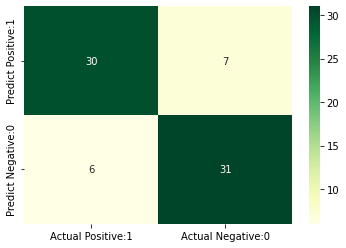

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        37
           1       0.82      0.84      0.83        37

    accuracy                           0.82        74
   macro avg       0.82      0.82      0.82        74
weighted avg       0.82      0.82      0.82        74



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1757


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_comp['LightGBM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)


f1 Score : 0.8266666666666665
Accuracy: 0.8243243243243243
Recall : 0.8378378378378378
Precision : 0.8157894736842105
ROC_AUC : 0.8243243243243242


## <h1 align="center"> XGBoost <h1>

XGBoost is one of the most widely used gradient boosting algorithms in recent time.  XGBoost yields the best results if right parameters are served. Finding the best parameters is called hyper parameter tuning. We will use GridSearchCV to tune the parameters to get the best result from XGBoost.

In [ ]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [ ]:
from xgboost.sklearn import XGBClassifier
model = XGBClassifier()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

model, pred = algorithm_pipeline(x_train2, x_test2, y_train2, y_test2, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-model.best_score_))
print(model.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
0.32877938532591605
{'colsample_bytree': 0.7, 'max_depth': 15, 'n_estimators': 700, 'reg_alpha': 1.3, 'reg_lambda': 1.3, 'subsample': 0.7}


In [ ]:
xg = XGBClassifier(colsample_bytree=0.7, max_depth=15, n_estimators=700, reg_alpha=1.3, reg_lambda=1.3, subsample=0.7)
xg.fit(x_train2, y_train2)

XGBClassifier(colsample_bytree=0.7, max_depth=15, n_estimators=700,
              reg_alpha=1.3, reg_lambda=1.3, subsample=0.7)

In [ ]:
y_pred_test2 = xg.predict(x_test2)
y_pred_test2

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
y_pred_train2 = xg.predict(x_train2)
y_pred_train2

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train2, y_pred_train2)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test2, y_pred_test2)*100)

Testing accuracy:
85.13513513513513


### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred2 = y_pred_test2
cm = confusion_matrix(y_test2, y_pred2)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[32  5]
 [ 6 31]]

True Positives(TP) =  32

True Negatives(TN) =  31

False Positives(FP) =  5

False Negatives(FN) =  6


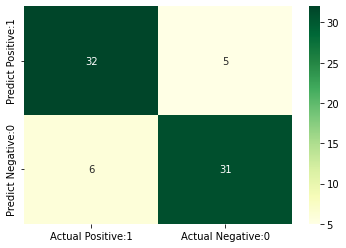

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        37
           1       0.86      0.84      0.85        37

    accuracy                           0.85        74
   macro avg       0.85      0.85      0.85        74
weighted avg       0.85      0.85      0.85        74



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1486


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_comp['XGBoost']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.8493150684931507
Accuracy: 0.8513513513513513
Recall : 0.8378378378378378
Precision : 0.8611111111111112
ROC_AUC : 0.8513513513513513


## <b> <h1 align="center"> CONCLUSION </h1> </b>

---



---



In [ ]:
#Plotting the hypertunes prediction values of the top 3 models
model_comp

{'KNN': [0.746268656716418,
  0.7702702702702703,
  0.8333333333333334,
  0.6756756756756757,
  0.22972972972972974,
  0.7702702702702703],
 'LightGBM': [0.8266666666666665,
  0.8243243243243243,
  0.8157894736842105,
  0.8378378378378378,
  0.17567567567567569,
  0.8243243243243242],
 'Random Forest': [0.8219178082191781,
  0.8243243243243243,
  0.8333333333333334,
  0.8108108108108109,
  0.17567567567567569,
  0.8243243243243245],
 'SVM': [0.7187499999999999,
  0.7567567567567568,
  0.8518518518518519,
  0.6216216216216216,
  0.24324324324324326,
  0.7567567567567567],
 'XGBoost': [0.8493150684931507,
  0.8513513513513513,
  0.8611111111111112,
  0.8378378378378378,
  0.14864864864864866,
  0.8513513513513513]}

In [ ]:
#Mapping the F! score, accuracy, precision, recall and classification error of the top 3 models

model_comp_df = pd.DataFrame.from_dict(model_comp).T
model_comp_df.columns = ['F1 Score','Accuracy','Precision','Recall','Classification Error','ROC AUC Score']
model_comp_df = model_comp_df.sort_values('ROC AUC Score', ascending=True)
model_comp_df.style.background_gradient(cmap='magma')

,F1 Score,Accuracy,Precision,Recall,Classification Error,ROC AUC Score
SVM,0.718750,0.756757,0.851852,0.621622,0.243243,0.756757
KNN,0.746269,0.770270,0.833333,0.675676,0.229730,0.770270
LightGBM,0.826667,0.824324,0.815789,0.837838,0.175676,0.824324
Random Forest,0.821918,0.824324,0.833333,0.810811,0.175676,0.824324
XGBoost,0.849315,0.851351,0.861111,0.837838,0.148649,0.851351


In [ ]:
#Plotting the above map
fig = go.Figure(data=[
    go.Bar(name='F1 Score', y=model_comp_df.index, x=model_comp_df['F1 Score'], orientation='h'),
    go.Bar(name='Accuracy', y=model_comp_df.index, x=model_comp_df['Accuracy'], orientation='h'),
    go.Bar(name='Precision', y=model_comp_df.index, x=model_comp_df['Precision'], orientation='h'),
    go.Bar(name='Recall', y=model_comp_df.index, x=model_comp_df['Recall'], orientation='h'),
    go.Bar(name='Classification Error', y=model_comp_df.index, x=model_comp_df['Classification Error'], orientation='h'),
    go.Bar(name='ROC AUC Score', y=model_comp_df.index, x=model_comp_df['ROC AUC Score'], orientation='h')
])
fig.update_layout(autosize=False, width=1100,
    height=600,barmode='group')
fig.show()

# ADASYN

In [ ]:
model_comp={}

## <h1 align="center"> Random Forest </h1>

---



---



In Random Forest, we are going to use GridSearchCV to find the best paramteres to hypertune our model. This will increase the model's accuracy and roc auc score. 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train3, y_train3)
print(CV_rfc.best_params_)

{'max_features': 'sqrt', 'n_estimators': 200}


In [ ]:
clf = RandomForestClassifier(n_estimators = 200, max_features='sqrt', random_state =0)
clf.fit(x_train3,y_train3)

RandomForestClassifier(max_features='sqrt', n_estimators=200, random_state=0)

In [ ]:
y_pred_test3= clf.predict(x_test3)
y_pred_test3

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
y_pred_train3= clf.predict(x_train3)
y_pred_train3

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train3, y_pred_train3)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test3, y_pred_test3)*100)

Testing accuracy:
80.0


### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred3 = y_pred_test3
cm = confusion_matrix(y_test3, y_pred3)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[32  5]
 [11 32]]

True Positives(TP) =  32

True Negatives(TN) =  32

False Positives(FP) =  5

False Negatives(FN) =  11


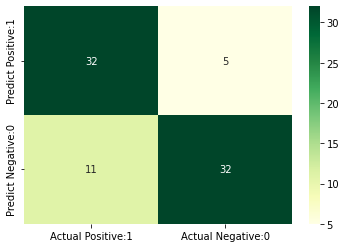

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80        37
           1       0.86      0.74      0.80        43

    accuracy                           0.80        80
   macro avg       0.80      0.80      0.80        80
weighted avg       0.81      0.80      0.80        80



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2000


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_comp['Random Forest']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.8
Accuracy: 0.8
Recall : 0.7441860465116279
Precision : 0.8648648648648649
ROC_AUC : 0.8045254556882464


## <h1 align="center"> SVM </h1>

---



---



In SVC (SVM Classifier), we are going to use GridSearchCV to find the best paramteres to hypertune our model. This will increase the model's accuracy and roc auc score. 

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train3,y_train3)
print(grid.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

In [ ]:
svm = SVC(C=1, gamma=0.1, kernel='sigmoid')
svm.fit(x_train3,y_train3)

SVC(C=1, gamma=0.1, kernel='sigmoid')

In [ ]:
y_pred_test3= svm.predict(x_test3)
y_pred_test3

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1])

In [ ]:
y_pred_train3= svm.predict(x_train3)
y_pred_train3

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train3, y_pred_train3)*100)

Training accuracy:
82.46153846153847


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test3, y_pred_test3)*100)

Testing accuracy:
72.5


### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred3 = y_pred_test3
cm = confusion_matrix(y_test3, y_pred3)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[30  7]
 [15 28]]

True Positives(TP) =  30

True Negatives(TN) =  28

False Positives(FP) =  7

False Negatives(FN) =  15


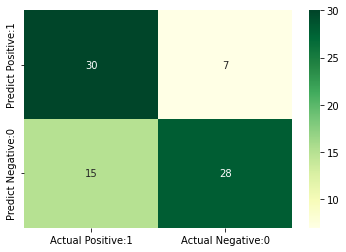

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.67      0.81      0.73        37
           1       0.80      0.65      0.72        43

    accuracy                           0.73        80
   macro avg       0.73      0.73      0.72        80
weighted avg       0.74      0.72      0.72        80



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2750


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_comp['SVM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7179487179487181
Accuracy: 0.725
Recall : 0.6511627906976745
Precision : 0.8
ROC_AUC : 0.7309868007542426


## <h1 align="center"> KNN </h1>

---



---



In KNN, we are going to use GridSearchCV to find the best paramteres to hypertune our model. This will increase the model's accuracy and roc auc score. 

In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range, weights=['uniform','distance'], metric=['euclidean','manhattan'])
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(x_train3, y_train3)
print(grid_search.best_params_)

Fitting 10 folds for each of 116 candidates, totalling 1160 fits
{'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}


In [ ]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors= 10, weights='distance')
knn.fit(x_train3,y_train3)

KNeighborsClassifier(metric='manhattan', n_neighbors=10, weights='distance')

In [ ]:
y_pred_test3= knn.predict(x_test3)
y_pred_test3

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [ ]:
y_pred_train3= knn.predict(x_train3)
y_pred_train3

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train3, y_pred_train3)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test3, y_pred_test3)*100)

Testing accuracy:
75.0


### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred3 = y_pred_test3
cm = confusion_matrix(y_test3, y_pred3)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[33  4]
 [16 27]]

True Positives(TP) =  33

True Negatives(TN) =  27

False Positives(FP) =  4

False Negatives(FN) =  16


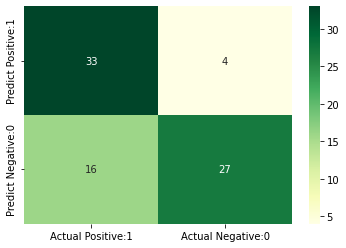

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.67      0.89      0.77        37
           1       0.87      0.63      0.73        43

    accuracy                           0.75        80
   macro avg       0.77      0.76      0.75        80
weighted avg       0.78      0.75      0.75        80



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2500


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_comp['KNN']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7297297297297297
Accuracy: 0.75
Recall : 0.627906976744186
Precision : 0.8709677419354839
ROC_AUC : 0.759899434318039


## <h1 align="center">LightGBM </h1>


---



---



In LightGBM, we are going to use Random Search CV to find the best paramteres to hypertune our model. This will increase the model's accuracy and other evaluation parameters.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
lgb=lgb.LGBMClassifier()
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}
clf=RandomizedSearchCV(lgb,parameters,scoring='accuracy',n_iter=100)
clf.fit(x_train3, y_train3)
print(clf.best_params_)
predicted=clf.predict(x_test3)
print('Classification accuracy of the result is:')
print(accuracy_score(y_test3, predicted))

{'reg_alpha': 0.01, 'num_leaves': 60, 'min_child_samples': 15, 'max_depth': 20, 'learning_rate': 0.2}
Classification accuracy of the result is:
0.7875


In [ ]:
clf= LGBMClassifier(reg_alpha=0.01, num_leaves=60, min_child_samples=15, max_depth=20, learning_rate=0.2)
clf.fit(x_train3,y_train3)

LGBMClassifier(learning_rate=0.2, max_depth=20, min_child_samples=15,
               num_leaves=60, reg_alpha=0.01)

In [ ]:
#Prediction
y_pred_train3 = clf.predict(x_train3)
y_pred_train3

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#Prediction
y_pred_test3 = clf.predict(x_test3)
y_pred_test3

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train3, y_pred_train3)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test3, y_pred_test3)*100)

Testing accuracy:
78.75


We tried using GridSearchCV with our LightGBM model. However, it led to the lowering of results and overfitting of data. The problem arises due to the fact that LightGBM and GridSearchCV start too many threads i.e. more than available on the machine.If there are too many threads they clash and LightGBM stops execution.

### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred3 = y_pred_test3
cm = confusion_matrix(y_test3, y_pred3)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[31  6]
 [11 32]]

True Positives(TP) =  31

True Negatives(TN) =  32

False Positives(FP) =  6

False Negatives(FN) =  11


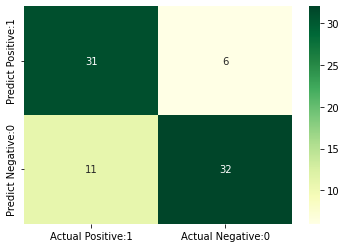

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.74      0.84      0.78        37
           1       0.84      0.74      0.79        43

    accuracy                           0.79        80
   macro avg       0.79      0.79      0.79        80
weighted avg       0.79      0.79      0.79        80



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2125


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_comp['LightGBM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)


f1 Score : 0.7901234567901234
Accuracy: 0.7875
Recall : 0.7441860465116279
Precision : 0.8421052631578947
ROC_AUC : 0.7910119421747329


## <h1 align="center"> XGBoost <h1>

XGBoost is one of the most widely used gradient boosting algorithms in recent time.  XGBoost yields the best results if right parameters are served. Finding the best parameters is called hyper parameter tuning. We will use GridSearchCV to tune the parameters to get the best result from XGBoost.

In [ ]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [ ]:
from xgboost.sklearn import XGBClassifier
model = XGBClassifier()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

model, pred = algorithm_pipeline(x_train3, x_test3, y_train3, y_test3, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-model.best_score_))
print(model.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
0.34641016151377546
{'colsample_bytree': 0.7, 'max_depth': 15, 'n_estimators': 400, 'reg_alpha': 1.1, 'reg_lambda': 1.1, 'subsample': 0.7}


In [ ]:
xg = XGBClassifier(colsample_bytree=0.7, max_depth=15, n_estimators=400, reg_alpha=1.1, reg_lambda=1.1, subsample=0.7)
xg.fit(x_train3, y_train3)

XGBClassifier(colsample_bytree=0.7, max_depth=15, n_estimators=400,
              reg_alpha=1.1, reg_lambda=1.1, subsample=0.7)

In [ ]:
y_pred_train3 = xg.predict(x_train3)
y_pred_train3

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
y_pred_test3 = xg.predict(x_test3)
y_pred_test3

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train3, y_pred_train3)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test3, y_pred_test3)*100)

Testing accuracy:
80.0


### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred3 = y_pred_test3
cm = confusion_matrix(y_test3, y_pred3)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[33  4]
 [12 31]]

True Positives(TP) =  33

True Negatives(TN) =  31

False Positives(FP) =  4

False Negatives(FN) =  12


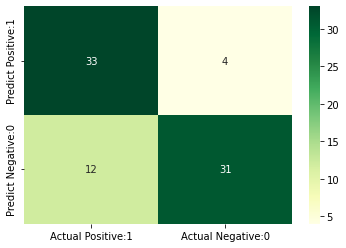

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80        37
           1       0.89      0.72      0.79        43

    accuracy                           0.80        80
   macro avg       0.81      0.81      0.80        80
weighted avg       0.82      0.80      0.80        80



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2000


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_comp['XGBoost']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7948717948717948
Accuracy: 0.8
Recall : 0.7209302325581395
Precision : 0.8857142857142857
ROC_AUC : 0.8064110622250157


## <b> <h1 align="center"> CONCLUSION </h1> </b>

---



---



In [ ]:
#Plotting the hypertunes prediction values of the top 3 models
model_comp

{'KNN': [0.7297297297297297,
  0.75,
  0.8709677419354839,
  0.627906976744186,
  0.25,
  0.759899434318039],
 'LightGBM': [0.7901234567901234,
  0.7875,
  0.8421052631578947,
  0.7441860465116279,
  0.2125,
  0.7910119421747329],
 'Random Forest': [0.8,
  0.8,
  0.8648648648648649,
  0.7441860465116279,
  0.2,
  0.8045254556882464],
 'SVM': [0.7179487179487181,
  0.725,
  0.8,
  0.6511627906976745,
  0.275,
  0.7309868007542426],
 'XGBoost': [0.7948717948717948,
  0.8,
  0.8857142857142857,
  0.7209302325581395,
  0.2,
  0.8064110622250157]}

In [ ]:
#Mapping the F! score, accuracy, precision, recall and classification error of the top 3 models

model_comp_df = pd.DataFrame.from_dict(model_comp).T
model_comp_df.columns = ['F1 Score','Accuracy','Precision','Recall','Classification Error','ROC AUC Score']
model_comp_df = model_comp_df.sort_values('ROC AUC Score', ascending=True)
model_comp_df.style.background_gradient(cmap='magma')

,F1 Score,Accuracy,Precision,Recall,Classification Error,ROC AUC Score
SVM,0.717949,0.725000,0.800000,0.651163,0.275000,0.730987
KNN,0.729730,0.750000,0.870968,0.627907,0.250000,0.759899
LightGBM,0.790123,0.787500,0.842105,0.744186,0.212500,0.791012
Random Forest,0.800000,0.800000,0.864865,0.744186,0.200000,0.804525
XGBoost,0.794872,0.800000,0.885714,0.720930,0.200000,0.806411


In [ ]:
#Plotting the above map
fig = go.Figure(data=[
    go.Bar(name='F1 Score', y=model_comp_df.index, x=model_comp_df['F1 Score'], orientation='h'),
    go.Bar(name='Accuracy', y=model_comp_df.index, x=model_comp_df['Accuracy'], orientation='h'),
    go.Bar(name='Precision', y=model_comp_df.index, x=model_comp_df['Precision'], orientation='h'),
    go.Bar(name='Recall', y=model_comp_df.index, x=model_comp_df['Recall'], orientation='h'),
    go.Bar(name='Classification Error', y=model_comp_df.index, x=model_comp_df['Classification Error'], orientation='h'),
    go.Bar(name='ROC AUC Score', y=model_comp_df.index, x=model_comp_df['ROC AUC Score'], orientation='h')
])
fig.update_layout(autosize=False, width=1100,
    height=600,barmode='group')
fig.show()

# ---

---



---



---



---



# ---



# Top 5 Features

In [ ]:
x=df[['age','creatinine_phosphokinase','ejection_fraction','serum_creatinine','time']]
y=df['DEATH_EVENT']

In [ ]:
#Training Testing Data Split

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
#ROS

from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=0)

x_train1, y_train1 = ros.fit_resample(X_train, Y_train)
x_test1, y_test1 = ros.fit_resample(X_test, Y_test)

print('Original train dataset shape', Counter(Y_train))
print('Resample train dataset shape', Counter(y_train1))
print('Original test dataset shape', Counter(Y_test))
print('Resample test dataset shape', Counter(y_test1))

Original train dataset shape Counter({0: 166, 1: 73})
Resample train dataset shape Counter({0: 166, 1: 166})
Original test dataset shape Counter({0: 37, 1: 23})
Resample test dataset shape Counter({0: 37, 1: 37})


In [ ]:
#SMOTE

from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=0)

x_train2, y_train2 = smote.fit_resample(X_train, Y_train)
x_test2, y_test2 = smote.fit_resample(X_test, Y_test)

print('Original train dataset shape', Counter(Y_train))
print('Resample train dataset shape', Counter(y_train2))
print('Original test dataset shape', Counter(Y_test))
print('Resample test dataset shape', Counter(y_test2))

Original train dataset shape Counter({0: 166, 1: 73})
Resample train dataset shape Counter({0: 166, 1: 166})
Original test dataset shape Counter({0: 37, 1: 23})
Resample test dataset shape Counter({0: 37, 1: 37})


In [ ]:
#ADASYN

from imblearn.over_sampling import ADASYN 
from collections import Counter

ada = ADASYN(random_state=0)

x_train3, y_train3 = ada.fit_resample(X_train, Y_train)
x_test3, y_test3 = ada.fit_resample(X_test, Y_test)

print('Original train dataset shape', Counter(Y_train))
print('Resample train dataset shape', Counter(y_train3))
print('Original test dataset shape', Counter(Y_test))
print('Resample test dataset shape', Counter(y_test3))

Original train dataset shape Counter({0: 166, 1: 73})
Resample train dataset shape Counter({1: 170, 0: 166})
Original test dataset shape Counter({0: 37, 1: 23})
Resample test dataset shape Counter({0: 37, 1: 37})


In [ ]:
from sklearn.preprocessing import StandardScaler
scs = StandardScaler()
#ROS
x_train1 = scs.fit_transform(x_train1)
x_test1 = scs.transform(x_test1)

#SMOTE
x_train2 = scs.fit_transform(x_train2)
x_test2 = scs.transform(x_test2)

#ADASYN
x_train3 = scs.fit_transform(x_train3)
x_test3 = scs.transform(x_test3)

In [ ]:
#ROS
model_test1={}

#SMOTE
model_test2={}

#ADASYN
model_test3={}

# <h1 align="center"> Logistic Regression </h1>

---



---



In [ ]:
lr=LogisticRegression()
#ROS
lr.fit(x_train1,y_train1)

#SMOTE
lr.fit(x_train2,y_train2)

#ADASYN
lr.fit(x_train3,y_train3)

LogisticRegression()

In [ ]:
#ROS
y_pred_test1= lr.predict(x_test1)

#SMOTE
y_pred_test2= lr.predict(x_test2)

#ADASYN
y_pred_test3= lr.predict(x_test3)


In [ ]:
#ROS
y_pred_train1 = lr.predict(x_train1)

#SMOTE
y_pred_train2 = lr.predict(x_train2)

#ADASYN
y_pred_train3 = lr.predict(x_train3)


In [ ]:
#ROS
print("Testing accuracy of ROS Data:")
print(accuracy_score(y_test1, y_pred_test1)*100)
print()

#SMOTE
print("Testing accuracy of SMOTE Data:")
print(accuracy_score(y_test2, y_pred_test2)*100)
print()

#ADASYN
print("Testing accuracy of ADASYN Data:")
print(accuracy_score(y_test3, y_pred_test3)*100)
print()

Testing accuracy of ROS Data:
72.97297297297297

Testing accuracy of SMOTE Data:
79.72972972972973

Testing accuracy of ADASYN Data:
81.08108108108108



In [ ]:
#ROS
print("Training accuracy of ROS Data:")
print(accuracy_score(y_train1, y_pred_train1)*100)
print()

#SMOTE
print("Training accuracy of SMOTE Data:")
print(accuracy_score(y_train2, y_pred_train2)*100)
print()

#ADASYN
print("Training accuracy of ADASYN Data:")
print(accuracy_score(y_train3, y_pred_train3)*100)
print()

Training accuracy of ROS Data:
82.53012048192771

Training accuracy of SMOTE Data:
84.03614457831326

Training accuracy of ADASYN Data:
82.73809523809523



## <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
#ROS
y_pred1 = y_pred_test1
cm1 = confusion_matrix(y_test1, y_pred1)

#SMOTE
y_pred2 = y_pred_test2
cm2 = confusion_matrix(y_test2, y_pred2)

#ADASYN
y_pred3 = y_pred_test3
cm3 = confusion_matrix(y_test3, y_pred3)

### ROS

In [ ]:
print('Confusion matrix\n', cm1)

print('\nTrue Positives(TP) = ', cm1[0,0])

print('\nTrue Negatives(TN) = ', cm1[1,1])

print('\nFalse Positives(FP) = ', cm1[0,1])

print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix
 [[30  7]
 [13 24]]

True Positives(TP) =  30

True Negatives(TN) =  24

False Positives(FP) =  7

False Negatives(FN) =  13


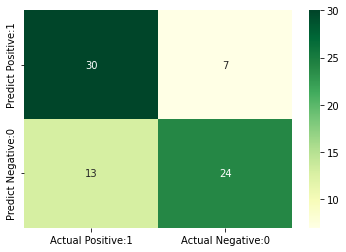

In [ ]:
cm1_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75        37
           1       0.77      0.65      0.71        37

    accuracy                           0.73        74
   macro avg       0.74      0.73      0.73        74
weighted avg       0.74      0.73      0.73        74



In [ ]:
TP = cm1[0,0]
TN = cm1[1,1]
FP = cm1[0,1]
FN = cm1[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2703


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_test1['Logistic Regression']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7058823529411764
Accuracy: 0.7297297297297297
Recall : 0.6486486486486487
Precision : 0.7741935483870968
ROC_AUC : 0.7297297297297297


### SMOTE

In [ ]:
print('Confusion matrix\n', cm2)

print('\nTrue Positives(TP) = ', cm2[0,0])

print('\nTrue Negatives(TN) = ', cm2[1,1])

print('\nFalse Positives(FP) = ', cm2[0,1])

print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix
 [[31  6]
 [ 9 28]]

True Positives(TP) =  31

True Negatives(TN) =  28

False Positives(FP) =  6

False Negatives(FN) =  9


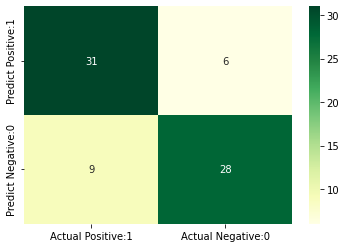

In [ ]:
cm2_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        37
           1       0.82      0.76      0.79        37

    accuracy                           0.80        74
   macro avg       0.80      0.80      0.80        74
weighted avg       0.80      0.80      0.80        74



In [ ]:
TP = cm2[0,0]
TN = cm2[1,1]
FP = cm2[0,1]
FN = cm2[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2027


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_test2['Logistic Regression']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7887323943661971
Accuracy: 0.7972972972972973
Recall : 0.7567567567567568
Precision : 0.8235294117647058
ROC_AUC : 0.7972972972972973


### ADASYN

In [ ]:
print('Confusion matrix\n', cm3)

print('\nTrue Positives(TP) = ', cm3[0,0])

print('\nTrue Negatives(TN) = ', cm3[1,1])

print('\nFalse Positives(FP) = ', cm3[0,1])

print('\nFalse Negatives(FN) = ', cm3[1,0])

Confusion matrix
 [[31  6]
 [ 8 29]]

True Positives(TP) =  31

True Negatives(TN) =  29

False Positives(FP) =  6

False Negatives(FN) =  8


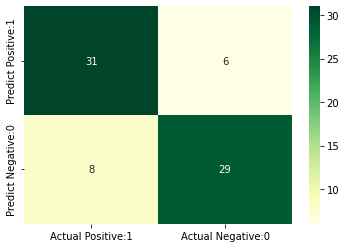

In [ ]:
cm3_matrix = pd.DataFrame(data=cm3, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm3_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        37
           1       0.83      0.78      0.81        37

    accuracy                           0.81        74
   macro avg       0.81      0.81      0.81        74
weighted avg       0.81      0.81      0.81        74



In [ ]:
TP = cm3[0,0]
TN = cm3[1,1]
FP = cm3[0,1]
FN = cm3[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1892


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_test3['Logistic Regression']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.8055555555555555
Accuracy: 0.8108108108108109
Recall : 0.7837837837837838
Precision : 0.8285714285714286
ROC_AUC : 0.8108108108108109


# <h1 align="center"> Random Forest </h1>

---



---



In [ ]:
clf = RandomForestClassifier()
#ROS
clf.fit(x_train1,y_train1)

#SMOTE
clf.fit(x_train2,y_train2)

#ADASYN
clf.fit(x_train3,y_train3)

RandomForestClassifier()

In [ ]:
#ROS
y_pred_test1= clf.predict(x_test1)

#SMOTE
y_pred_test2= clf.predict(x_test2)

#ADASYN
y_pred_test3= clf.predict(x_test3)

In [ ]:
#ROS
y_pred_train1 = clf.predict(x_train1)

#SMOTE
y_pred_train2 = clf.predict(x_train2)

#ADASYN
y_pred_train3 = clf.predict(x_train3)


In [ ]:
#ROS
print("Testing accuracy of ROS Data:")
print( accuracy_score(y_test1, y_pred_test1)*100)
print()

#SMOTE
print("Testing accuracy of SMOTE Data:")
print( accuracy_score(y_test2, y_pred_test2)*100)
print()

#ADASYN
print("Testing accuracy of ADASYN Data:")
print( accuracy_score(y_test3, y_pred_test3)*100)
print()

Testing accuracy of ROS Data:
81.08108108108108

Testing accuracy of SMOTE Data:
82.43243243243244

Testing accuracy of ADASYN Data:
78.37837837837837



In [ ]:
#ROS
print("Training accuracy of ROS Data:")
print( accuracy_score(y_train1, y_pred_train1)*100)
print()

#SMOTE
print("Training accuracy of SMOTE Data:")
print( accuracy_score(y_train2, y_pred_train2)*100)
print()

#ADASYN
print("Training accuracy of ADASYN Data:")
print( accuracy_score(y_train3, y_pred_train3)*100)
print()

Training accuracy of ROS Data:
95.48192771084338

Training accuracy of SMOTE Data:
95.48192771084338

Training accuracy of ADASYN Data:
100.0



## <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
#ROS
y_pred1 = y_pred_test1
cm1 = confusion_matrix(y_test1, y_pred1)

#SMOTE
y_pred2 = y_pred_test2
cm2 = confusion_matrix(y_test2, y_pred2)

#ADASYN
y_pred3 = y_pred_test3
cm3 = confusion_matrix(y_test3, y_pred3)

### ROS

In [ ]:
print('Confusion matrix\n', cm1)

print('\nTrue Positives(TP) = ', cm1[0,0])

print('\nTrue Negatives(TN) = ', cm1[1,1])

print('\nFalse Positives(FP) = ', cm1[0,1])

print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix
 [[35  2]
 [12 25]]

True Positives(TP) =  35

True Negatives(TN) =  25

False Positives(FP) =  2

False Negatives(FN) =  12


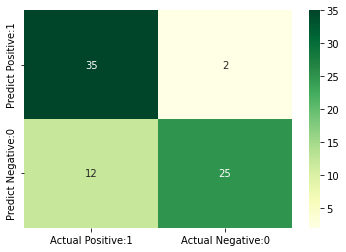

In [ ]:
cm1_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.74      0.95      0.83        37
           1       0.93      0.68      0.78        37

    accuracy                           0.81        74
   macro avg       0.84      0.81      0.81        74
weighted avg       0.84      0.81      0.81        74



In [ ]:
TP = cm1[0,0]
TN = cm1[1,1]
FP = cm1[0,1]
FN = cm1[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1892


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_test1['Random Forest']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7812500000000001
Accuracy: 0.8108108108108109
Recall : 0.6756756756756757
Precision : 0.9259259259259259
ROC_AUC : 0.8108108108108109


### SMOTE

In [ ]:
print('Confusion matrix\n', cm2)

print('\nTrue Positives(TP) = ', cm2[0,0])

print('\nTrue Negatives(TN) = ', cm2[1,1])

print('\nFalse Positives(FP) = ', cm2[0,1])

print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix
 [[35  2]
 [11 26]]

True Positives(TP) =  35

True Negatives(TN) =  26

False Positives(FP) =  2

False Negatives(FN) =  11


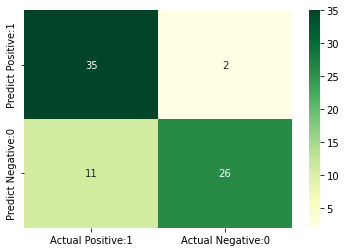

In [ ]:
cm2_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84        37
           1       0.93      0.70      0.80        37

    accuracy                           0.82        74
   macro avg       0.84      0.82      0.82        74
weighted avg       0.84      0.82      0.82        74



In [ ]:
TP = cm2[0,0]
TN = cm2[1,1]
FP = cm2[0,1]
FN = cm2[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1757


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_test2['Random Forest']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7999999999999999
Accuracy: 0.8243243243243243
Recall : 0.7027027027027027
Precision : 0.9285714285714286
ROC_AUC : 0.8243243243243243


### ADASYN

In [ ]:
print('Confusion matrix\n', cm3)

print('\nTrue Positives(TP) = ', cm3[0,0])

print('\nTrue Negatives(TN) = ', cm3[1,1])

print('\nFalse Positives(FP) = ', cm3[0,1])

print('\nFalse Negatives(FN) = ', cm3[1,0])

Confusion matrix
 [[32  5]
 [11 26]]

True Positives(TP) =  32

True Negatives(TN) =  26

False Positives(FP) =  5

False Negatives(FN) =  11


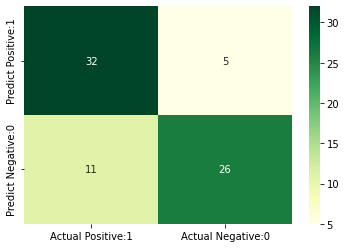

In [ ]:
cm3_matrix = pd.DataFrame(data=cm3, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm3_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80        37
           1       0.84      0.70      0.76        37

    accuracy                           0.78        74
   macro avg       0.79      0.78      0.78        74
weighted avg       0.79      0.78      0.78        74



In [ ]:
TP = cm3[0,0]
TN = cm3[1,1]
FP = cm3[0,1]
FN = cm3[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2162


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_test3['Random Forest']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7647058823529411
Accuracy: 0.7837837837837838
Recall : 0.7027027027027027
Precision : 0.8387096774193549
ROC_AUC : 0.7837837837837838


# <h1 align="center">K Nearest Neighbour (KNN) Classifier </h1>

---



---



In [ ]:
knn = KNeighborsClassifier()
#ROS
knn.fit(x_train1,y_train1)

#SMOTE
knn.fit(x_train2,y_train2)

#ADASYN
knn.fit(x_train3,y_train3)

KNeighborsClassifier()

In [ ]:
#ROS
y_pred_test1= knn.predict(x_test1)

#SMOTE
y_pred_test2= knn.predict(x_test2)

#ADASYN
y_pred_test3= knn.predict(x_test3)

In [ ]:
#ROS
y_pred_train1 = knn.predict(x_train1)

#SMOTE
y_pred_train2 = knn.predict(x_train2)

#ADASYN
y_pred_train3 = knn.predict(x_train3)

In [ ]:
#ROS
print("Testing accuracy of ROS Data:")
print( accuracy_score(y_test1, y_pred_test1)*100)
print()

#SMOTE
print("Testing accuracy of SMOTE Data:")
print( accuracy_score(y_test2, y_pred_test2)*100)
print()

#ADASYN
print("Testing accuracy of ADASYN Data:")
print( accuracy_score(y_test3, y_pred_test3)*100)
print()

Testing accuracy of ROS Data:
87.83783783783784

Testing accuracy of SMOTE Data:
86.48648648648648

Testing accuracy of ADASYN Data:
83.78378378378379



In [ ]:
#ROS
print("Training accuracy of ROS Data:")
print( accuracy_score(y_train1, y_pred_train1)*100)
print()

#SMOTE
print("Training accuracy of SMOTE Data:")
print( accuracy_score(y_train2, y_pred_train2)*100)
print()

#ADASYN
print("Training accuracy of ADASYN Data:")
print( accuracy_score(y_train3, y_pred_train3)*100)
print()

Training accuracy of ROS Data:
85.54216867469879

Training accuracy of SMOTE Data:
87.65060240963855

Training accuracy of ADASYN Data:
88.39285714285714



## <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
#ROS
y_pred1 = y_pred_test1
cm1 = confusion_matrix(y_test1, y_pred1)

#SMOTE
y_pred2 = y_pred_test2
cm2 = confusion_matrix(y_test2, y_pred2)

#ADASYN
y_pred3 = y_pred_test3
cm3 = confusion_matrix(y_test3, y_pred3)

### ROS

In [ ]:
print('Confusion matrix\n', cm1)

print('\nTrue Positives(TP) = ', cm1[0,0])

print('\nTrue Negatives(TN) = ', cm1[1,1])

print('\nFalse Positives(FP) = ', cm1[0,1])

print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix
 [[29  8]
 [ 1 36]]

True Positives(TP) =  29

True Negatives(TN) =  36

False Positives(FP) =  8

False Negatives(FN) =  1


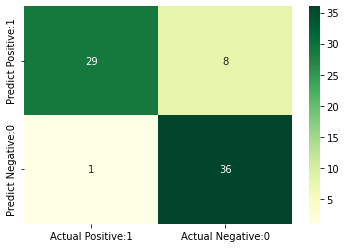

In [ ]:
cm1_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87        37
           1       0.82      0.97      0.89        37

    accuracy                           0.88        74
   macro avg       0.89      0.88      0.88        74
weighted avg       0.89      0.88      0.88        74



In [ ]:
TP = cm1[0,0]
TN = cm1[1,1]
FP = cm1[0,1]
FN = cm1[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1216


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_test1['KNN']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.8888888888888891
Accuracy: 0.8783783783783784
Recall : 0.972972972972973
Precision : 0.8181818181818182
ROC_AUC : 0.8783783783783784


### SMOTE

In [ ]:
print('Confusion matrix\n', cm2)

print('\nTrue Positives(TP) = ', cm2[0,0])

print('\nTrue Negatives(TN) = ', cm2[1,1])

print('\nFalse Positives(FP) = ', cm2[0,1])

print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix
 [[29  8]
 [ 2 35]]

True Positives(TP) =  29

True Negatives(TN) =  35

False Positives(FP) =  8

False Negatives(FN) =  2


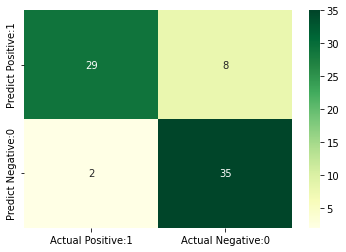

In [ ]:
cm2_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85        37
           1       0.81      0.95      0.88        37

    accuracy                           0.86        74
   macro avg       0.87      0.86      0.86        74
weighted avg       0.87      0.86      0.86        74



In [ ]:
TP = cm2[0,0]
TN = cm2[1,1]
FP = cm2[0,1]
FN = cm2[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1351


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_test2['KNN']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.875
Accuracy: 0.8648648648648649
Recall : 0.9459459459459459
Precision : 0.813953488372093
ROC_AUC : 0.8648648648648649


### ADASYN

In [ ]:
print('Confusion matrix\n', cm3)

print('\nTrue Positives(TP) = ', cm3[0,0])

print('\nTrue Negatives(TN) = ', cm3[1,1])

print('\nFalse Positives(FP) = ', cm3[0,1])

print('\nFalse Negatives(FN) = ', cm3[1,0])

Confusion matrix
 [[29  8]
 [ 4 33]]

True Positives(TP) =  29

True Negatives(TN) =  33

False Positives(FP) =  8

False Negatives(FN) =  4


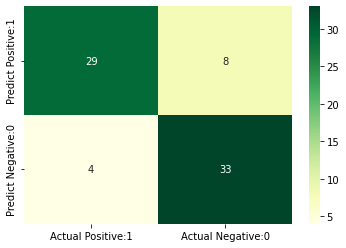

In [ ]:
cm3_matrix = pd.DataFrame(data=cm3, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm3_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83        37
           1       0.80      0.89      0.85        37

    accuracy                           0.84        74
   macro avg       0.84      0.84      0.84        74
weighted avg       0.84      0.84      0.84        74



In [ ]:
TP = cm3[0,0]
TN = cm3[1,1]
FP = cm3[0,1]
FN = cm3[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1622


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_test3['KNN']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.8461538461538461
Accuracy: 0.8378378378378378
Recall : 0.8918918918918919
Precision : 0.8048780487804879
ROC_AUC : 0.8378378378378378


# <h1 align="center"> Decision Tree </h1>

---



---



In [ ]:
tree = DecisionTreeClassifier()
#ROS
tree.fit(x_train1,y_train1)

#SMOTE
tree.fit(x_train2,y_train2)

#ADASYN
tree.fit(x_train3,y_train3)

DecisionTreeClassifier()

In [ ]:
#ROS
y_pred_test1= tree.predict(x_test1)

#SMOTE
y_pred_test2= tree.predict(x_test2)

#ADASYN
y_pred_test3= tree.predict(x_test3)

In [ ]:
#ROS
y_pred_train1 = tree.predict(x_train1)

#SMOTE
y_pred_train2 = tree.predict(x_train2)

#ADASYN
y_pred_train3 = tree.predict(x_train3)

In [ ]:
#ROS
print("Testing accuracy of ROS Data:")
print( accuracy_score(y_test1, y_pred_test1)*100)
print()

#SMOTE
print("Testing accuracy of SMOTE Data:")
print( accuracy_score(y_test2, y_pred_test2)*100)
print()

#ADASYN
print("Testing accuracy of ADASYN Data:")
print( accuracy_score(y_test3, y_pred_test3)*100)
print()

Testing accuracy of ROS Data:
77.02702702702703

Testing accuracy of SMOTE Data:
74.32432432432432

Testing accuracy of ADASYN Data:
72.97297297297297



In [ ]:
#ROS
print("Training accuracy of ROS Data:")
print( accuracy_score(y_train1, y_pred_train1)*100)
print()

#SMOTE
print("Training accuracy of SMOTE Data:")
print( accuracy_score(y_train2, y_pred_train2)*100)
print()

#ADASYN
print("Training accuracy of ADASYN Data:")
print( accuracy_score(y_train3, y_pred_train3)*100)
print()

Training accuracy of ROS Data:
89.7590361445783

Training accuracy of SMOTE Data:
93.97590361445783

Training accuracy of ADASYN Data:
100.0



## <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
#ROS
y_pred1 = y_pred_test1
cm1 = confusion_matrix(y_test1, y_pred1)

#SMOTE
y_pred2 = y_pred_test2
cm2 = confusion_matrix(y_test2, y_pred2)

#ADASYN
y_pred3 = y_pred_test3
cm3 = confusion_matrix(y_test3, y_pred3)

### ROS

In [ ]:
print('Confusion matrix\n', cm1)

print('\nTrue Positives(TP) = ', cm1[0,0])

print('\nTrue Negatives(TN) = ', cm1[1,1])

print('\nFalse Positives(FP) = ', cm1[0,1])

print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix
 [[31  6]
 [11 26]]

True Positives(TP) =  31

True Negatives(TN) =  26

False Positives(FP) =  6

False Negatives(FN) =  11


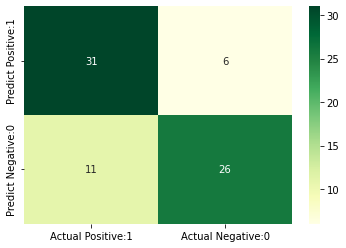

In [ ]:
cm1_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.74      0.84      0.78        37
           1       0.81      0.70      0.75        37

    accuracy                           0.77        74
   macro avg       0.78      0.77      0.77        74
weighted avg       0.78      0.77      0.77        74



In [ ]:
TP = cm1[0,0]
TN = cm1[1,1]
FP = cm1[0,1]
FN = cm1[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2297


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_test1['Decision Tree']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7536231884057971
Accuracy: 0.7702702702702703
Recall : 0.7027027027027027
Precision : 0.8125
ROC_AUC : 0.7702702702702703


### SMOTE

In [ ]:
print('Confusion matrix\n', cm2)

print('\nTrue Positives(TP) = ', cm2[0,0])

print('\nTrue Negatives(TN) = ', cm2[1,1])

print('\nFalse Positives(FP) = ', cm2[0,1])

print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix
 [[31  6]
 [13 24]]

True Positives(TP) =  31

True Negatives(TN) =  24

False Positives(FP) =  6

False Negatives(FN) =  13


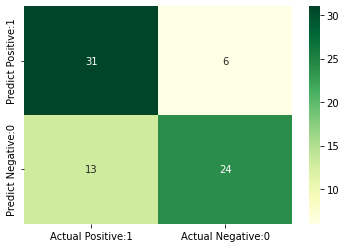

In [ ]:
cm2_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.70      0.84      0.77        37
           1       0.80      0.65      0.72        37

    accuracy                           0.74        74
   macro avg       0.75      0.74      0.74        74
weighted avg       0.75      0.74      0.74        74



In [ ]:
TP = cm2[0,0]
TN = cm2[1,1]
FP = cm2[0,1]
FN = cm2[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2568


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_test2['Decision Tree']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7164179104477612
Accuracy: 0.7432432432432432
Recall : 0.6486486486486487
Precision : 0.8
ROC_AUC : 0.7432432432432433


### ADASYN

In [ ]:
print('Confusion matrix\n', cm3)

print('\nTrue Positives(TP) = ', cm3[0,0])

print('\nTrue Negatives(TN) = ', cm3[1,1])

print('\nFalse Positives(FP) = ', cm3[0,1])

print('\nFalse Negatives(FN) = ', cm3[1,0])

Confusion matrix
 [[30  7]
 [13 24]]

True Positives(TP) =  30

True Negatives(TN) =  24

False Positives(FP) =  7

False Negatives(FN) =  13


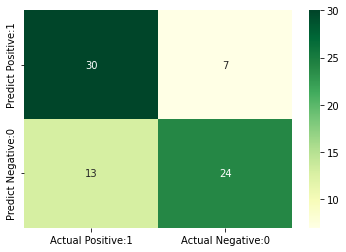

In [ ]:
cm3_matrix = pd.DataFrame(data=cm3, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm3_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75        37
           1       0.77      0.65      0.71        37

    accuracy                           0.73        74
   macro avg       0.74      0.73      0.73        74
weighted avg       0.74      0.73      0.73        74



In [ ]:
TP = cm3[0,0]
TN = cm3[1,1]
FP = cm3[0,1]
FN = cm3[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2703


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_test3['Decision Tree']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7058823529411764
Accuracy: 0.7297297297297297
Recall : 0.6486486486486487
Precision : 0.7741935483870968
ROC_AUC : 0.7297297297297297


# <h1 align="center"> Naive Bayes Classifier </h1>

---



---



In [ ]:
gnb = GaussianNB()
#ROS
gnb.fit(x_train1,y_train1)

#SMOTE
gnb.fit(x_train2,y_train2)

#ADASYN
gnb.fit(x_train3,y_train3)

GaussianNB()

In [ ]:
#ROS
y_pred_test1= gnb.predict(x_test1)

#SMOTE
y_pred_test2= gnb.predict(x_test2)

#ADASYN
y_pred_test3= gnb.predict(x_test3)

In [ ]:
#ROS
y_pred_train1 = gnb.predict(x_train1)

#SMOTE
y_pred_train2 = gnb.predict(x_train2)

#ADASYN
y_pred_train3 = gnb.predict(x_train3)

In [ ]:
#ROS
print("Testing accuracy of ROS Data:")
print( accuracy_score(y_test1, y_pred_test1)*100)
print()

#SMOTE
print("Testing accuracy of SMOTE Data:")
print( accuracy_score(y_test2, y_pred_test2)*100)
print()

#ADASYN
print("Testing accuracy of ADASYN Data:")
print( accuracy_score(y_test3, y_pred_test3)*100)
print()

Testing accuracy of ROS Data:
68.91891891891892

Testing accuracy of SMOTE Data:
67.56756756756756

Testing accuracy of ADASYN Data:
71.62162162162163



In [ ]:
#ROS
print("Training accuracy of ROS Data:")
print( accuracy_score(y_train1, y_pred_train1)*100)
print()

#SMOTE
print("Training accuracy of SMOTE Data:")
print( accuracy_score(y_train2, y_pred_train2)*100)
print()

#ADASYN
print("Training accuracy of ADASYN Data:")
print( accuracy_score(y_train3, y_pred_train3)*100)
print()

Training accuracy of ROS Data:
77.71084337349397

Training accuracy of SMOTE Data:
80.12048192771084

Training accuracy of ADASYN Data:
79.76190476190477



## <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
#ROS
y_pred1 = y_pred_test1
cm1 = confusion_matrix(y_test1, y_pred1)

#SMOTE
y_pred2 = y_pred_test2
cm2 = confusion_matrix(y_test2, y_pred2)

#ADASYN
y_pred3 = y_pred_test3
cm3 = confusion_matrix(y_test3, y_pred3)

### ROS

In [ ]:
print('Confusion matrix\n', cm1)

print('\nTrue Positives(TP) = ', cm1[0,0])

print('\nTrue Negatives(TN) = ', cm1[1,1])

print('\nFalse Positives(FP) = ', cm1[0,1])

print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix
 [[30  7]
 [16 21]]

True Positives(TP) =  30

True Negatives(TN) =  21

False Positives(FP) =  7

False Negatives(FN) =  16


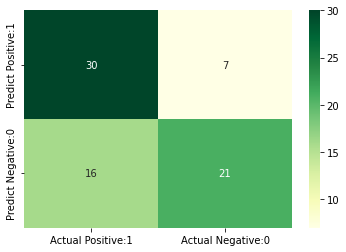

In [ ]:
cm1_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.65      0.81      0.72        37
           1       0.75      0.57      0.65        37

    accuracy                           0.69        74
   macro avg       0.70      0.69      0.68        74
weighted avg       0.70      0.69      0.68        74



In [ ]:
TP = cm1[0,0]
TN = cm1[1,1]
FP = cm1[0,1]
FN = cm1[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.3108


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_test1['Naive Bayes']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.6461538461538462
Accuracy: 0.6891891891891891
Recall : 0.5675675675675675
Precision : 0.75
ROC_AUC : 0.6891891891891891


### SMOTE

In [ ]:
print('Confusion matrix\n', cm2)

print('\nTrue Positives(TP) = ', cm2[0,0])

print('\nTrue Negatives(TN) = ', cm2[1,1])

print('\nFalse Positives(FP) = ', cm2[0,1])

print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix
 [[30  7]
 [17 20]]

True Positives(TP) =  30

True Negatives(TN) =  20

False Positives(FP) =  7

False Negatives(FN) =  17


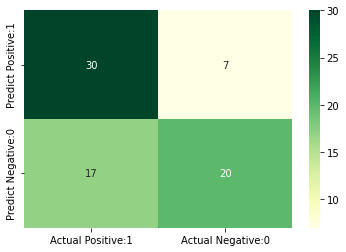

In [ ]:
cm2_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.64      0.81      0.71        37
           1       0.74      0.54      0.62        37

    accuracy                           0.68        74
   macro avg       0.69      0.68      0.67        74
weighted avg       0.69      0.68      0.67        74



In [ ]:
TP = cm2[0,0]
TN = cm2[1,1]
FP = cm2[0,1]
FN = cm2[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.3243


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_test2['Naive Bayes']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.625
Accuracy: 0.6756756756756757
Recall : 0.5405405405405406
Precision : 0.7407407407407407
ROC_AUC : 0.6756756756756757


### ADASYN

In [ ]:
print('Confusion matrix\n', cm3)

print('\nTrue Positives(TP) = ', cm3[0,0])

print('\nTrue Negatives(TN) = ', cm3[1,1])

print('\nFalse Positives(FP) = ', cm3[0,1])

print('\nFalse Negatives(FN) = ', cm3[1,0])

Confusion matrix
 [[31  6]
 [15 22]]

True Positives(TP) =  31

True Negatives(TN) =  22

False Positives(FP) =  6

False Negatives(FN) =  15


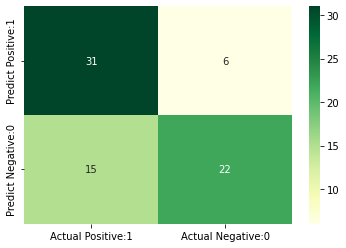

In [ ]:
cm3_matrix = pd.DataFrame(data=cm3, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm3_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.67      0.84      0.75        37
           1       0.79      0.59      0.68        37

    accuracy                           0.72        74
   macro avg       0.73      0.72      0.71        74
weighted avg       0.73      0.72      0.71        74



In [ ]:
TP = cm3[0,0]
TN = cm3[1,1]
FP = cm3[0,1]
FN = cm3[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2838


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_test3['Naive Bayes']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.676923076923077
Accuracy: 0.7162162162162162
Recall : 0.5945945945945946
Precision : 0.7857142857142857
ROC_AUC : 0.7162162162162162


# <h1 align="center"> SVM </h1>

---



---

In [ ]:
svm = SVC()
#ROS
svm.fit(x_train1,y_train1)

#SMOTE
svm.fit(x_train2,y_train2)

#ADASYN
svm.fit(x_train3,y_train3)

SVC()

In [ ]:
#ROS
y_pred_test1= svm.predict(x_test1)

#SMOTE
y_pred_test2= svm.predict(x_test2)

#ADASYN
y_pred_test3= svm.predict(x_test3)

In [ ]:
#ROS
y_pred_train1 = svm.predict(x_train1)

#SMOTE
y_pred_train2 = svm.predict(x_train2)

#ADASYN
y_pred_train3 = svm.predict(x_train3)

In [ ]:
#ROS
print("Testing accuracy of ROS Data:")
print( accuracy_score(y_test1, y_pred_test1)*100)
print()

#SMOTE
print("Testing accuracy of SMOTE Data:")
print( accuracy_score(y_test2, y_pred_test2)*100)
print()

#ADASYN
print("Testing accuracy of ADASYN Data:")
print( accuracy_score(y_test3, y_pred_test3)*100)
print()

Testing accuracy of ROS Data:
81.08108108108108

Testing accuracy of SMOTE Data:
86.48648648648648

Testing accuracy of ADASYN Data:
82.43243243243244



In [ ]:
#ROS
print("Training accuracy of ROS Data:")
print( accuracy_score(y_train1, y_pred_train1)*100)
print()

#SMOTE
print("Training accuracy of SMOTE Data:")
print( accuracy_score(y_train2, y_pred_train2)*100)
print()

#ADASYN
print("Training accuracy of ADASYN Data:")
print( accuracy_score(y_train3, y_pred_train3)*100)
print()

Training accuracy of ROS Data:
84.33734939759037

Training accuracy of SMOTE Data:
87.34939759036145

Training accuracy of ADASYN Data:
87.5



## <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
#ROS
y_pred1 = y_pred_test1
cm1 = confusion_matrix(y_test1, y_pred1)

#SMOTE
y_pred2 = y_pred_test2
cm2 = confusion_matrix(y_test2, y_pred2)

#ADASYN
y_pred3 = y_pred_test3
cm3 = confusion_matrix(y_test3, y_pred3)

### ROS

In [ ]:
print('Confusion matrix\n', cm1)

print('\nTrue Positives(TP) = ', cm1[0,0])

print('\nTrue Negatives(TN) = ', cm1[1,1])

print('\nFalse Positives(FP) = ', cm1[0,1])

print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix
 [[30  7]
 [ 7 30]]

True Positives(TP) =  30

True Negatives(TN) =  30

False Positives(FP) =  7

False Negatives(FN) =  7


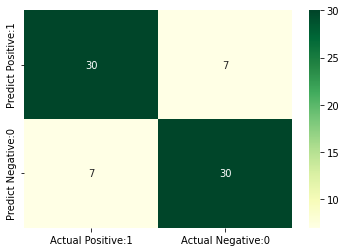

In [ ]:
cm1_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        37
           1       0.81      0.81      0.81        37

    accuracy                           0.81        74
   macro avg       0.81      0.81      0.81        74
weighted avg       0.81      0.81      0.81        74



In [ ]:
TP = cm1[0,0]
TN = cm1[1,1]
FP = cm1[0,1]
FN = cm1[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1892


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_test1['SVM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.8108108108108109
Accuracy: 0.8108108108108109
Recall : 0.8108108108108109
Precision : 0.8108108108108109
ROC_AUC : 0.8108108108108109


### SMOTE

In [ ]:
print('Confusion matrix\n', cm2)

print('\nTrue Positives(TP) = ', cm2[0,0])

print('\nTrue Negatives(TN) = ', cm2[1,1])

print('\nFalse Positives(FP) = ', cm2[0,1])

print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix
 [[31  6]
 [ 4 33]]

True Positives(TP) =  31

True Negatives(TN) =  33

False Positives(FP) =  6

False Negatives(FN) =  4


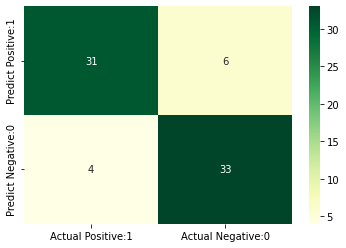

In [ ]:
cm2_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        37
           1       0.85      0.89      0.87        37

    accuracy                           0.86        74
   macro avg       0.87      0.86      0.86        74
weighted avg       0.87      0.86      0.86        74



In [ ]:
TP = cm2[0,0]
TN = cm2[1,1]
FP = cm2[0,1]
FN = cm2[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1351


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_test2['SVM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.868421052631579
Accuracy: 0.8648648648648649
Recall : 0.8918918918918919
Precision : 0.8461538461538461
ROC_AUC : 0.8648648648648649


### ADASYN

In [ ]:
print('Confusion matrix\n', cm3)

print('\nTrue Positives(TP) = ', cm3[0,0])

print('\nTrue Negatives(TN) = ', cm3[1,1])

print('\nFalse Positives(FP) = ', cm3[0,1])

print('\nFalse Negatives(FN) = ', cm3[1,0])

Confusion matrix
 [[30  7]
 [ 6 31]]

True Positives(TP) =  30

True Negatives(TN) =  31

False Positives(FP) =  7

False Negatives(FN) =  6


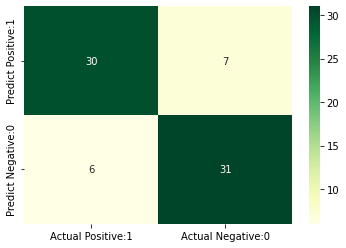

In [ ]:
cm3_matrix = pd.DataFrame(data=cm3, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm3_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        37
           1       0.82      0.84      0.83        37

    accuracy                           0.82        74
   macro avg       0.82      0.82      0.82        74
weighted avg       0.82      0.82      0.82        74



In [ ]:
TP = cm3[0,0]
TN = cm3[1,1]
FP = cm3[0,1]
FN = cm3[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1757


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_test3['SVM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.8266666666666665
Accuracy: 0.8243243243243243
Recall : 0.8378378378378378
Precision : 0.8157894736842105
ROC_AUC : 0.8243243243243242


# <h1 align="center">LightGBM </h1>

---



---

In [ ]:
lgbm = LGBMClassifier()
#ROS
lgbm.fit(x_train1,y_train1)

#SMOTE
lgbm.fit(x_train2,y_train2)

#ADASYN
lgbm.fit(x_train3,y_train3)

LGBMClassifier()

In [ ]:
#ROS
y_pred_test1= lgbm.predict(x_test1)

#SMOTE
y_pred_test2= lgbm.predict(x_test2)

#ADASYN
y_pred_test3= lgbm.predict(x_test3)

In [ ]:
#ROS
y_pred_train1 = lgbm.predict(x_train1)

#SMOTE
y_pred_train2 = lgbm.predict(x_train2)

#ADASYN
y_pred_train3 = lgbm.predict(x_train3)

In [ ]:
#ROS
print("Testing accuracy of ROS Data:")
print( accuracy_score(y_test1, y_pred_test1)*100)
print()

#SMOTE
print("Testing accuracy of SMOTE Data:")
print( accuracy_score(y_test2, y_pred_test2)*100)
print()

#ADASYN
print("Testing accuracy of ADASYN Data:")
print( accuracy_score(y_test3, y_pred_test3)*100)
print()

Testing accuracy of ROS Data:
78.37837837837837

Testing accuracy of SMOTE Data:
83.78378378378379

Testing accuracy of ADASYN Data:
75.67567567567568



In [ ]:
#ROS
print("Training accuracy of ROS Data:")
print( accuracy_score(y_train1, y_pred_train1)*100)
print()

#SMOTE
print("Training accuracy of SMOTE Data:")
print( accuracy_score(y_train2, y_pred_train2)*100)
print()

#ADASYN
print("Training accuracy of ADASYN Data:")
print( accuracy_score(y_train3, y_pred_train3)*100)
print()

Training accuracy of ROS Data:
93.37349397590361

Training accuracy of SMOTE Data:
94.27710843373494

Training accuracy of ADASYN Data:
100.0



## <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
#ROS
y_pred1 = y_pred_test1
cm1 = confusion_matrix(y_test1, y_pred1)

#SMOTE
y_pred2 = y_pred_test2
cm2 = confusion_matrix(y_test2, y_pred2)

#ADASYN
y_pred3 = y_pred_test3
cm3 = confusion_matrix(y_test3, y_pred3)

### ROS

In [ ]:
print('Confusion matrix\n', cm1)

print('\nTrue Positives(TP) = ', cm1[0,0])

print('\nTrue Negatives(TN) = ', cm1[1,1])

print('\nFalse Positives(FP) = ', cm1[0,1])

print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix
 [[31  6]
 [10 27]]

True Positives(TP) =  31

True Negatives(TN) =  27

False Positives(FP) =  6

False Negatives(FN) =  10


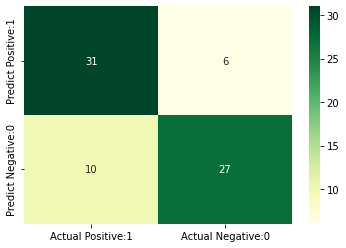

In [ ]:
cm1_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.76      0.84      0.79        37
           1       0.82      0.73      0.77        37

    accuracy                           0.78        74
   macro avg       0.79      0.78      0.78        74
weighted avg       0.79      0.78      0.78        74



In [ ]:
TP = cm1[0,0]
TN = cm1[1,1]
FP = cm1[0,1]
FN = cm1[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2162


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_test1['LightGBM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7714285714285715
Accuracy: 0.7837837837837838
Recall : 0.7297297297297297
Precision : 0.8181818181818182
ROC_AUC : 0.7837837837837839


### SMOTE

In [ ]:
print('Confusion matrix\n', cm2)

print('\nTrue Positives(TP) = ', cm2[0,0])

print('\nTrue Negatives(TN) = ', cm2[1,1])

print('\nFalse Positives(FP) = ', cm2[0,1])

print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix
 [[31  6]
 [ 6 31]]

True Positives(TP) =  31

True Negatives(TN) =  31

False Positives(FP) =  6

False Negatives(FN) =  6


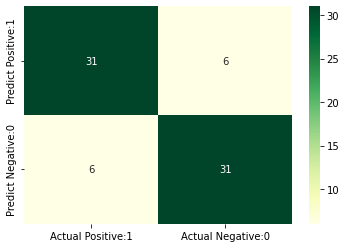

In [ ]:
cm2_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        37
           1       0.84      0.84      0.84        37

    accuracy                           0.84        74
   macro avg       0.84      0.84      0.84        74
weighted avg       0.84      0.84      0.84        74



In [ ]:
TP = cm2[0,0]
TN = cm2[1,1]
FP = cm2[0,1]
FN = cm2[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1622


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_test2['LightGBM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.8378378378378378
Accuracy: 0.8378378378378378
Recall : 0.8378378378378378
Precision : 0.8378378378378378
ROC_AUC : 0.8378378378378377


### ADASYN

In [ ]:
print('Confusion matrix\n', cm3)

print('\nTrue Positives(TP) = ', cm3[0,0])

print('\nTrue Negatives(TN) = ', cm3[1,1])

print('\nFalse Positives(FP) = ', cm3[0,1])

print('\nFalse Negatives(FN) = ', cm3[1,0])

Confusion matrix
 [[29  8]
 [10 27]]

True Positives(TP) =  29

True Negatives(TN) =  27

False Positives(FP) =  8

False Negatives(FN) =  10


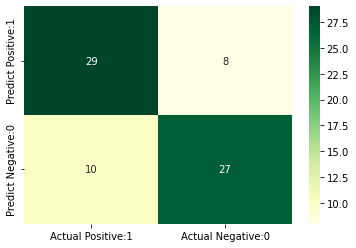

In [ ]:
cm3_matrix = pd.DataFrame(data=cm3, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm3_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        37
           1       0.77      0.73      0.75        37

    accuracy                           0.76        74
   macro avg       0.76      0.76      0.76        74
weighted avg       0.76      0.76      0.76        74



In [ ]:
TP = cm3[0,0]
TN = cm3[1,1]
FP = cm3[0,1]
FN = cm3[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2432


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_test3['LightGBM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.75
Accuracy: 0.7567567567567568
Recall : 0.7297297297297297
Precision : 0.7714285714285715
ROC_AUC : 0.7567567567567568


# <h1 align="center"> XGBoost <h1>

---



---

In [ ]:
xg = XGBClassifier()
#ROS
xg.fit(x_train1,y_train1)

#SMOTE
xg.fit(x_train2,y_train2)

#ADASYN
xg.fit(x_train3,y_train3)

XGBClassifier()

In [ ]:
#ROS
y_pred_test1= xg.predict(x_test1)

#SMOTE
y_pred_test2= xg.predict(x_test2)

#ADASYN
y_pred_test3= xg.predict(x_test3)


In [ ]:
#ROS
y_pred_train1 = xg.predict(x_train1)

#SMOTE
y_pred_train2 = xg.predict(x_train2)

#ADASYN
y_pred_train3 = xg.predict(x_train3)


In [ ]:
#ROS
print("Testing accuracy of ROS Data:")
print( accuracy_score(y_test1, y_pred_test1)*100)
print()

#SMOTE
print("Testing accuracy of SMOTE Data:")
print( accuracy_score(y_test2, y_pred_test2)*100)
print()

#ADASYN
print("Testing accuracy of ADASYN Data:")
print( accuracy_score(y_test3, y_pred_test3)*100)
print()

Testing accuracy of ROS Data:
78.37837837837837

Testing accuracy of SMOTE Data:
82.43243243243244

Testing accuracy of ADASYN Data:
83.78378378378379



In [ ]:
#ROS
print("Training accuracy of ROS Data:")
print( accuracy_score(y_train1, y_pred_train1)*100)
print()

#SMOTE
print("Training accuracy of SMOTE Data:")
print( accuracy_score(y_train2, y_pred_train2)*100)
print()

#ADASYN
print("Training accuracy of ADASYN Data:")
print( accuracy_score(y_train3, y_pred_train3)*100)
print()

Training accuracy of ROS Data:
87.34939759036145

Training accuracy of SMOTE Data:
90.06024096385542

Training accuracy of ADASYN Data:
96.42857142857143



## <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
#ROS
y_pred1 = y_pred_test1
cm1 = confusion_matrix(y_test1, y_pred1)

#SMOTE
y_pred2 = y_pred_test2
cm2 = confusion_matrix(y_test2, y_pred2)

#ADASYN
y_pred3 = y_pred_test3
cm3 = confusion_matrix(y_test3, y_pred3)

### ROS

In [ ]:
print('Confusion matrix\n', cm1)

print('\nTrue Positives(TP) = ', cm1[0,0])

print('\nTrue Negatives(TN) = ', cm1[1,1])

print('\nFalse Positives(FP) = ', cm1[0,1])

print('\nFalse Negatives(FN) = ', cm1[1,0])

Confusion matrix
 [[31  6]
 [10 27]]

True Positives(TP) =  31

True Negatives(TN) =  27

False Positives(FP) =  6

False Negatives(FN) =  10


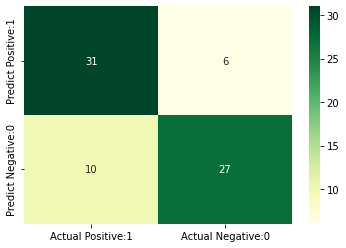

In [ ]:
cm1_matrix = pd.DataFrame(data=cm1, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm1_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.76      0.84      0.79        37
           1       0.82      0.73      0.77        37

    accuracy                           0.78        74
   macro avg       0.79      0.78      0.78        74
weighted avg       0.79      0.78      0.78        74



In [ ]:
TP = cm1[0,0]
TN = cm1[1,1]
FP = cm1[0,1]
FN = cm1[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2162


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_test1['XGBoost']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7714285714285715
Accuracy: 0.7837837837837838
Recall : 0.7297297297297297
Precision : 0.8181818181818182
ROC_AUC : 0.7837837837837839


### SMOTE

In [ ]:
print('Confusion matrix\n', cm2)

print('\nTrue Positives(TP) = ', cm2[0,0])

print('\nTrue Negatives(TN) = ', cm2[1,1])

print('\nFalse Positives(FP) = ', cm2[0,1])

print('\nFalse Negatives(FN) = ', cm2[1,0])

Confusion matrix
 [[31  6]
 [ 7 30]]

True Positives(TP) =  31

True Negatives(TN) =  30

False Positives(FP) =  6

False Negatives(FN) =  7


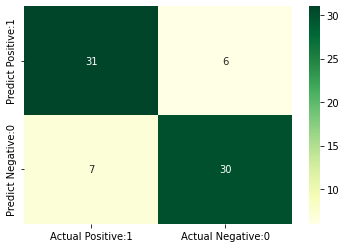

In [ ]:
cm2_matrix = pd.DataFrame(data=cm2, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm2_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        37
           1       0.83      0.81      0.82        37

    accuracy                           0.82        74
   macro avg       0.82      0.82      0.82        74
weighted avg       0.82      0.82      0.82        74



In [ ]:
TP = cm2[0,0]
TN = cm2[1,1]
FP = cm2[0,1]
FN = cm2[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1757


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_test2['XGBoost']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.8219178082191781
Accuracy: 0.8243243243243243
Recall : 0.8108108108108109
Precision : 0.8333333333333334
ROC_AUC : 0.8243243243243245


### ADASYN

In [ ]:
print('Confusion matrix\n', cm3)

print('\nTrue Positives(TP) = ', cm3[0,0])

print('\nTrue Negatives(TN) = ', cm3[1,1])

print('\nFalse Positives(FP) = ', cm3[0,1])

print('\nFalse Negatives(FN) = ', cm3[1,0])

Confusion matrix
 [[30  7]
 [ 5 32]]

True Positives(TP) =  30

True Negatives(TN) =  32

False Positives(FP) =  7

False Negatives(FN) =  5


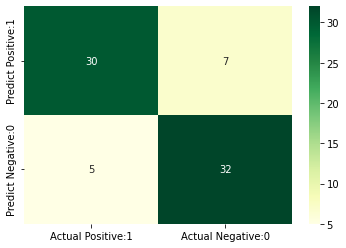

In [ ]:
cm3_matrix = pd.DataFrame(data=cm3, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm3_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.81      0.83        37
           1       0.82      0.86      0.84        37

    accuracy                           0.84        74
   macro avg       0.84      0.84      0.84        74
weighted avg       0.84      0.84      0.84        74



In [ ]:
TP = cm3[0,0]
TN = cm3[1,1]
FP = cm3[0,1]
FN = cm3[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1622


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_test3['XGBoost']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.8421052631578947
Accuracy: 0.8378378378378378
Recall : 0.8648648648648649
Precision : 0.8205128205128205
ROC_AUC : 0.8378378378378378


# <b> <h1 align="center"> MODEL COMPARISON </h1> </b>

---



---



## ROS

In [ ]:
#comparing all the model algorithms together for ROS Data
model_test1

{'Decision Tree': [0.7536231884057971,
  0.7702702702702703,
  0.8125,
  0.7027027027027027,
  0.22972972972972974,
  0.7702702702702703],
 'KNN': [0.8888888888888891,
  0.8783783783783784,
  0.8181818181818182,
  0.972972972972973,
  0.12162162162162163,
  0.8783783783783784],
 'LightGBM': [0.7714285714285715,
  0.7837837837837838,
  0.8181818181818182,
  0.7297297297297297,
  0.21621621621621623,
  0.7837837837837839],
 'Logistic Regression': [0.7058823529411764,
  0.7297297297297297,
  0.7741935483870968,
  0.6486486486486487,
  0.2702702702702703,
  0.7297297297297297],
 'Naive Bayes': [0.6461538461538462,
  0.6891891891891891,
  0.75,
  0.5675675675675675,
  0.3108108108108108,
  0.6891891891891891],
 'Random Forest': [0.7812500000000001,
  0.8108108108108109,
  0.9259259259259259,
  0.6756756756756757,
  0.1891891891891892,
  0.8108108108108109],
 'SVM': [0.8108108108108109,
  0.8108108108108109,
  0.8108108108108109,
  0.8108108108108109,
  0.1891891891891892,
  0.81081081081081

In [ ]:
#Mapping the F1 score, accuracy, precision, recall and classification error of all the models
model_comp1_df = pd.DataFrame.from_dict(model_test1).T
model_comp1_df.columns = ['F1 Score','Accuracy','Precision','Recall','Classification Error','ROC AUC Score']
model_comp1_df = model_comp1_df.sort_values('ROC AUC Score', ascending=True)
model_comp1_df.style.background_gradient(cmap='magma')

,F1 Score,Accuracy,Precision,Recall,Classification Error,ROC AUC Score
Naive Bayes,0.646154,0.689189,0.750000,0.567568,0.310811,0.689189
Logistic Regression,0.705882,0.729730,0.774194,0.648649,0.270270,0.729730
Decision Tree,0.753623,0.770270,0.812500,0.702703,0.229730,0.770270
LightGBM,0.771429,0.783784,0.818182,0.729730,0.216216,0.783784
XGBoost,0.771429,0.783784,0.818182,0.729730,0.216216,0.783784
Random Forest,0.781250,0.810811,0.925926,0.675676,0.189189,0.810811
SVM,0.810811,0.810811,0.810811,0.810811,0.189189,0.810811
KNN,0.888889,0.878378,0.818182,0.972973,0.121622,0.878378


In [ ]:
#Plotting the above map

fig = go.Figure(data=[
    go.Bar(name='F1 Score', y=model_comp1_df.index, x=model_comp1_df['F1 Score'], orientation='h'),
    go.Bar(name='Accuracy', y=model_comp1_df.index, x=model_comp1_df['Accuracy'], orientation='h'),
    go.Bar(name='Precision', y=model_comp1_df.index, x=model_comp1_df['Precision'], orientation='h'),
    go.Bar(name='Recall', y=model_comp1_df.index, x=model_comp1_df['Recall'], orientation='h'),
    go.Bar(name='Classification Error', y=model_comp1_df.index, x=model_comp1_df['Classification Error'], orientation='h'),
    go.Bar(name='ROC AUC Score', y=model_comp1_df.index, x=model_comp1_df['ROC AUC Score'], orientation='h')
])
fig.update_layout(autosize=False, width=1100,
    height=600,barmode='group')
fig.show()

## SMOTE

In [ ]:
#comparing all the model algorithms together for SMOTE Data
model_test2

{'Decision Tree': [0.7164179104477612,
  0.7432432432432432,
  0.8,
  0.6486486486486487,
  0.25675675675675674,
  0.7432432432432433],
 'KNN': [0.875,
  0.8648648648648649,
  0.813953488372093,
  0.9459459459459459,
  0.13513513513513514,
  0.8648648648648649],
 'LightGBM': [0.8378378378378378,
  0.8378378378378378,
  0.8378378378378378,
  0.8378378378378378,
  0.16216216216216217,
  0.8378378378378377],
 'Logistic Regression': [0.7887323943661971,
  0.7972972972972973,
  0.8235294117647058,
  0.7567567567567568,
  0.20270270270270271,
  0.7972972972972973],
 'Naive Bayes': [0.625,
  0.6756756756756757,
  0.7407407407407407,
  0.5405405405405406,
  0.32432432432432434,
  0.6756756756756757],
 'Random Forest': [0.7999999999999999,
  0.8243243243243243,
  0.9285714285714286,
  0.7027027027027027,
  0.17567567567567569,
  0.8243243243243243],
 'SVM': [0.868421052631579,
  0.8648648648648649,
  0.8461538461538461,
  0.8918918918918919,
  0.13513513513513514,
  0.8648648648648649],
 'XGBoo

In [ ]:
#Mapping the F1 score, accuracy, precision, recall and classification error of all the models
model_comp2_df = pd.DataFrame.from_dict(model_test2).T
model_comp2_df.columns = ['F1 Score','Accuracy','Precision','Recall','Classification Error','ROC AUC Score']
model_comp2_df = model_comp2_df.sort_values('ROC AUC Score', ascending=True)
model_comp2_df.style.background_gradient(cmap='magma')

,F1 Score,Accuracy,Precision,Recall,Classification Error,ROC AUC Score
Naive Bayes,0.625000,0.675676,0.740741,0.540541,0.324324,0.675676
Decision Tree,0.716418,0.743243,0.800000,0.648649,0.256757,0.743243
Logistic Regression,0.788732,0.797297,0.823529,0.756757,0.202703,0.797297
Random Forest,0.800000,0.824324,0.928571,0.702703,0.175676,0.824324
XGBoost,0.821918,0.824324,0.833333,0.810811,0.175676,0.824324
LightGBM,0.837838,0.837838,0.837838,0.837838,0.162162,0.837838
KNN,0.875000,0.864865,0.813953,0.945946,0.135135,0.864865
SVM,0.868421,0.864865,0.846154,0.891892,0.135135,0.864865


In [ ]:
#Plotting the above map

fig = go.Figure(data=[
    go.Bar(name='F1 Score', y=model_comp2_df.index, x=model_comp2_df['F1 Score'], orientation='h'),
    go.Bar(name='Accuracy', y=model_comp2_df.index, x=model_comp2_df['Accuracy'], orientation='h'),
    go.Bar(name='Precision', y=model_comp2_df.index, x=model_comp2_df['Precision'], orientation='h'),
    go.Bar(name='Recall', y=model_comp2_df.index, x=model_comp2_df['Recall'], orientation='h'),
    go.Bar(name='Classification Error', y=model_comp2_df.index, x=model_comp2_df['Classification Error'], orientation='h'),
    go.Bar(name='ROC AUC Score', y=model_comp2_df.index, x=model_comp2_df['ROC AUC Score'], orientation='h')
])
fig.update_layout(autosize=False, width=1100,
    height=600,barmode='group')
fig.show()

## ADASYN

In [ ]:
#comparing all the model algorithms together
model_test3

{'Decision Tree': [0.7058823529411764,
  0.7297297297297297,
  0.7741935483870968,
  0.6486486486486487,
  0.2702702702702703,
  0.7297297297297297],
 'KNN': [0.8461538461538461,
  0.8378378378378378,
  0.8048780487804879,
  0.8918918918918919,
  0.16216216216216217,
  0.8378378378378378],
 'LightGBM': [0.75,
  0.7567567567567568,
  0.7714285714285715,
  0.7297297297297297,
  0.24324324324324326,
  0.7567567567567568],
 'Logistic Regression': [0.8055555555555555,
  0.8108108108108109,
  0.8285714285714286,
  0.7837837837837838,
  0.1891891891891892,
  0.8108108108108109],
 'Naive Bayes': [0.676923076923077,
  0.7162162162162162,
  0.7857142857142857,
  0.5945945945945946,
  0.28378378378378377,
  0.7162162162162162],
 'Random Forest': [0.7647058823529411,
  0.7837837837837838,
  0.8387096774193549,
  0.7027027027027027,
  0.21621621621621623,
  0.7837837837837838],
 'SVM': [0.8266666666666665,
  0.8243243243243243,
  0.8157894736842105,
  0.8378378378378378,
  0.17567567567567569,
  0.

In [ ]:
#Mapping the F1 score, accuracy, precision, recall and classification error of all the models
model_comp3_df = pd.DataFrame.from_dict(model_test3).T
model_comp3_df.columns = ['F1 Score','Accuracy','Precision','Recall','Classification Error','ROC AUC Score']
model_comp3_df = model_comp3_df.sort_values('ROC AUC Score', ascending=True)
model_comp3_df.style.background_gradient(cmap='magma')

,F1 Score,Accuracy,Precision,Recall,Classification Error,ROC AUC Score
Naive Bayes,0.676923,0.716216,0.785714,0.594595,0.283784,0.716216
Decision Tree,0.705882,0.729730,0.774194,0.648649,0.270270,0.729730
LightGBM,0.750000,0.756757,0.771429,0.729730,0.243243,0.756757
Random Forest,0.764706,0.783784,0.838710,0.702703,0.216216,0.783784
Logistic Regression,0.805556,0.810811,0.828571,0.783784,0.189189,0.810811
SVM,0.826667,0.824324,0.815789,0.837838,0.175676,0.824324
KNN,0.846154,0.837838,0.804878,0.891892,0.162162,0.837838
XGBoost,0.842105,0.837838,0.820513,0.864865,0.162162,0.837838


In [ ]:
#Plotting the above map

fig = go.Figure(data=[
    go.Bar(name='F1 Score', y=model_comp3_df.index, x=model_comp3_df['F1 Score'], orientation='h'),
    go.Bar(name='Accuracy', y=model_comp3_df.index, x=model_comp3_df['Accuracy'], orientation='h'),
    go.Bar(name='Precision', y=model_comp3_df.index, x=model_comp3_df['Precision'], orientation='h'),
    go.Bar(name='Recall', y=model_comp3_df.index, x=model_comp3_df['Recall'], orientation='h'),
    go.Bar(name='Classification Error', y=model_comp3_df.index, x=model_comp3_df['Classification Error'], orientation='h'),
    go.Bar(name='ROC AUC Score', y=model_comp3_df.index, x=model_comp3_df['ROC AUC Score'], orientation='h')
])
fig.update_layout(autosize=False, width=1100,
    height=600,barmode='group')
fig.show()

# <h1 align="center"> <b> TOP 5 MODELS


---



---



<b> 
<ol>
<li>LightGBM 
<li>Random Forest
<li>XGBoost
<li>KNN
<li>SVM
</b>
</ol>

<h3> <b> Hyper Paramater tuning </b></h3>
<ul>
<li>Cross-validation is the process of splitting the same dataset in K-partitions, and for each split, we search the whole grid of hyperparameters to an algorithm, in a brute force manner of trying every combination.
<li>Grid Search with Cross-Validation (GridSearchCV) is a brute force on finding the best hyperparameters for a specific dataset and model.
<li>We will use GridSearchCV to tune the parameters to get the best result from our top 3 models

# ROS

In [ ]:
model_comp={}

## <h1 align="center"> Random Forest </h1>

---



---



In Random Forest, we are going to use GridSearchCV to find the best paramteres to hypertune our model. This will increase the model's accuracy and roc auc score.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 100, 300, 400, 500, 600, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train1, y_train1)
print(CV_rfc.best_params_)

{'max_features': 'auto', 'n_estimators': 400}


In [ ]:
clf = RandomForestClassifier(n_estimators = 400, max_features='auto', random_state =0)
clf.fit(x_train1,y_train1)

RandomForestClassifier(n_estimators=400, random_state=0)

In [ ]:
y_pred_test1= clf.predict(x_test1)
y_pred_test1

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0])

In [ ]:
y_pred_train1= clf.predict(x_train1)
y_pred_train1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train1, y_pred_train1)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test1, y_pred_test1)*100)

Testing accuracy:
81.08108108108108


### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred1 = y_pred_test1
cm = confusion_matrix(y_test1, y_pred1)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[34  3]
 [11 26]]

True Positives(TP) =  34

True Negatives(TN) =  26

False Positives(FP) =  3

False Negatives(FN) =  11


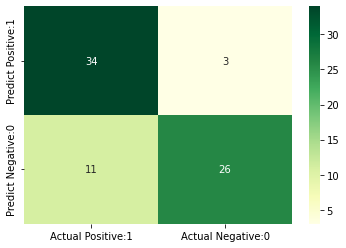

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83        37
           1       0.90      0.70      0.79        37

    accuracy                           0.81        74
   macro avg       0.83      0.81      0.81        74
weighted avg       0.83      0.81      0.81        74



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1892


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_comp['Random Forest']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.787878787878788
Accuracy: 0.8108108108108109
Recall : 0.7027027027027027
Precision : 0.896551724137931
ROC_AUC : 0.8108108108108107


## <h1 align="center"> KNN </h1>

---



---



In KNN, we are going to use GridSearchCV to find the best paramteres to hypertune our model. This will increase the model's accuracy and roc auc score.

In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range, weights=['uniform','distance'], metric=['euclidean','manhattan'])
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(x_train1, y_train1)
print(grid_search.best_params_)

Fitting 10 folds for each of 116 candidates, totalling 1160 fits
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan', weights='uniform')
knn.fit(x_train1,y_train1)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [ ]:
y_pred_test1= knn.predict(x_test1)
y_pred_test1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
y_pred_train1= knn.predict(x_train1)
y_pred_train1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train1, y_pred_train1)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test1, y_pred_test1)*100)

Testing accuracy:
74.32432432432432


### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred1 = y_pred_test1
cm = confusion_matrix(y_test1, y_pred1)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[29  8]
 [11 26]]

True Positives(TP) =  29

True Negatives(TN) =  26

False Positives(FP) =  8

False Negatives(FN) =  11


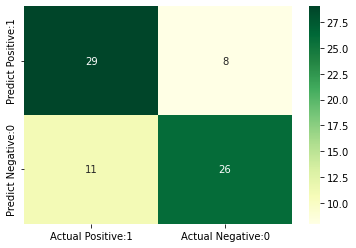

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        37
           1       0.76      0.70      0.73        37

    accuracy                           0.74        74
   macro avg       0.74      0.74      0.74        74
weighted avg       0.74      0.74      0.74        74



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2568


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_comp['KNN']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7323943661971832
Accuracy: 0.7432432432432432
Recall : 0.7027027027027027
Precision : 0.7647058823529411
ROC_AUC : 0.7432432432432432


## <h1 align="center"> SVM </h1>

---



---



In SVC (SVM Classifier), we are going to use GridSearchCV to find the best paramteres to hypertune our model. This will increase the model's accuracy and roc auc score.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train1,y_train1)
print(grid.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

In [ ]:
svm = SVC(C=10, gamma=1)
svm.fit(x_train1,y_train1)

SVC(C=10, gamma=1)

In [ ]:
y_pred_test1= svm.predict(x_test1)
y_pred_test1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0])

In [ ]:
y_pred_train1= svm.predict(x_train1)
y_pred_train1

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train1, y_pred_train1)*100)

Training accuracy:
98.79518072289156


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test1, y_pred_test1)*100)

Testing accuracy:
78.37837837837837


### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred1 = y_pred_test1
cm = confusion_matrix(y_test1, y_pred1)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[32  5]
 [11 26]]

True Positives(TP) =  32

True Negatives(TN) =  26

False Positives(FP) =  5

False Negatives(FN) =  11


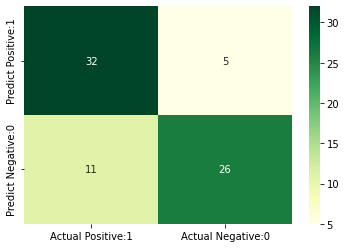

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80        37
           1       0.84      0.70      0.76        37

    accuracy                           0.78        74
   macro avg       0.79      0.78      0.78        74
weighted avg       0.79      0.78      0.78        74



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2162


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_comp['SVM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7647058823529411
Accuracy: 0.7837837837837838
Recall : 0.7027027027027027
Precision : 0.8387096774193549
ROC_AUC : 0.7837837837837838


## <h1 align="center">LightGBM </h1>


---



---



In LightGBM, we are going to use Random Search CV to find the best paramteres to hypertune our model. This will increase the model's accuracy and other evaluation parameters.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
lgb=lgb.LGBMClassifier()
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}
clf=RandomizedSearchCV(lgb,parameters,scoring='accuracy',n_iter=100)
clf.fit(x_train1, y_train1)
print(clf.best_params_)
predicted=clf.predict(x_test1)
print('Classification accuracy of the result is:')
print(accuracy_score(y_test1, predicted))

{'reg_alpha': 0.01, 'num_leaves': 40, 'min_child_samples': 15, 'max_depth': 5, 'learning_rate': 0.2}
Classification accuracy of the result is:
0.7972972972972973


In [ ]:
clf= LGBMClassifier(reg_alpha=0.01, num_leaves=40, min_child_samples=15, max_depth=5, learning_rate=0.2)
clf.fit(x_train1,y_train1)

LGBMClassifier(learning_rate=0.2, max_depth=5, min_child_samples=15,
               num_leaves=40, reg_alpha=0.01)

In [ ]:
#Prediction
y_pred_test1 = clf.predict(x_test1)
y_pred_test1

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
#Prediction
y_pred_train1 = clf.predict(x_train1)
y_pred_train1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train1, y_pred_train1)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test1, y_pred_test1)*100)

Testing accuracy:
79.72972972972973


We tried using GridSearchCV with our LightGBM model. However, it led to the lowering of results and overfitting of data. The problem arises due to the fact that LightGBM and GridSearchCV start too many threads i.e. more than available on the machine.If there are too many threads they clash and LightGBM stops execution.

### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred1 = y_pred_test1
cm = confusion_matrix(y_test1, y_pred1)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[33  4]
 [11 26]]

True Positives(TP) =  33

True Negatives(TN) =  26

False Positives(FP) =  4

False Negatives(FN) =  11


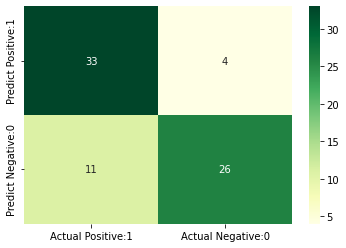

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81        37
           1       0.87      0.70      0.78        37

    accuracy                           0.80        74
   macro avg       0.81      0.80      0.80        74
weighted avg       0.81      0.80      0.80        74



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2027


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_comp['LightGBM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)


f1 Score : 0.7761194029850748
Accuracy: 0.7972972972972973
Recall : 0.7027027027027027
Precision : 0.8666666666666667
ROC_AUC : 0.7972972972972973


## <h1 align="center"> XGBoost <h1>

XGBoost is one of the most widely used gradient boosting algorithms in recent time.  XGBoost yields the best results if right parameters are served. Finding the best parameters is called hyper parameter tuning. We will use GridSearchCV to tune the parameters to get the best result from XGBoost.

In [ ]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [ ]:
from xgboost.sklearn import XGBClassifier
model = XGBClassifier()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

model, pred = algorithm_pipeline(x_train1, x_test1, y_train1, y_test1, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-model.best_score_))
print(model.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
0.28516779162516037
{'colsample_bytree': 0.7, 'max_depth': 15, 'n_estimators': 1000, 'reg_alpha': 1.2, 'reg_lambda': 1.2, 'subsample': 0.7}


In [ ]:
xg = XGBClassifier(colsample_bytree=0.7, max_depth=15, n_estimators=1000, reg_alpha=1.2, reg_lambda=1.2, subsample=0.7)
xg.fit(x_train1, y_train1)

XGBClassifier(colsample_bytree=0.7, max_depth=15, n_estimators=1000,
              reg_alpha=1.2, reg_lambda=1.2, subsample=0.7)

In [ ]:
y_pred_test1 = xg.predict(x_test1)
y_pred_test1

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
y_pred_train1 = xg.predict(x_train1)
y_pred_train1

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train1, y_pred_train1)*100)

Training accuracy:
99.69879518072288


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test1, y_pred_test1)*100)

Testing accuracy:
78.37837837837837


### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred1 = y_pred_test1
cm = confusion_matrix(y_test1, y_pred1)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[34  3]
 [13 24]]

True Positives(TP) =  34

True Negatives(TN) =  24

False Positives(FP) =  3

False Negatives(FN) =  13


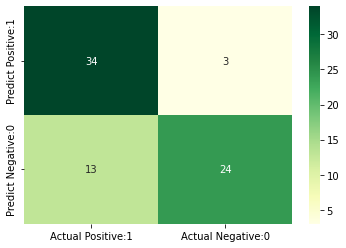

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81        37
           1       0.89      0.65      0.75        37

    accuracy                           0.78        74
   macro avg       0.81      0.78      0.78        74
weighted avg       0.81      0.78      0.78        74



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2162


In [ ]:
f1score = f1_score(y_test1, y_pred1)
accuracy= accuracy_score(y_test1, y_pred1)
precision= precision_score(y_test1, y_pred1)
recall= recall_score(y_test1, y_pred1)
roc_auc= roc_auc_score(y_test1, y_pred1)
model_comp['XGBoost']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.75
Accuracy: 0.7837837837837838
Recall : 0.6486486486486487
Precision : 0.8888888888888888
ROC_AUC : 0.7837837837837838


## <b> <h1 align="center"> CONCLUSION </h1> </b>

---



---



In [ ]:
#Plotting the hypertunes prediction values of the top 3 models
model_comp

{'KNN': [0.7323943661971832,
  0.7432432432432432,
  0.7647058823529411,
  0.7027027027027027,
  0.25675675675675674,
  0.7432432432432432],
 'LightGBM': [0.7761194029850748,
  0.7972972972972973,
  0.8666666666666667,
  0.7027027027027027,
  0.20270270270270271,
  0.7972972972972973],
 'Random Forest': [0.787878787878788,
  0.8108108108108109,
  0.896551724137931,
  0.7027027027027027,
  0.1891891891891892,
  0.8108108108108107],
 'SVM': [0.7647058823529411,
  0.7837837837837838,
  0.8387096774193549,
  0.7027027027027027,
  0.21621621621621623,
  0.7837837837837838],
 'XGBoost': [0.75,
  0.7837837837837838,
  0.8888888888888888,
  0.6486486486486487,
  0.21621621621621623,
  0.7837837837837838]}

In [ ]:
#Mapping the F! score, accuracy, precision, recall and classification error of the top 3 models

model_comp_df = pd.DataFrame.from_dict(model_comp).T
model_comp_df.columns = ['F1 Score','Accuracy','Precision','Recall','Classification Error','ROC AUC Score']
model_comp_df = model_comp_df.sort_values('ROC AUC Score', ascending=True)
model_comp_df.style.background_gradient(cmap='magma')

,F1 Score,Accuracy,Precision,Recall,Classification Error,ROC AUC Score
KNN,0.732394,0.743243,0.764706,0.702703,0.256757,0.743243
SVM,0.764706,0.783784,0.838710,0.702703,0.216216,0.783784
XGBoost,0.750000,0.783784,0.888889,0.648649,0.216216,0.783784
LightGBM,0.776119,0.797297,0.866667,0.702703,0.202703,0.797297
Random Forest,0.787879,0.810811,0.896552,0.702703,0.189189,0.810811


In [ ]:
#Plotting the above map
fig = go.Figure(data=[
    go.Bar(name='F1 Score', y=model_comp_df.index, x=model_comp_df['F1 Score'], orientation='h'),
    go.Bar(name='Accuracy', y=model_comp_df.index, x=model_comp_df['Accuracy'], orientation='h'),
    go.Bar(name='Precision', y=model_comp_df.index, x=model_comp_df['Precision'], orientation='h'),
    go.Bar(name='Recall', y=model_comp_df.index, x=model_comp_df['Recall'], orientation='h'),
    go.Bar(name='Classification Error', y=model_comp_df.index, x=model_comp_df['Classification Error'], orientation='h'),
    go.Bar(name='ROC AUC Score', y=model_comp_df.index, x=model_comp_df['ROC AUC Score'], orientation='h')
])
fig.update_layout(autosize=False, width=1100,
    height=600,barmode='group')
fig.show()

# SMOTE

In [ ]:
model_comp={}

## <h1 align="center"> Random Forest </h1>

---



---



In Random Forest, we are going to use GridSearchCV to find the best paramteres to hypertune our model. This will increase the model's accuracy and roc auc score. 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train2, y_train2)
print(CV_rfc.best_params_)

{'max_features': 'auto', 'n_estimators': 700}


In [ ]:
clf = RandomForestClassifier(n_estimators = 700, max_features='auto', random_state =0)
clf.fit(x_train2,y_train2)

RandomForestClassifier(n_estimators=700, random_state=0)

In [ ]:
y_pred_test2= clf.predict(x_test2)
y_pred_test2

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1])

In [ ]:
y_pred_train2= clf.predict(x_train2)
y_pred_train2

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train2, y_pred_train2)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test2, y_pred_test2)*100)

Testing accuracy:
82.43243243243244


### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred2 = y_pred_test2
cm = confusion_matrix(y_test2, y_pred2)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[31  6]
 [ 7 30]]

True Positives(TP) =  31

True Negatives(TN) =  30

False Positives(FP) =  6

False Negatives(FN) =  7


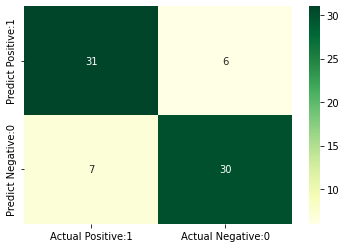

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        37
           1       0.83      0.81      0.82        37

    accuracy                           0.82        74
   macro avg       0.82      0.82      0.82        74
weighted avg       0.82      0.82      0.82        74



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1757


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_comp['Random Forest']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.8219178082191781
Accuracy: 0.8243243243243243
Recall : 0.8108108108108109
Precision : 0.8333333333333334
ROC_AUC : 0.8243243243243245


## <h1 align="center"> KNN </h1>

---



---



In KNN, we are going to use GridSearchCV to find the best paramteres to hypertune our model. This will increase the model's accuracy and roc auc score. 

In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range, weights=['uniform','distance'], metric=['euclidean','manhattan'])
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(x_train2, y_train2)
print(grid_search.best_params_)

Fitting 10 folds for each of 116 candidates, totalling 1160 fits
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan', weights='distance')
knn.fit(x_train2,y_train2)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [ ]:
y_pred_test2= knn.predict(x_test2)
y_pred_test2

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
y_pred_train2= knn.predict(x_train2)
y_pred_train2

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train2, y_pred_train2)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test2, y_pred_test2)*100)

Testing accuracy:
75.67567567567568


### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred2 = y_pred_test2
cm = confusion_matrix(y_test2, y_pred2)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[29  8]
 [10 27]]

True Positives(TP) =  29

True Negatives(TN) =  27

False Positives(FP) =  8

False Negatives(FN) =  10


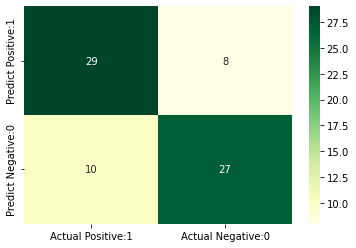

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76        37
           1       0.77      0.73      0.75        37

    accuracy                           0.76        74
   macro avg       0.76      0.76      0.76        74
weighted avg       0.76      0.76      0.76        74



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2432


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_comp['KNN']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.75
Accuracy: 0.7567567567567568
Recall : 0.7297297297297297
Precision : 0.7714285714285715
ROC_AUC : 0.7567567567567568


## <h1 align="center"> SVM </h1>

---



---



In SVC (SVM Classifier), we are going to use GridSearchCV to find the best paramteres to hypertune our model. This will increase the model's accuracy and roc auc score.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train2,y_train2)
print(grid.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

In [ ]:
svm = SVC(C=1, gamma=0.1)
svm.fit(x_train2,y_train2)

SVC(C=1, gamma=0.1)

In [ ]:
y_pred_test2= svm.predict(x_test2)
y_pred_test2

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
y_pred_train2= svm.predict(x_train2)
y_pred_train2

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train2, y_pred_train2)*100)

Training accuracy:
85.2409638554217


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test2, y_pred_test2)*100)

Testing accuracy:
85.13513513513513


### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred2 = y_pred_test2
cm = confusion_matrix(y_test2, y_pred2)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[33  4]
 [ 7 30]]

True Positives(TP) =  33

True Negatives(TN) =  30

False Positives(FP) =  4

False Negatives(FN) =  7


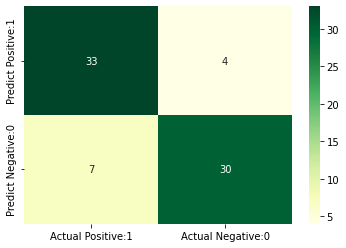

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86        37
           1       0.88      0.81      0.85        37

    accuracy                           0.85        74
   macro avg       0.85      0.85      0.85        74
weighted avg       0.85      0.85      0.85        74



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1486


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_comp['SVM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.8450704225352113
Accuracy: 0.8513513513513513
Recall : 0.8108108108108109
Precision : 0.8823529411764706
ROC_AUC : 0.8513513513513514


## <h1 align="center">LightGBM </h1>


---



---



In LightGBM, we are going to use Random Search CV to find the best paramteres to hypertune our model. This will increase the model's accuracy and other evaluation parameters.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
lgb=lgb.LGBMClassifier()
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}
clf=RandomizedSearchCV(lgb,parameters,scoring='accuracy',n_iter=100)
clf.fit(x_train2, y_train2)
print(clf.best_params_)
predicted=clf.predict(x_test2)
print('Classification accuracy of the result is:')
print(accuracy_score(y_test2, predicted))

{'reg_alpha': 0.03, 'num_leaves': 40, 'min_child_samples': 5, 'max_depth': -1, 'learning_rate': 0.1}
Classification accuracy of the result is:
0.8108108108108109


In [ ]:
clf= LGBMClassifier(reg_alpha=0.03, num_leaves=40, min_child_samples=5, max_depth=-1, learning_rate=0.1)
clf.fit(x_train2,y_train2)

LGBMClassifier(min_child_samples=5, num_leaves=40, reg_alpha=0.03)

In [ ]:
#Prediction
y_pred_train2 = clf.predict(x_train2)
y_pred_train2

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#Prediction
y_pred_test2 = clf.predict(x_test2)
y_pred_test2

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1])

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train2, y_pred_train2)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test2, y_pred_test2)*100)

Testing accuracy:
81.08108108108108


We tried using GridSearchCV with our LightGBM model. However, it led to the lowering of results and overfitting of data. The problem arises due to the fact that LightGBM and GridSearchCV start too many threads i.e. more than available on the machine.If there are too many threads they clash and LightGBM stops execution.

### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred2 = y_pred_test2
cm = confusion_matrix(y_test2, y_pred2)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[31  6]
 [ 8 29]]

True Positives(TP) =  31

True Negatives(TN) =  29

False Positives(FP) =  6

False Negatives(FN) =  8


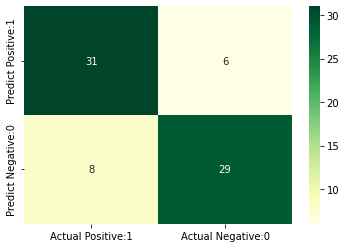

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        37
           1       0.83      0.78      0.81        37

    accuracy                           0.81        74
   macro avg       0.81      0.81      0.81        74
weighted avg       0.81      0.81      0.81        74



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1892


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_comp['LightGBM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)


f1 Score : 0.8055555555555555
Accuracy: 0.8108108108108109
Recall : 0.7837837837837838
Precision : 0.8285714285714286
ROC_AUC : 0.8108108108108109


## <h1 align="center"> XGBoost <h1>

XGBoost is one of the most widely used gradient boosting algorithms in recent time.  XGBoost yields the best results if right parameters are served. Finding the best parameters is called hyper parameter tuning. We will use GridSearchCV to tune the parameters to get the best result from XGBoost.

In [ ]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [ ]:
from xgboost.sklearn import XGBClassifier
model = XGBClassifier()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

model, pred = algorithm_pipeline(x_train2, x_test2, y_train2, y_test2, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-model.best_score_))
print(model.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
0.3424576617818194
{'colsample_bytree': 0.8, 'max_depth': 15, 'n_estimators': 1000, 'reg_alpha': 1.1, 'reg_lambda': 1.2, 'subsample': 0.7}


In [ ]:
xg = XGBClassifier(colsample_bytree=0.8, max_depth=15, n_estimators=1000, reg_alpha=1.1, reg_lambda=1.2, subsample=0.7)
xg.fit(x_train2, y_train2)

XGBClassifier(colsample_bytree=0.8, max_depth=15, n_estimators=1000,
              reg_alpha=1.1, reg_lambda=1.2, subsample=0.7)

In [ ]:
y_pred_test2 = xg.predict(x_test2)
y_pred_test2

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
y_pred_train2 = xg.predict(x_train2)
y_pred_train2

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train2, y_pred_train2)*100)

Training accuracy:
99.69879518072288


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test2, y_pred_test2)*100)

Testing accuracy:
86.48648648648648


### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred2 = y_pred_test2
cm = confusion_matrix(y_test2, y_pred2)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[33  4]
 [ 6 31]]

True Positives(TP) =  33

True Negatives(TN) =  31

False Positives(FP) =  4

False Negatives(FN) =  6


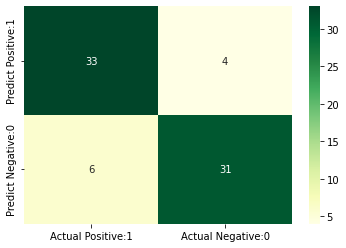

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        37
           1       0.89      0.84      0.86        37

    accuracy                           0.86        74
   macro avg       0.87      0.86      0.86        74
weighted avg       0.87      0.86      0.86        74



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1351


In [ ]:
f1score = f1_score(y_test2, y_pred2)
accuracy= accuracy_score(y_test2, y_pred2)
precision= precision_score(y_test2, y_pred2)
recall= recall_score(y_test2, y_pred2)
roc_auc= roc_auc_score(y_test2, y_pred2)
model_comp['XGBoost']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.8611111111111112
Accuracy: 0.8648648648648649
Recall : 0.8378378378378378
Precision : 0.8857142857142857
ROC_AUC : 0.8648648648648648


## <b> <h1 align="center"> CONCLUSION </h1> </b>

---



---



In [ ]:
#Plotting the hypertunes prediction values of the top 3 models
model_comp

{'KNN': [0.75,
  0.7567567567567568,
  0.7714285714285715,
  0.7297297297297297,
  0.24324324324324326,
  0.7567567567567568],
 'LightGBM': [0.8055555555555555,
  0.8108108108108109,
  0.8285714285714286,
  0.7837837837837838,
  0.1891891891891892,
  0.8108108108108109],
 'Random Forest': [0.8219178082191781,
  0.8243243243243243,
  0.8333333333333334,
  0.8108108108108109,
  0.17567567567567569,
  0.8243243243243245],
 'SVM': [0.8450704225352113,
  0.8513513513513513,
  0.8823529411764706,
  0.8108108108108109,
  0.14864864864864866,
  0.8513513513513514],
 'XGBoost': [0.8611111111111112,
  0.8648648648648649,
  0.8857142857142857,
  0.8378378378378378,
  0.13513513513513514,
  0.8648648648648648]}

In [ ]:
#Mapping the F! score, accuracy, precision, recall and classification error of the top 3 models

model_comp_df = pd.DataFrame.from_dict(model_comp).T
model_comp_df.columns = ['F1 Score','Accuracy','Precision','Recall','Classification Error','ROC AUC Score']
model_comp_df = model_comp_df.sort_values('ROC AUC Score', ascending=True)
model_comp_df.style.background_gradient(cmap='magma')

,F1 Score,Accuracy,Precision,Recall,Classification Error,ROC AUC Score
KNN,0.750000,0.756757,0.771429,0.729730,0.243243,0.756757
LightGBM,0.805556,0.810811,0.828571,0.783784,0.189189,0.810811
Random Forest,0.821918,0.824324,0.833333,0.810811,0.175676,0.824324
SVM,0.845070,0.851351,0.882353,0.810811,0.148649,0.851351
XGBoost,0.861111,0.864865,0.885714,0.837838,0.135135,0.864865


In [ ]:
#Plotting the above map
fig = go.Figure(data=[
    go.Bar(name='F1 Score', y=model_comp_df.index, x=model_comp_df['F1 Score'], orientation='h'),
    go.Bar(name='Accuracy', y=model_comp_df.index, x=model_comp_df['Accuracy'], orientation='h'),
    go.Bar(name='Precision', y=model_comp_df.index, x=model_comp_df['Precision'], orientation='h'),
    go.Bar(name='Recall', y=model_comp_df.index, x=model_comp_df['Recall'], orientation='h'),
    go.Bar(name='Classification Error', y=model_comp_df.index, x=model_comp_df['Classification Error'], orientation='h'),
    go.Bar(name='ROC AUC Score', y=model_comp_df.index, x=model_comp_df['ROC AUC Score'], orientation='h')
])
fig.update_layout(autosize=False, width=1100,
    height=600,barmode='group')
fig.show()

# ADASYN

In [ ]:
model_comp={}

## <h1 align="center"> Random Forest </h1>

---



---



In Random Forest, we are going to use GridSearchCV to find the best paramteres to hypertune our model. This will increase the model's accuracy and roc auc score. 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train3, y_train3)
print(CV_rfc.best_params_)

{'max_features': 'log2', 'n_estimators': 200}


In [ ]:
clf = RandomForestClassifier(n_estimators = 200, max_features='log2', random_state =0)
clf.fit(x_train3,y_train3)

RandomForestClassifier(max_features='log2', n_estimators=200, random_state=0)

In [ ]:
y_pred_test3= clf.predict(x_test3)
y_pred_test3

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
y_pred_train3= clf.predict(x_train3)
y_pred_train3

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train3, y_pred_train3)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test3, y_pred_test3)*100)

Testing accuracy:
81.08108108108108


### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred3 = y_pred_test3
cm = confusion_matrix(y_test3, y_pred3)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[31  6]
 [ 8 29]]

True Positives(TP) =  31

True Negatives(TN) =  29

False Positives(FP) =  6

False Negatives(FN) =  8


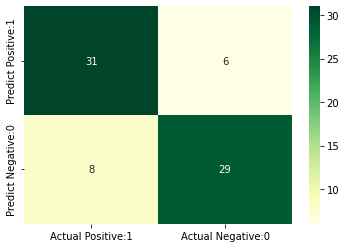

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        37
           1       0.83      0.78      0.81        37

    accuracy                           0.81        74
   macro avg       0.81      0.81      0.81        74
weighted avg       0.81      0.81      0.81        74



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1892


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_comp['Random Forest']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.8055555555555555
Accuracy: 0.8108108108108109
Recall : 0.7837837837837838
Precision : 0.8285714285714286
ROC_AUC : 0.8108108108108109


## <h1 align="center"> SVM </h1>

---



---



In SVC (SVM Classifier), we are going to use GridSearchCV to find the best paramteres to hypertune our model. This will increase the model's accuracy and roc auc score. 

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(x_train3,y_train3)
print(grid.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

In [ ]:
svm = SVC(C=1, gamma=0.1)
svm.fit(x_train3,y_train3)

SVC(C=1, gamma=0.1)

In [ ]:
y_pred_test3= svm.predict(x_test3)
y_pred_test3

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
y_pred_train3= svm.predict(x_train3)
y_pred_train3

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train3, y_pred_train3)*100)

Training accuracy:
86.30952380952381


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test3, y_pred_test3)*100)

Testing accuracy:
82.43243243243244


### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred3 = y_pred_test3
cm = confusion_matrix(y_test3, y_pred3)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[30  7]
 [ 6 31]]

True Positives(TP) =  30

True Negatives(TN) =  31

False Positives(FP) =  7

False Negatives(FN) =  6


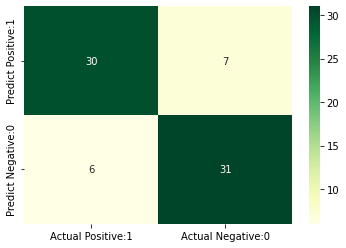

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        37
           1       0.82      0.84      0.83        37

    accuracy                           0.82        74
   macro avg       0.82      0.82      0.82        74
weighted avg       0.82      0.82      0.82        74



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1757


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_comp['SVM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.8266666666666665
Accuracy: 0.8243243243243243
Recall : 0.8378378378378378
Precision : 0.8157894736842105
ROC_AUC : 0.8243243243243242


## <h1 align="center"> KNN </h1>

---



---



In KNN, we are going to use GridSearchCV to find the best paramteres to hypertune our model. This will increase the model's accuracy and roc auc score. 

In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 30))
param_grid = dict(n_neighbors=k_range, weights=['uniform','distance'], metric=['euclidean','manhattan'])
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(x_train3, y_train3)
print(grid_search.best_params_)

Fitting 10 folds for each of 116 candidates, totalling 1160 fits
{'metric': 'manhattan', 'n_neighbors': 22, 'weights': 'distance'}


In [ ]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors= 22, weights='distance')
knn.fit(x_train3,y_train3)

KNeighborsClassifier(metric='manhattan', n_neighbors=22, weights='distance')

In [ ]:
y_pred_test3= knn.predict(x_test3)
y_pred_test3

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
y_pred_train3= knn.predict(x_train3)
y_pred_train3

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train3, y_pred_train3)*100)

Training accuracy:
100.0


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test3, y_pred_test3)*100)

Testing accuracy:
82.43243243243244


### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred3 = y_pred_test3
cm = confusion_matrix(y_test3, y_pred3)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[31  6]
 [ 7 30]]

True Positives(TP) =  31

True Negatives(TN) =  30

False Positives(FP) =  6

False Negatives(FN) =  7


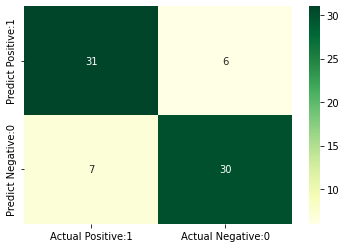

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        37
           1       0.83      0.81      0.82        37

    accuracy                           0.82        74
   macro avg       0.82      0.82      0.82        74
weighted avg       0.82      0.82      0.82        74



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1757


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_comp['KNN']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.8219178082191781
Accuracy: 0.8243243243243243
Recall : 0.8108108108108109
Precision : 0.8333333333333334
ROC_AUC : 0.8243243243243245


## <h1 align="center">LightGBM </h1>


---



---



In LightGBM, we are going to use Random Search CV to find the best paramteres to hypertune our model. This will increase the model's accuracy and other evaluation parameters.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
lgb=lgb.LGBMClassifier()
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[-1,5,10,20],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}
clf=RandomizedSearchCV(lgb,parameters,scoring='accuracy',n_iter=100)
clf.fit(x_train3, y_train3)
print(clf.best_params_)
predicted=clf.predict(x_test3)
print('Classification accuracy of the result is:')
print(accuracy_score(y_test3, predicted))

{'reg_alpha': 0.03, 'num_leaves': 40, 'min_child_samples': 5, 'max_depth': 5, 'learning_rate': 0.05}
Classification accuracy of the result is:
0.8243243243243243


In [ ]:
clf= LGBMClassifier(reg_alpha=0.03, num_leaves=40, min_child_samples=5, max_depth=5, learning_rate=0.05)
clf.fit(x_train3,y_train3)

LGBMClassifier(learning_rate=0.05, max_depth=5, min_child_samples=5,
               num_leaves=40, reg_alpha=0.03)

In [ ]:
#Prediction
y_pred_train3 = clf.predict(x_train3)
y_pred_train3

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
#Prediction
y_pred_test3 = clf.predict(x_test3)
y_pred_test3

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train3, y_pred_train3)*100)

Training accuracy:
98.21428571428571


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test3, y_pred_test3)*100)

Testing accuracy:
82.43243243243244


We tried using GridSearchCV with our LightGBM model. However, it led to the lowering of results and overfitting of data. The problem arises due to the fact that LightGBM and GridSearchCV start too many threads i.e. more than available on the machine.If there are too many threads they clash and LightGBM stops execution.

### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred3 = y_pred_test3
cm = confusion_matrix(y_test3, y_pred3)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[33  4]
 [ 9 28]]

True Positives(TP) =  33

True Negatives(TN) =  28

False Positives(FP) =  4

False Negatives(FN) =  9


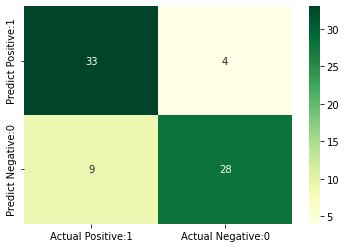

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        37
           1       0.88      0.76      0.81        37

    accuracy                           0.82        74
   macro avg       0.83      0.82      0.82        74
weighted avg       0.83      0.82      0.82        74



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1757


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_comp['LightGBM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)


f1 Score : 0.8115942028985507
Accuracy: 0.8243243243243243
Recall : 0.7567567567567568
Precision : 0.875
ROC_AUC : 0.8243243243243243


## <h1 align="center"> XGBoost <h1>

XGBoost is one of the most widely used gradient boosting algorithms in recent time.  XGBoost yields the best results if right parameters are served. Finding the best parameters is called hyper parameter tuning. We will use GridSearchCV to tune the parameters to get the best result from XGBoost.

In [ ]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [ ]:
from xgboost.sklearn import XGBClassifier
model = XGBClassifier()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]
}

model, pred = algorithm_pipeline(x_train3, x_test3, y_train3, y_test3, model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-model.best_score_))
print(model.best_params_)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
0.33174188428284557
{'colsample_bytree': 0.7, 'max_depth': 15, 'n_estimators': 700, 'reg_alpha': 1.1, 'reg_lambda': 1.1, 'subsample': 0.7}


In [ ]:
xg = XGBClassifier(colsample_bytree=0.7, max_depth=15, n_estimators=700, reg_alpha=1.1, reg_lambda=1.1, subsample=0.7)
xg.fit(x_train3, y_train3)

XGBClassifier(colsample_bytree=0.7, max_depth=15, n_estimators=700,
              reg_alpha=1.1, reg_lambda=1.1, subsample=0.7)

In [ ]:
y_pred_train3 = xg.predict(x_train3)
y_pred_train3

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
y_pred_test3 = xg.predict(x_test3)
y_pred_test3

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
print("Training accuracy:")
print( accuracy_score(y_train3, y_pred_train3)*100)

Training accuracy:
99.40476190476191


In [ ]:
print("Testing accuracy:")
print( accuracy_score(y_test3, y_pred_test3)*100)

Testing accuracy:
81.08108108108108


### <h1 align="center"> Confusion Matrix </h1>

---



---



In [ ]:
y_pred3 = y_pred_test3
cm = confusion_matrix(y_test3, y_pred3)

In [ ]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[32  5]
 [ 9 28]]

True Positives(TP) =  32

True Negatives(TN) =  28

False Positives(FP) =  5

False Negatives(FN) =  9


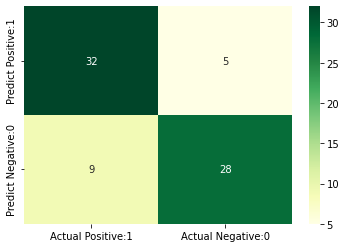

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [ ]:
print(classification_report(y_test3, y_pred3))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        37
           1       0.85      0.76      0.80        37

    accuracy                           0.81        74
   macro avg       0.81      0.81      0.81        74
weighted avg       0.81      0.81      0.81        74



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1892


In [ ]:
f1score = f1_score(y_test3, y_pred3)
accuracy= accuracy_score(y_test3, y_pred3)
precision= precision_score(y_test3, y_pred3)
recall= recall_score(y_test3, y_pred3)
roc_auc= roc_auc_score(y_test3, y_pred3)
model_comp['XGBoost']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.8000000000000002
Accuracy: 0.8108108108108109
Recall : 0.7567567567567568
Precision : 0.8484848484848485
ROC_AUC : 0.8108108108108109


## <b> <h1 align="center"> CONCLUSION </h1> </b>

---



---



In [ ]:
#Plotting the hypertunes prediction values of the top 3 models
model_comp

{'KNN': [0.8219178082191781,
  0.8243243243243243,
  0.8333333333333334,
  0.8108108108108109,
  0.17567567567567569,
  0.8243243243243245],
 'LightGBM': [0.8115942028985507,
  0.8243243243243243,
  0.875,
  0.7567567567567568,
  0.17567567567567569,
  0.8243243243243243],
 'Random Forest': [0.8055555555555555,
  0.8108108108108109,
  0.8285714285714286,
  0.7837837837837838,
  0.1891891891891892,
  0.8108108108108109],
 'SVM': [0.8266666666666665,
  0.8243243243243243,
  0.8157894736842105,
  0.8378378378378378,
  0.17567567567567569,
  0.8243243243243242],
 'XGBoost': [0.8000000000000002,
  0.8108108108108109,
  0.8484848484848485,
  0.7567567567567568,
  0.1891891891891892,
  0.8108108108108109]}

In [ ]:
#Mapping the F! score, accuracy, precision, recall and classification error of the top 3 models

model_comp_df = pd.DataFrame.from_dict(model_comp).T
model_comp_df.columns = ['F1 Score','Accuracy','Precision','Recall','Classification Error','ROC AUC Score']
model_comp_df = model_comp_df.sort_values('ROC AUC Score', ascending=True)
model_comp_df.style.background_gradient(cmap='magma')

,F1 Score,Accuracy,Precision,Recall,Classification Error,ROC AUC Score
Random Forest,0.805556,0.810811,0.828571,0.783784,0.189189,0.810811
XGBoost,0.800000,0.810811,0.848485,0.756757,0.189189,0.810811
SVM,0.826667,0.824324,0.815789,0.837838,0.175676,0.824324
LightGBM,0.811594,0.824324,0.875000,0.756757,0.175676,0.824324
KNN,0.821918,0.824324,0.833333,0.810811,0.175676,0.824324


In [ ]:
#Plotting the above map
fig = go.Figure(data=[
    go.Bar(name='F1 Score', y=model_comp_df.index, x=model_comp_df['F1 Score'], orientation='h'),
    go.Bar(name='Accuracy', y=model_comp_df.index, x=model_comp_df['Accuracy'], orientation='h'),
    go.Bar(name='Precision', y=model_comp_df.index, x=model_comp_df['Precision'], orientation='h'),
    go.Bar(name='Recall', y=model_comp_df.index, x=model_comp_df['Recall'], orientation='h'),
    go.Bar(name='Classification Error', y=model_comp_df.index, x=model_comp_df['Classification Error'], orientation='h'),
    go.Bar(name='ROC AUC Score', y=model_comp_df.index, x=model_comp_df['ROC AUC Score'], orientation='h')
])
fig.update_layout(autosize=False, width=1100,
    height=600,barmode='group')
fig.show()

# <h3> References: </h3>

---




---



1.   https://www.cdc.gov/heartdisease/heart_failure.htm
2.   Epidemiology of heart failure- https://onlinelibrary.wiley.com/doi/full/10.1002/ejhf.1858#.YsYuepL1Q38.twitter 
3. https://towardsdatascience.com/heart-disease-prediction-73468d630cfc
4. Citation-
Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). (link)
5. License-
CC BY 4.0
6. Splash icon-
Icon by Freepik, available on Flaticon.
7. Splash banner-
Wallpaper by jcomp, available on Freepik.





